<a href="https://colab.research.google.com/github/HambaliMarcel/ngr-coalminemntr-exp/blob/main/coalminingmonitor_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

===== Key Metrics =====
Total Overburden Moved: 121637.12 tons
Total Coal Mined: 57669.94 tons
Average Truck Load: 29.10 tons
Average Trip Time: 80.52 minutes
Total Downtime: 1450.78 minutes
Total Excavator Fuel Used: 9564.12 liters
Total Truck Fuel Used: 19177.01 liters


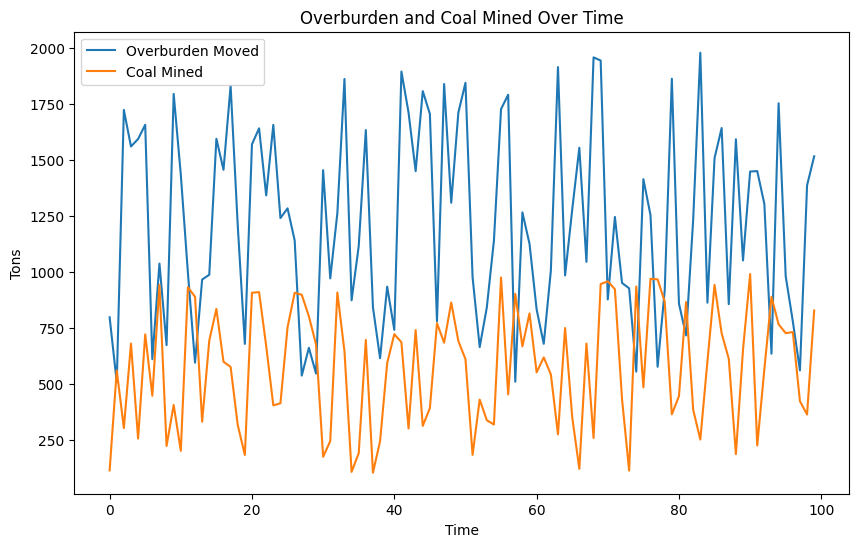

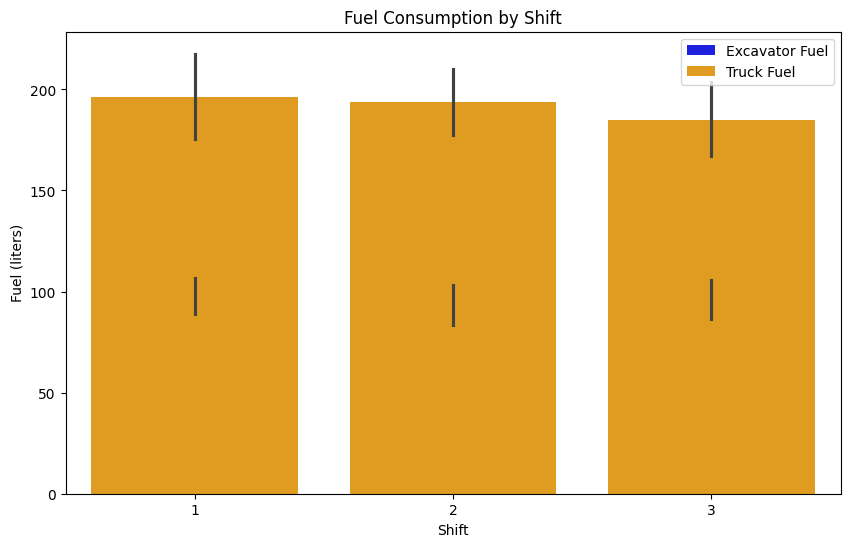

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


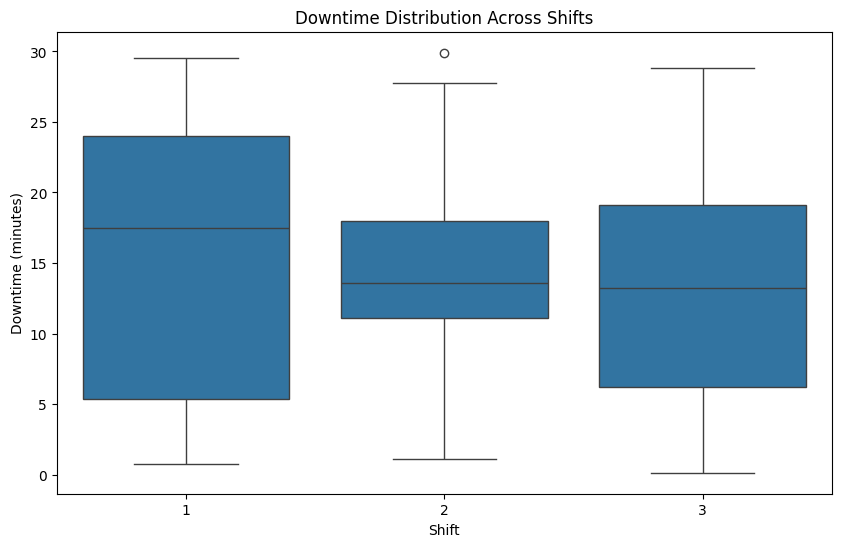

Model Performance:
MAE: 284.23463223966894
MSE: 100653.2229157917
Current Weather: Overcast, Temperature: 25.1°C, Wind Speed: 3.6 km/h


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import requests
from datetime import datetime

url = '/content/mining_operations_dataset.csv'
df = pd.read_csv(url)

def fetch_weather_data(city="Kalimantan Timur"):
    api_key = "5eb5d3f015f74fb2b0a214119240310"
    base_url = f"http://api.weatherapi.com/v1/current.json?key={api_key}&q={city}&aqi=no"

    try:
        response = requests.get(base_url)
        response.raise_for_status()

        if response.content:
            data = response.json()
            weather_desc = data['current']['condition']['text']
            temperature = data['current']['temp_c']
            wind_speed = data['current']['wind_kph']
            return weather_desc, temperature, wind_speed
        else:
            print("Error: Empty response from the weather API.")
            return None
    except requests.exceptions.RequestException as e:
        print(f"Error fetching weather data: {e}")
        return None

def detailed_insights(df):

    total_overburden = df['overburden_moved_ton'].sum()
    total_coal_mined = df['coal_mined_ton'].sum()
    avg_truck_load = df['truck_capacity_ton'].mean()
    avg_trip_time = df['trip_time_min'].mean()
    total_downtime = df['downtime_min'].sum()
    total_fuel_excavator = df['excavator_fuel_liters'].sum()
    total_fuel_truck = df['truck_fuel_liters'].sum()

    print("===== Key Metrics =====")
    print(f"Total Overburden Moved: {total_overburden:.2f} tons")
    print(f"Total Coal Mined: {total_coal_mined:.2f} tons")
    print(f"Average Truck Load: {avg_truck_load:.2f} tons")
    print(f"Average Trip Time: {avg_trip_time:.2f} minutes")
    print(f"Total Downtime: {total_downtime:.2f} minutes")
    print(f"Total Excavator Fuel Used: {total_fuel_excavator:.2f} liters")
    print(f"Total Truck Fuel Used: {total_fuel_truck:.2f} liters")

    plt.figure(figsize=(10,6))
    sns.lineplot(x=df.index, y='overburden_moved_ton', data=df, label='Overburden Moved')
    sns.lineplot(x=df.index, y='coal_mined_ton', data=df, label='Coal Mined')
    plt.title('Overburden and Coal Mined Over Time')
    plt.xlabel('Time')
    plt.ylabel('Tons')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,6))
    sns.barplot(x=df['shift'], y=df['excavator_fuel_liters'], label='Excavator Fuel', color='blue')
    sns.barplot(x=df['shift'], y=df['truck_fuel_liters'], label='Truck Fuel', color='orange')
    plt.title('Fuel Consumption by Shift')
    plt.xlabel('Shift')
    plt.ylabel('Fuel (liters)')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,6))
    sns.boxplot(x='shift', y='downtime_min', data=df)
    plt.title('Downtime Distribution Across Shifts')
    plt.xlabel('Shift')
    plt.ylabel('Downtime (minutes)')
    plt.show()

def predictive_actions(df, model):
    avg_downtime = df['downtime_min'].mean()

    if avg_downtime > 15:
        print("Warning: High downtime detected. Consider optimizing operations during peak hours or shifts.")

    current_weather = fetch_weather_data()
    if current_weather:
        print(f"Current Weather: {current_weather[0]}, Temperature: {current_weather[1]}°C, Wind Speed: {current_weather[2]} km/h")
        if "rain" in current_weather[0].lower():
            print("Alert: Rain expected. Recommend pausing certain outdoor activities and optimizing for indoor maintenance or lower-risk operations.")

def train_predictive_model(df):

    X = df[['shift', 'overburden_moved_ton', 'dumping_time_min', 'truck_capacity_ton', 'trip_time_min', 'excavator_fuel_liters', 'truck_fuel_liters', 'downtime_min']]
    y = df['coal_mined_ton']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    print(f"Model Performance:\nMAE: {mae}\nMSE: {mse}")

    return model

def overall_status_monitor(df):
    detailed_insights(df)

    model = train_predictive_model(df)

    predictive_actions(df, model)

overall_status_monitor(df)

Dataset loaded successfully.
Date column converted to datetime.
Data split into training and testing sets.
Model training completed.

Model Performance:
MAE: 24.93
RMSE: 29.13
R² Score: -0.02


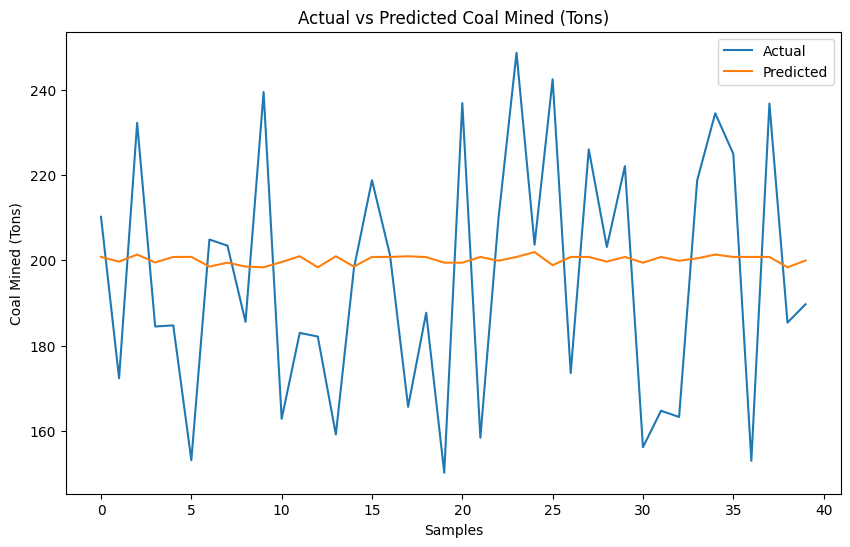

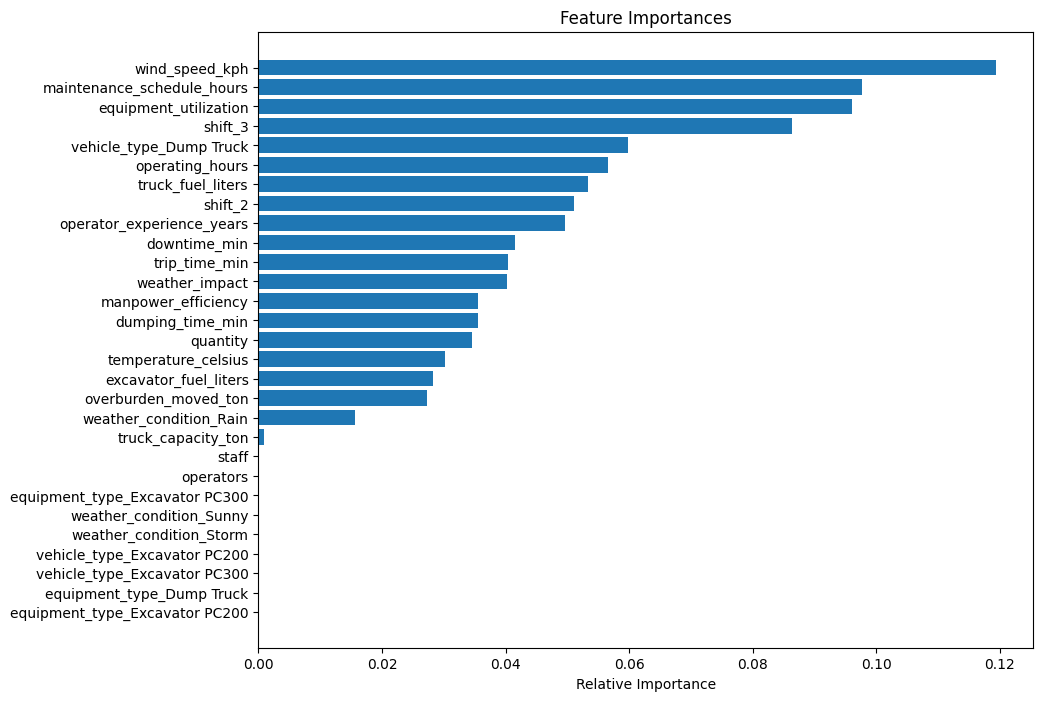


Enter desired production in tons/day (e.g., 285): 300

Current Production: 199.95 tons/day
Desired Production: 300.00 tons/day
Production Gap: 100.05 tons/day

Top factors influencing production:
- wind_speed_kph
- maintenance_schedule_hours
- equipment_utilization
- shift_3
- vehicle_type_Dump Truck

Recommended changes to achieve desired production:
- Consider operational adjustments. (wind_speed_kph)
- Consider operational adjustments. (maintenance_schedule_hours)
- None (equipment_utilization)
- Consider operational adjustments. (shift_3)
- Consider operational adjustments. (vehicle_type_Dump Truck)
- Consider operational adjustments. (operating_hours)
- Consider operational adjustments. (truck_fuel_liters)
- Consider operational adjustments. (shift_2)
- Consider operational adjustments. (operator_experience_years)
- None (downtime_min)
- Consider operational adjustments. (trip_time_min)
- Consider operational adjustments. (weather_impact)
- None (manpower_efficiency)
- Consider o

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import norm
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

file_path = '/Comprehensive_Mining_Operations_Dataset.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Please check the file path.")
    raise

try:
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
    print("Date column converted to datetime.")
except Exception as e:
    print("Error converting 'date' column to datetime:", e)
    raise

expected_columns = [
    'date', 'shift', 'vehicle_type', 'overburden_moved_ton', 'coal_mined_ton',
    'dumping_time_min', 'truck_capacity_ton', 'trip_time_min', 'excavator_fuel_liters',
    'truck_fuel_liters', 'downtime_min', 'operating_hours', 'equipment_type',
    'quantity', 'operators', 'staff', 'operator_experience_years', 'weather_condition',
    'temperature_celsius', 'wind_speed_kph', 'maintenance_schedule_hours'
]

missing_columns = set(expected_columns) - set(df.columns)
if missing_columns:
    print(f"Error: The following expected columns are missing from the dataset: {missing_columns}")
    raise Exception("Missing columns in dataset.")

if df.isnull().sum().sum() > 0:
    df = df.dropna()
    print("Missing values detected and removed.")

numeric_columns = [
    'overburden_moved_ton', 'coal_mined_ton', 'dumping_time_min',
    'truck_capacity_ton', 'trip_time_min', 'excavator_fuel_liters',
    'truck_fuel_liters', 'downtime_min', 'operating_hours', 'quantity',
    'operators', 'staff', 'operator_experience_years', 'temperature_celsius',
    'wind_speed_kph', 'maintenance_schedule_hours'
]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


if df.isnull().sum().sum() > 0:
    df = df.dropna()
    print("Missing values detected after type conversion and removed.")


def feature_engineering(df):

    df['equipment_utilization'] = df['operating_hours'] / (8 * df['quantity'])

    weather_impact_mapping = {'Sunny': 1.0, 'Cloudy': 0.9, 'Rain': 0.7, 'Storm': 0.5}
    df['weather_impact'] = df['weather_condition'].map(weather_impact_mapping)

    df['manpower_efficiency'] = df['operator_experience_years'] * df['operators']

    categorical_cols = ['vehicle_type', 'equipment_type', 'weather_condition', 'shift']
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    return df

df = feature_engineering(df)

if 'coal_mined_ton' not in df.columns:
    raise ValueError("The target variable 'coal_mined_ton' is not present in the dataset.")

features_to_exclude = ['date', 'coal_mined_ton']
X = df.drop(columns=features_to_exclude)
y = df['coal_mined_ton']

feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print("Data split into training and testing sets.")

model = XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)

eval_set = [(X_test, y_test)]

model = XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=42, early_stopping_rounds=10)
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)
print("Model training completed.")

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print("\nModel Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

    plt.figure(figsize=(10,6))
    plt.plot(y_test.values, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title('Actual vs Predicted Coal Mined (Tons)')
    plt.xlabel('Samples')
    plt.ylabel('Coal Mined (Tons)')
    plt.legend()
    plt.show()

    return predictions

predictions = evaluate_model(model, X_test, y_test)

def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(10,8))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

plot_feature_importance(model, feature_names)

def provide_recommendations(df, model, X, feature_names):

    last_obs = X.iloc[-1].copy()

    current_production = model.predict([last_obs])[0]

    desired_production = float(input("\nEnter desired production in tons/day (e.g., 285): "))

    print(f"\nCurrent Production: {current_production:.2f} tons/day")
    print(f"Desired Production: {desired_production:.2f} tons/day")

    production_gap = desired_production - current_production
    print(f"Production Gap: {production_gap:.2f} tons/day")

    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("\nTop factors influencing production:")
    for i, row in feature_importance_df.head(5).iterrows():
        print(f"- {row['Feature']}")

    adjustable_features = ['equipment_utilization', 'manpower_efficiency', 'overburden_moved_ton', 'downtime_min']
    required_changes = {}

    for feature in feature_importance_df['Feature']:
        if feature in adjustable_features:
            test_obs = last_obs.copy()
            original_value = test_obs[feature]
            if feature == 'downtime_min':
                direction = -1
            else:
                direction = 1
            for change in np.linspace(0, original_value*0.5, 20):
                test_obs[feature] = original_value + direction * change
                predicted_production = model.predict([test_obs])[0]
                if predicted_production >= desired_production:
                    required_increase = direction * change
                    required_changes[feature] = required_increase
                    break
            else:
                required_changes[feature] = None
        else:
            required_changes[feature] = "Consider operational adjustments."

    print("\nRecommended changes to achieve desired production:")
    for feature, change in required_changes.items():
        if change is not None and isinstance(change, (int, float)):
            percent_change = (change / last_obs[feature]) * 100
            action = "Increase" if change > 0 else "Decrease"
            print(f"- {action} '{feature}' by {abs(change):.2f} units ({abs(percent_change):.2f}%)")
        else:
            print(f"- {change} ({feature})")

    recent_productions = df['coal_mined_ton'][-30:]
    mean_production = recent_productions.mean()
    std_production = recent_productions.std()
    if std_production > 0:
        z_score = (desired_production - mean_production) / std_production
        probability = 1 - norm.cdf(z_score)
        probability_percentage = probability * 100
    else:
        probability_percentage = 0.0
    print(f"\nEstimated probability of achieving the target in the next 7 days: {probability_percentage:.2f}%")

    if current_production != 0:
        days_needed = (desired_production / current_production) * 1
        days_needed = np.ceil(days_needed)
    else:
        days_needed = np.inf
    print(f"Estimated days needed to achieve the target: {int(days_needed)} days")

    return last_obs

adjusted_features = provide_recommendations(df, model, X, feature_names)

def fetch_future_weather_data(days_ahead=7):

    future_weather = []
    for i in range(days_ahead):
        date = datetime.today() + timedelta(days=i+1)
        weather_conditions = ['Sunny', 'Cloudy', 'Rain', 'Storm']
        weather_desc = np.random.choice(weather_conditions)
        temperature = np.random.uniform(25, 35)
        wind_speed = np.random.uniform(5, 20)
        future_weather.append({
            'date': date.strftime('%Y-%m-%d'),
            'weather_condition': weather_desc,
            'temperature_celsius': temperature,
            'wind_speed_kph': wind_speed
        })
    return future_weather

def predict_future_production(model, df, adjusted_features, feature_names, days_ahead=7):
    future_weather = fetch_future_weather_data(days_ahead)
    future_df = pd.DataFrame(future_weather)

    for feature in adjusted_features.index:
        future_df[feature] = adjusted_features[feature]

    weather_impact_mapping = {'Sunny': 1.0, 'Cloudy': 0.9, 'Rain': 0.7, 'Storm': 0.5}
    future_df['weather_impact'] = future_df['weather_condition'].map(weather_impact_mapping)

    categorical_cols = ['weather_condition']

    future_df = pd.get_dummies(future_df, columns=categorical_cols, drop_first=True, dtype=float)
    for col in feature_names:
        if col not in future_df.columns:
            future_df[col] = 0

    future_df = future_df[feature_names]
    future_df['predicted_coal_mined_ton'] = model.predict(future_df)
    future_df['date'] = pd.to_datetime(future_df['date'])

    print("\nPredicted Production Over Next 7 Days with Adjusted Features:")
    print(future_df[['date', 'predicted_coal_mined_ton']])
    fig = px.bar(future_df, x='date', y='predicted_coal_mined_ton', title='Predicted Coal Mined Over Next 7 Days')
    fig.update_layout(xaxis_title='Date', yaxis_title='Predicted Coal Mined (Tons)')
    fig.show()

predict_future_production(model, df, adjusted_features, feature_names)

def create_dashboard(df):
    fig1 = px.line(df, x='date', y=['overburden_moved_ton', 'coal_mined_ton'], title='Production Metrics Over Time')
    fig1.update_layout(xaxis_title='Date', yaxis_title='Tons')
    fig1.show()

    fig2 = px.scatter(df, x='equipment_utilization', y='coal_mined_ton', color='weather_impact', title='Operational Efficiency')
    fig2.update_layout(xaxis_title='Equipment Utilization', yaxis_title='Coal Mined (Tons)')
    fig2.show()

    if 'shift' in df.columns:
        fig3 = px.box(df, x='shift', y='downtime_min', title='Downtime Distribution Across Shifts')
        fig3.update_layout(xaxis_title='Shift', yaxis_title='Downtime (Minutes)')
        fig3.show()
    else:
        print("Shift data not available for downtime analysis.")

    fig4 = go.Figure()
    fig4.add_trace(go.Scatter(x=df['date'], y=df['excavator_fuel_liters'], mode='lines', name='Excavator Fuel'))
    fig4.add_trace(go.Scatter(x=df['date'], y=df['truck_fuel_liters'], mode='lines', name='Truck Fuel'))
    fig4.update_layout(title='Fuel Consumption Over Time', xaxis_title='Date', yaxis_title='Fuel Consumption (Liters)')
    fig4.show()

    fig5 = px.scatter(df, x='date', y='coal_mined_ton', color='weather_impact', title='Weather Impact on Production')
    fig5.update_layout(xaxis_title='Date', yaxis_title='Coal Mined (Tons)')
    fig5.show()

create_dashboard(df)

def overall_status_monitor(df):
    total_overburden = df['overburden_moved_ton'].sum()
    total_coal_mined = df['coal_mined_ton'].sum()
    avg_truck_load = df['truck_capacity_ton'].mean()
    avg_trip_time = df['trip_time_min'].mean()
    total_downtime = df['downtime_min'].sum()
    total_excavator_fuel = df['excavator_fuel_liters'].sum()
    total_truck_fuel = df['truck_fuel_liters'].sum()

    print("\n===== Key Metrics =====")
    print(f"Total Overburden Moved: {total_overburden:.2f} tons")
    print(f"Total Coal Mined: {total_coal_mined:.2f} tons")
    print(f"Average Truck Load: {avg_truck_load:.2f} tons")
    print(f"Average Trip Time: {avg_trip_time:.2f} minutes")
    print(f"Total Downtime: {total_downtime:.2f} minutes")
    print(f"Total Excavator Fuel Used: {total_excavator_fuel:.2f} liters")
    print(f"Total Truck Fuel Used: {total_truck_fuel:.2f} liters")

    avg_downtime = df['downtime_min'].mean()
    if avg_downtime > 15:
        print("\nWarning: High average downtime detected. Consider optimizing operations to reduce downtime.")

overall_status_monitor(df)

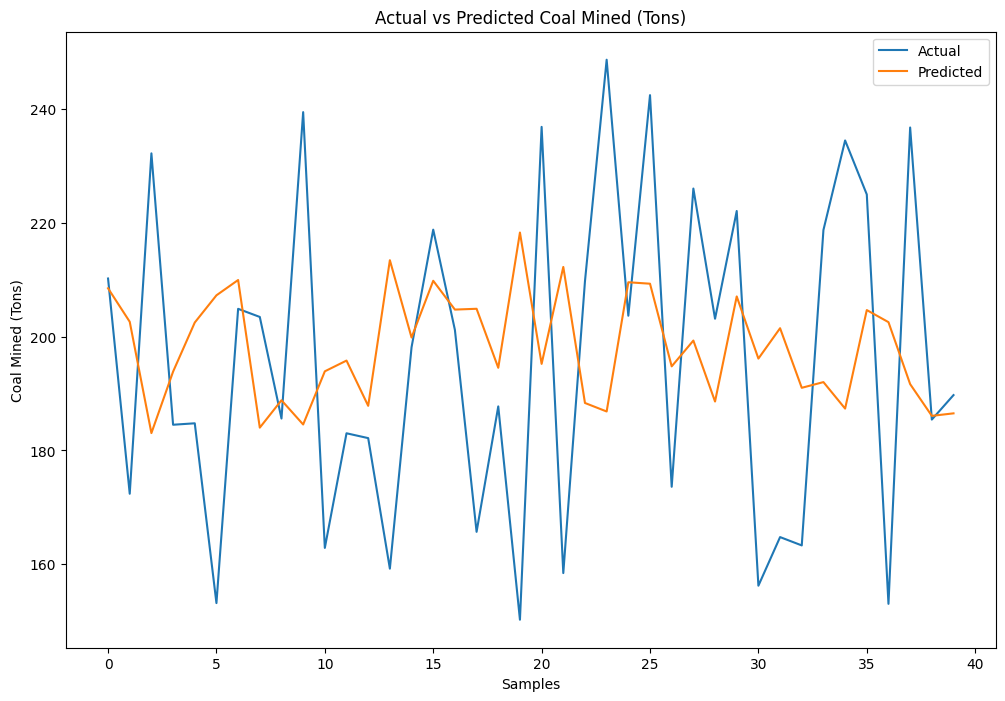

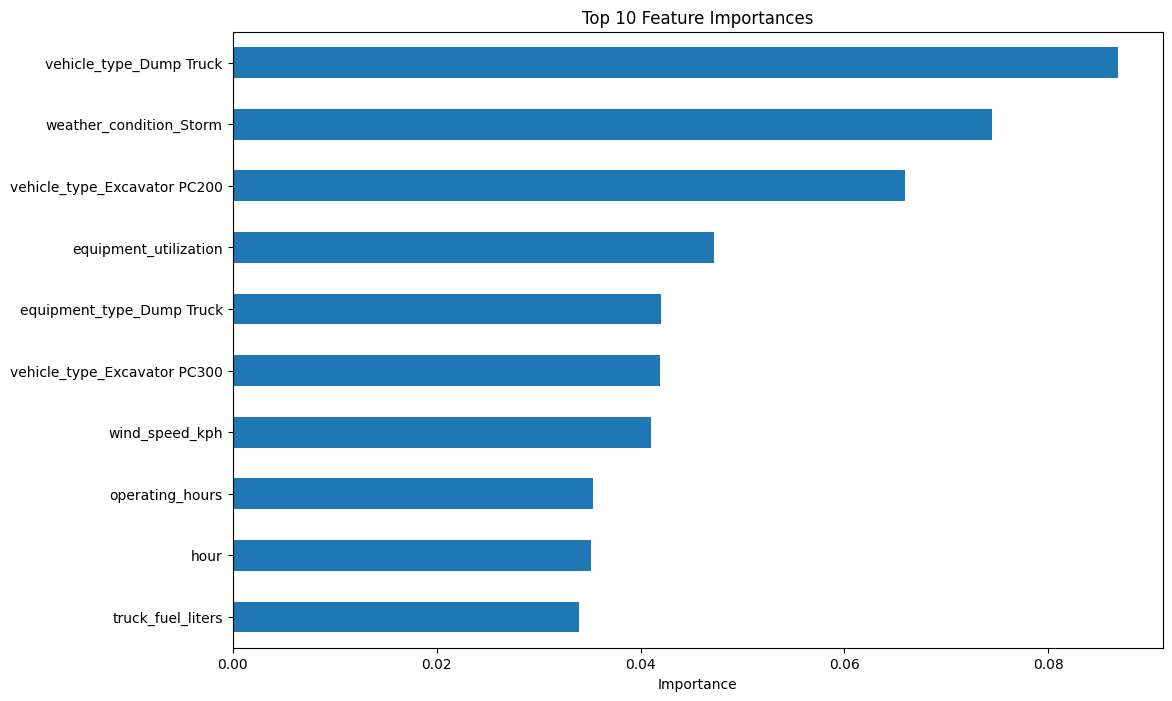

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
import plotly.express as px
import plotly.graph_objects as go
import warnings
import logging
from typing import Dict, List, Tuple, Optional
import joblib

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

class MiningOperationsAnalysis:
    def __init__(self, file_path: str):
        self.file_path = file_path
        self.df = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model = None
        self.scaler = StandardScaler()

    def load_dataset(self) -> None:
        """Load and validate the dataset."""
        try:
            self.df = pd.read_csv(self.file_path)
            logger.info("Dataset loaded successfully.")
        except FileNotFoundError:
            logger.error(f"File not found at path '{self.file_path}'")
            raise
        except Exception as e:
            logger.error(f"Error loading dataset: {str(e)}")
            raise

    def preprocess_data(self) -> None:
        """Preprocess the data including handling missing values and data type conversion."""
        try:

            self.df['date'] = pd.to_datetime(self.df['date'])

            expected_columns = {
                'overburden_moved_ton': float, 'coal_mined_ton': float,
                'dumping_time_min': float, 'truck_capacity_ton': float,
                'trip_time_min': float, 'excavator_fuel_liters': float,
                'truck_fuel_liters': float, 'downtime_min': float,
                'operating_hours': float, 'quantity': int,
                'operators': int, 'staff': int,
                'operator_experience_years': float, 'temperature_celsius': float,
                'wind_speed_kph': float, 'maintenance_schedule_hours': float,
                'weather_condition': str, 'vehicle_type': str,
                'equipment_type': str, 'shift': str
            }

            missing_columns = set(expected_columns.keys()) - set(self.df.columns)
            if missing_columns:
                raise ValueError(f"Missing required columns: {missing_columns}")

            for col, dtype in expected_columns.items():
                if dtype in (int, float):
                    self.df[col] = pd.to_numeric(self.df[col], errors='coerce')

            numeric_cols = self.df.select_dtypes(include=['int64', 'float64']).columns
            categorical_cols = self.df.select_dtypes(include=['object']).columns

            for col in numeric_cols:
                self.df[col].fillna(self.df[col].median(), inplace=True)
            for col in categorical_cols:
                self.df[col].fillna(self.df[col].mode()[0], inplace=True)

            logger.info("Data preprocessing completed successfully.")
        except Exception as e:
            logger.error(f"Error during data preprocessing: {str(e)}")
            raise

    def feature_engineering(self) -> None:
        """Perform feature engineering on the dataset."""
        try:
            self.df['equipment_utilization'] = self.df['operating_hours'] / (24 * self.df['quantity'])
            self.df['equipment_utilization'] = self.df['equipment_utilization'].clip(0, 1)

            weather_impact_mapping = {'Sunny': 1.0, 'Cloudy': 0.9, 'Rain': 0.7, 'Storm': 0.5}
            self.df['weather_impact'] = self.df['weather_condition'].map(weather_impact_mapping)

            self.df['manpower_efficiency'] = self.df['operator_experience_years'] * self.df['operators'] / self.df['staff']

            self.df['hour'] = self.df['date'].dt.hour
            self.df['day_of_week'] = self.df['date'].dt.dayofweek
            self.df['month'] = self.df['date'].dt.month

            categorical_cols = ['vehicle_type', 'equipment_type', 'weather_condition', 'shift']
            self.df = pd.get_dummies(self.df, columns=categorical_cols, drop_first=True)

            logger.info("Feature engineering completed successfully.")
        except Exception as e:
            logger.error(f"Error during feature engineering: {str(e)}")
            raise

    def prepare_features(self) -> None:
        """Prepare features for model training."""
        try:
            features_to_exclude = ['date', 'coal_mined_ton']
            self.X = self.df.drop(columns=features_to_exclude)
            self.y = self.df['coal_mined_ton']

            self.X = pd.DataFrame(self.scaler.fit_transform(self.X), columns=self.X.columns)

            logger.info("Features prepared successfully.")
        except Exception as e:
            logger.error(f"Error during feature preparation: {str(e)}")
            raise

    def split_data(self, test_size: float = 0.2) -> None:
        """Split the data into training and testing sets."""
        try:
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                self.X, self.y, test_size=test_size, shuffle=False
            )
            logger.info("Data split completed successfully.")
        except Exception as e:
            logger.error(f"Error during data splitting: {str(e)}")
            raise

    def train_model(self) -> None:
        """Train the XGBoost model."""
        try:
            self.model = XGBRegressor(
                n_estimators=500,
                learning_rate=0.05,
                max_depth=7,
                min_child_weight=1,
                subsample=0.8,
                colsample_bytree=0.8,
                random_state=42
            )
            self.model.fit(self.X_train, self.y_train)
            logger.info("Model training completed successfully.")
        except Exception as e:
            logger.error(f"Error during model training: {str(e)}")
            raise

    def evaluate_model(self) -> Dict[str, float]:
        """Evaluate the model and return performance metrics."""
        try:
            predictions = self.model.predict(self.X_test)
            metrics = {
                'mae': mean_absolute_error(self.y_test, predictions),
                'rmse': np.sqrt(mean_squared_error(self.y_test, predictions)),
                'r2': r2_score(self.y_test, predictions)
            }

            logger.info(f"Model Performance: MAE={metrics['mae']:.2f}, RMSE={metrics['rmse']:.2f}, R2={metrics['r2']:.2f}")

            plt.figure(figsize=(12, 8))
            plt.plot(self.y_test.values, label='Actual')
            plt.plot(predictions, label='Predicted')
            plt.title('Actual vs Predicted Coal Mined (Tons)')
            plt.xlabel('Samples')
            plt.ylabel('Coal Mined (Tons)')
            plt.legend()
            plt.show()

            return metrics
        except Exception as e:
            logger.error(f"Error during model evaluation: {str(e)}")
            raise

    def plot_feature_importance(self) -> None:
        """Plot feature importance."""
        try:
            feature_importances = pd.Series(self.model.feature_importances_, index=self.X.columns)
            plt.figure(figsize=(12, 8))
            feature_importances.sort_values(ascending=True).tail(10).plot(kind='barh')
            plt.title('Top 10 Feature Importances')
            plt.xlabel('Importance')
            plt.show()
        except Exception as e:
            logger.error(f"Error plotting feature importance: {str(e)}")
            raise

    def fetch_weather_forecast(self, days_ahead: int = 7, city: str = "Kalimantan Timur") -> List[Dict]:
        """Fetch weather forecast data."""
        api_key = "5eb5d3f015f74fb2b0a214119240310"
        base_url = f"http://api.weatherapi.com/v1/forecast.json?key={api_key}&q={city}&days={days_ahead}"

        try:
            response = requests.get(base_url, timeout=10)
            response.raise_for_status()
            data = response.json()

            forecast_days = data['forecast']['forecastday']
            future_weather = []

            for day in forecast_days:
                future_weather.append({
                    'date': day['date'],
                    'weather_condition': day['day']['condition']['text'],
                    'temperature_celsius': day['day']['avgtemp_c'],
                    'wind_speed_kph': day['day']['maxwind_kph']
                })

            return future_weather
        except Exception as e:
            logger.warning(f"Error fetching weather data: {str(e)}. Using synthetic data instead.")
            return self._generate_synthetic_weather(days_ahead)

    def _generate_synthetic_weather(self, days_ahead: int) -> List[Dict]:
        """Generate synthetic weather data."""
        weather_conditions = ['Sunny', 'Cloudy', 'Rain', 'Storm']
        future_weather = []

        for i in range(days_ahead):
            future_weather.append({
                'date': (datetime.today() + timedelta(days=i+1)).strftime('%Y-%m-%d'),
                'weather_condition': np.random.choice(weather_conditions),
                'temperature_celsius': np.random.uniform(25, 35),
                'wind_speed_kph': np.random.uniform(5, 20)
            })

        return future_weather

    def predict_future_production(self, days_ahead: int = 7) -> pd.DataFrame:
        """Predict future production based on weather forecast."""
        try:
            future_weather = self.fetch_weather_forecast(days_ahead)
            future_df = pd.DataFrame(future_weather)

            for col in self.X.columns:
                if col not in future_df.columns:
                    if col.startswith(('vehicle_type_', 'equipment_type_', 'weather_condition_', 'shift_')):
                        future_df[col] = 0
                    else:
                        future_df[col] = self.X[col].mean()

            future_df = future_df[self.X.columns]
            future_df_scaled = pd.DataFrame(
                self.scaler.transform(future_df),
                columns=future_df.columns
            )

            predictions = self.model.predict(future_df_scaled)
            results_df = pd.DataFrame({
                'date': [x['date'] for x in future_weather],
                'predicted_coal_mined_ton': predictions,
                'weather_condition': [x['weather_condition'] for x in future_weather]
            })

            fig = px.bar(
                results_df,
                x='date',
                y='predicted_coal_mined_ton',
                color='weather_condition',
                title='Predicted Coal Production Over Next 7 Days'
            )
            fig.show()

            return results_df
        except Exception as e:
            logger.error(f"Error predicting future production: {str(e)}")
            raise

    def save_model(self, filepath: str) -> None:
        """Save the trained model to a file."""
        try:
            joblib.dump((self.model, self.scaler), filepath)
            logger.info(f"Model saved successfully to {filepath}")
        except Exception as e:
            logger.error(f"Error saving model: {str(e)}")
            raise

    @classmethod
    def load_model(cls, filepath: str) -> Tuple[XGBRegressor, StandardScaler]:
        """Load a trained model from a file."""
        try:
            model, scaler = joblib.load(filepath)
            logger.info(f"Model loaded successfully from {filepath}")
            return model, scaler
        except Exception as e:
            logger.error(f"Error loading model: {str(e)}")
            raise

def main():
    try:
        file_path = '/Comprehensive_Mining_Operations_Dataset.csv'
        analyzer = MiningOperationsAnalysis(file_path)

        analyzer.load_dataset()
        analyzer.preprocess_data()
        analyzer.feature_engineering()
        analyzer.prepare_features()
        analyzer.split_data()
        analyzer.train_model()

        metrics = analyzer.evaluate_model()
        analyzer.plot_feature_importance()

        future_predictions = analyzer.predict_future_production()

        analyzer.save_model('mining_model.joblib')

        logger.info("Analysis completed successfully!")

    except Exception as e:
        logger.error(f"An error occurred during analysis: {str(e)}")

if __name__ == "__main__":
    main()

Dataset loaded successfully.
Data split into training and testing sets.
Model training completed.

Model Performance Metrics:
MAE: 2.09
RMSE: 2.57
R^2 Score: 0.99
Mean Absolute Percentage Error: 1.06%


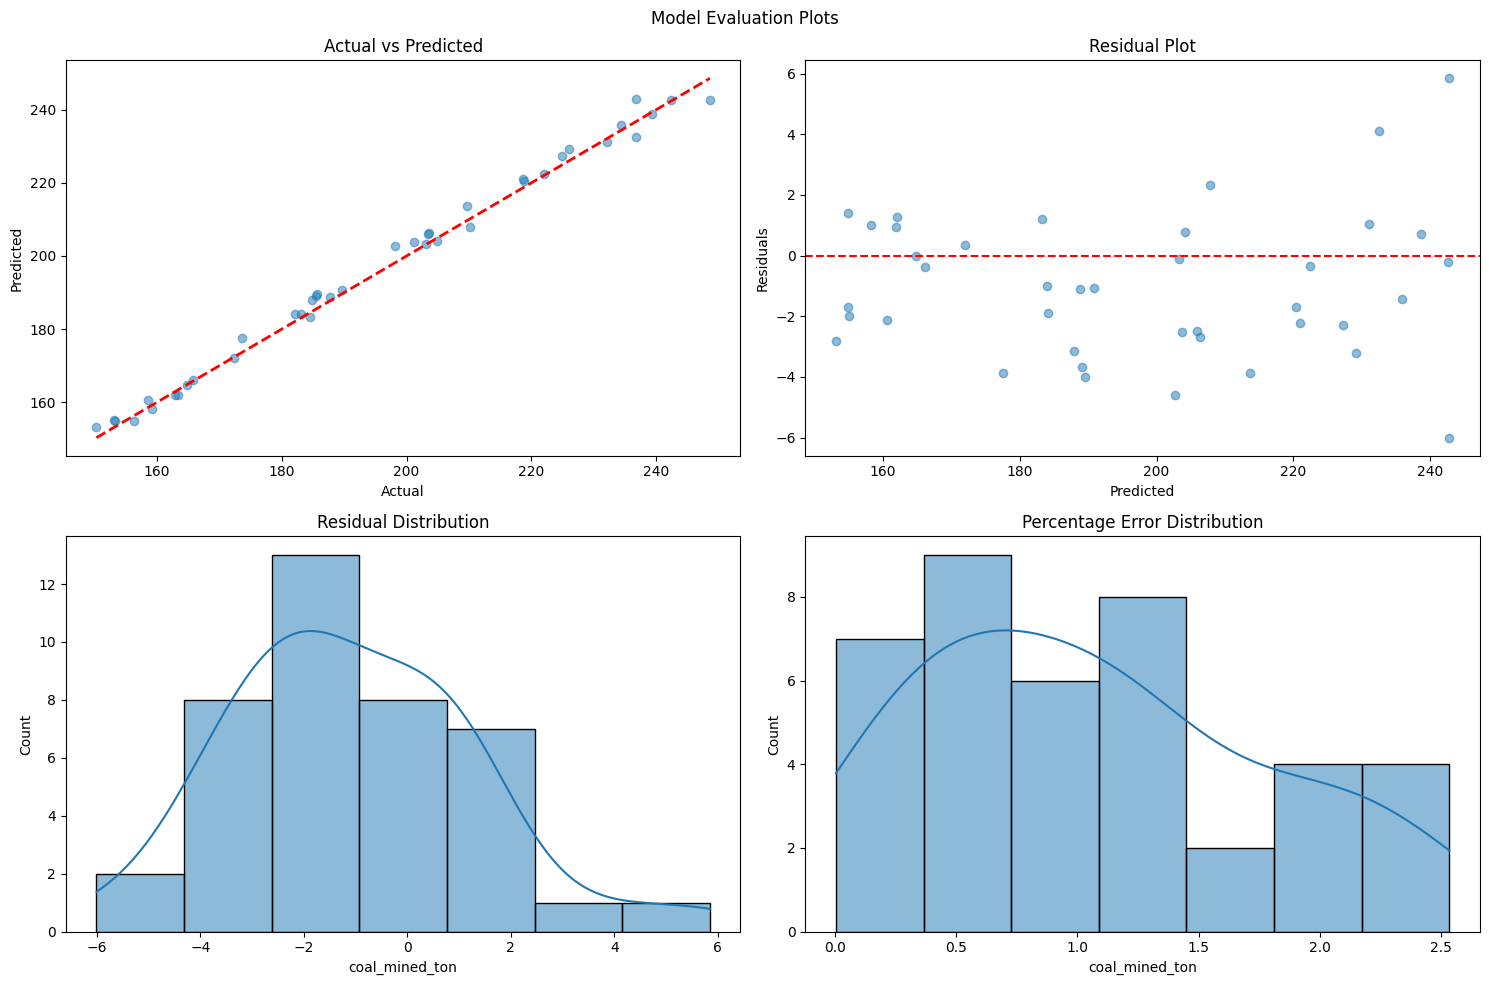

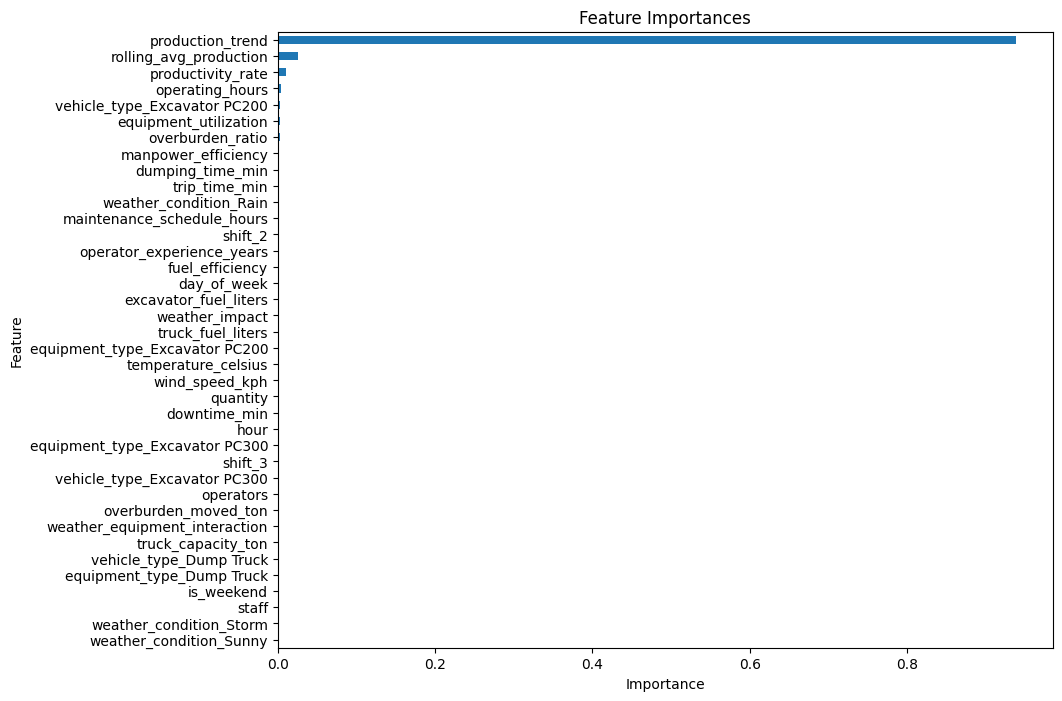


Enter desired production increase in tons/day (e.g., 285): 300

Current Production: 189.72 tons/day
Desired Production: 300.00 tons/day
Production Gap: 110.28 tons/day

Top factors influencing production:
- production_trend
- rolling_avg_production
- productivity_rate
- operating_hours
- vehicle_type_Excavator PC200

Estimating required increases in key aspects to achieve target...

Quantity of aspects that need to be increased or adjusted:
- Adjust operational strategies related to this feature.
- Adjust operational strategies related to this feature.
- Adjust operational strategies related to this feature.
- Adjust operational strategies related to this feature.
- Consider increasing the number or capacity of 'type_Excavator PC200'.

Estimated probability of achieving the target in the next 7 days: 0.03%


TypeError: 'float' object is not iterable

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import norm
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

file_path = '/Comprehensive_Mining_Operations_Dataset.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at the path '{file_path}'. Please check the file path.")
    raise

try:
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
except Exception as e:
    print("Error converting 'date' column to datetime:", e)
    raise

if df.isnull().sum().sum() > 0:
    df = df.dropna()
    print("Missing values detected and removed.")

numeric_columns = [
    'overburden_moved_ton', 'coal_mined_ton', 'dumping_time_min',
    'truck_capacity_ton', 'trip_time_min', 'excavator_fuel_liters',
    'truck_fuel_liters', 'downtime_min', 'operating_hours', 'quantity',
    'operators', 'staff', 'operator_experience_years', 'temperature_celsius',
    'wind_speed_kph', 'maintenance_schedule_hours'
]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

if df.isnull().sum().sum() > 0:
    df = df.dropna()
    print("Missing values detected after type conversion and removed.")

def feature_engineering(df):

    df['equipment_utilization'] = df['operating_hours'] / (24 * df['quantity'])
    weather_impact_mapping = {'Sunny': 1.0, 'Cloudy': 0.9, 'Rain': 0.7, 'Storm': 0.5}
    df['weather_impact'] = df['weather_condition'].map(weather_impact_mapping)
    df['manpower_efficiency'] = df['operator_experience_years'] * df['operators']

    df['fuel_efficiency'] = (df['excavator_fuel_liters'] + df['truck_fuel_liters']) / df['coal_mined_ton']
    df['productivity_rate'] = df['coal_mined_ton'] / df['operating_hours']
    df['overburden_ratio'] = df['overburden_moved_ton'] / df['coal_mined_ton']

    df['hour'] = df['date'].dt.hour
    df['day_of_week'] = df['date'].dt.dayofweek
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

    df['rolling_avg_production'] = df['coal_mined_ton'].rolling(window=24, min_periods=1).mean()
    df['production_trend'] = df['coal_mined_ton'] / df['rolling_avg_production']

    df['weather_equipment_interaction'] = df['weather_impact'] * df['equipment_utilization']

    categorical_cols = ['vehicle_type', 'equipment_type', 'weather_condition', 'shift']
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    return df

df = feature_engineering(df)

if 'coal_mined_ton' not in df.columns:
    raise ValueError("The target variable 'coal_mined_ton' is not present in the dataset.")

features_to_exclude = ['date', 'coal_mined_ton']
X = df.drop(columns=features_to_exclude)
y = df['coal_mined_ton']

X_columns = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print("Data split into training and testing sets.")

def train_model(X_train, y_train):
    model = XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
    model.fit(X_train, y_train)
    return model

model = train_model(X_train, y_train)
print("Model training completed.")

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print(f"\nModel Performance Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    percentage_error = np.abs((y_test - predictions) / y_test) * 100
    mape = np.mean(percentage_error)
    print(f"Mean Absolute Percentage Error: {mape:.2f}%")

    residuals = y_test - predictions

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Model Evaluation Plots')

    axes[0, 0].scatter(y_test, predictions, alpha=0.5)
    axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Actual')
    axes[0, 0].set_ylabel('Predicted')
    axes[0, 0].set_title('Actual vs Predicted')

    axes[0, 1].scatter(predictions, residuals, alpha=0.5)
    axes[0, 1].axhline(y=0, color='r', linestyle='--')
    axes[0, 1].set_xlabel('Predicted')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].set_title('Residual Plot')

    sns.histplot(residuals, kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('Residual Distribution')

    sns.histplot(percentage_error, kde=True, ax=axes[1, 1])
    axes[1, 1].set_title('Percentage Error Distribution')

    plt.tight_layout()
    plt.show()

    return {'mae': mae, 'rmse': rmse, 'r2': r2, 'mape': mape}

evaluate_model(model, X_test, y_test)

def plot_feature_importance(model, X_columns):
    feature_importances = pd.Series(model.feature_importances_, index=X_columns)
    feature_importances.sort_values(ascending=False).plot(kind='barh', figsize=(10,8), title='Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()
    plt.show()

plot_feature_importance(model, X_columns)

def provide_recommendations(df, model):

    desired_production = float(input("\nEnter desired production increase in tons/day (e.g., 285): "))
    current_production = df['coal_mined_ton'].iloc[-1]
    production_gap = desired_production - current_production

    print(f"\nCurrent Production: {current_production:.2f} tons/day")
    print(f"Desired Production: {desired_production:.2f} tons/day")
    print(f"Production Gap: {production_gap:.2f} tons/day\n")

    feature_importances = pd.Series(model.feature_importances_, index=X_columns)
    important_features = feature_importances.sort_values(ascending=False).head(5)
    print("Top factors influencing production:")
    for feature in important_features.index:
        print(f"- {feature}")

    print("\nEstimating required increases in key aspects to achieve target...")
    required_increases = {}
    adjusted_features = X.iloc[-1].copy()
    original_features = adjusted_features.copy()
    predicted_production = model.predict([adjusted_features])[0]

    adjustable_features = ['equipment_utilization', 'manpower_efficiency', 'overburden_moved_ton', 'downtime_min', 'maintenance_schedule_hours', 'truck_fuel_liters']

    for feature in important_features.index:
        if feature in adjustable_features:

            original_value = adjusted_features[feature]
            step = original_value * 0.05
            max_iterations = 20
            for i in range(max_iterations):
                if feature in ['downtime_min', 'maintenance_schedule_hours']:
                    adjusted_features[feature] -= step
                else:
                    adjusted_features[feature] += step
                predicted_production = model.predict([adjusted_features])[0]
                if predicted_production >= desired_production:
                    required_increase = adjusted_features[feature] - original_value
                    if feature in ['downtime_min', 'maintenance_schedule_hours']:
                        required_increase = original_value - adjusted_features[feature]
                    required_increases[feature] = required_increase
                    break
            else:
                required_increases[feature] = "Unable to achieve target by adjusting this feature alone."
        else:

            if feature.startswith('vehicle_type_'):
                vehicle_type = feature.split('_', 1)[1]
                required_increases[feature] = f"Consider increasing the number or capacity of '{vehicle_type}'."
            elif feature == 'weather_impact':
                required_increases[feature] = "Schedule operations during favorable weather conditions."
            else:
                required_increases[feature] = "Adjust operational strategies related to this feature."

    print("\nQuantity of aspects that need to be increased or adjusted:")
    for feature, increase in required_increases.items():
        if isinstance(increase, (int, float)):
            original_value = original_features[feature]
            percentage_change = (increase / original_value) * 100
            if feature in ['downtime_min', 'maintenance_schedule_hours']:
                print(f"- Decrease '{feature}' by {increase:.2f} units ({percentage_change:.2f}%)")
            else:
                print(f"- Increase '{feature}' by {increase:.2f} units ({percentage_change:.2f}%)")
        else:
            print(f"- {increase}")

    recent_productions = df['coal_mined_ton'][-30:]
    mean_production = recent_productions.mean()
    std_production = recent_productions.std()
    z_score = (desired_production - mean_production) / std_production if std_production > 0 else 0
    probability = 1 - norm.cdf(z_score)
    probability_percentage = probability * 100
    print(f"\nEstimated probability of achieving the target in the next 7 days: {probability_percentage:.2f}%")

    predict_future_production(model, df, adjusted_features, desired_production)

provide_recommendations(df, model)

def fetch_future_weather_data(days_ahead=7, city="Kalimantan Timur"):

    api_key = "5eb5d3f015f74fb2b0a214119240310"
    base_url = f"http://api.weatherapi.com/v1/forecast.json?key={api_key}&q={city}&days={days_ahead}"

    try:
        response = requests.get(base_url)
        response.raise_for_status()
        data = response.json()
        forecast_days = data['forecast']['forecastday']
        future_weather = []
        for day in forecast_days:
            date = day['date']
            weather_desc = day['day']['condition']['text']
            temperature = day['day']['avgtemp_c']
            wind_speed = day['day']['maxwind_kph']
            future_weather.append({'date': date, 'weather_condition': weather_desc, 'temperature_celsius': temperature, 'wind_speed_kph': wind_speed})
        return future_weather
    except Exception as e:
        print("Error fetching weather data:", e)

        future_weather = []
        for i in range(days_ahead):
            date = datetime.today() + timedelta(days=i+1)
            weather_conditions = ['Sunny', 'Cloudy', 'Rain', 'Storm']
            weather_desc = np.random.choice(weather_conditions)
            temperature = np.random.uniform(25, 35)
            wind_speed = np.random.uniform(5, 20)
            future_weather.append({'date': date.strftime('%Y-%m-%d'), 'weather_condition': weather_desc, 'temperature_celsius': temperature, 'wind_speed_kph': wind_speed})
        return future_weather

def predict_future_production(model, df, adjusted_features=None, desired_production=None):
    future_weather = fetch_future_weather_data()
    future_df = pd.DataFrame(future_weather)

    future_dates = future_df['date']
    future_df['weather_impact'] = future_df['weather_condition'].map({'Sunny': 1.0, 'Cloudy': 0.9, 'Rain': 0.7, 'Storm': 0.5})

    if adjusted_features is not None:
        for feature in adjusted_features.index:
            if feature not in future_df.columns:
                future_df[feature] = adjusted_features[feature]
    else:
        avg_features = df.mean()
        for col in X_columns:
            if col not in future_df.columns:

                future_df[col] = avg_features.get(col, 0)
    for col in X_columns:
        if col not in future_df.columns:

            future_df[col] = avg_features.get(col, 0)

    categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'date' and col != 'coal_mined_ton']
    future_df = pd.get_dummies(future_df, columns=categorical_cols, drop_first=True)

    missing_cols = set(X_columns) - set(future_df.columns)
    for col in missing_cols:
        future_df[col] = 0
    future_df = future_df[X_columns]

    future_df['predicted_coal_mined_ton'] = model.predict(future_df)

    future_df['date'] = future_dates.values
    future_df['cumulative_production'] = future_df['predicted_coal_mined_ton'].cumsum()
    if desired_production is not None:
        total_target = desired_production * len(future_df)
        cumulative_production = future_df['cumulative_production'].iloc[-1]
        days_needed = (desired_production * len(future_df)) / cumulative_production
        days_needed = np.ceil(days_needed)
        print(f"\nEstimated days needed to achieve the target: {days_needed} days")

    print("\nPredicted Production Over Next 7 Days with Adjusted Features:")
    print(future_df[['date', 'predicted_coal_mined_ton']])

    visualize_predictions(future_df, desired_production)

def visualize_predictions(future_df, desired_production=None):
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=future_df['date'],
        y=future_df['predicted_coal_mined_ton'],
        name='Predicted Production',
        marker_color=future_df['weather_impact'].map({1.0: 'green', 0.9: 'yellow', 0.7: 'orange', 0.5: 'red'})
    ))

    fig.add_trace(go.Scatter(
        x=future_df['date'],
        y=future_df['cumulative_production'],
        name='Cumulative Production',
        yaxis='y2',
        line=dict(color='blue', width=2)
    ))

    if desired_production is not None:
        target_line = [desired_production] * len(future_df)
        fig.add_trace(go.Scatter(
            x=future_df['date'],
            y=target_line,
            name='Daily Target',
            line=dict(color='red', width=2, dash='dash')
        ))

    fig.update_layout(
        title='Predicted Coal Production Forecast',
        xaxis_title='Date',
        yaxis_title='Daily Production (Tons)',
        yaxis2=dict(
            title='Cumulative Production (Tons)',
            overlaying='y',
            side='right'
        ),
        barmode='group',
        hovermode='x unified'
    )

    weather_icons = {
        1.0: '☀️', 0.9: '☁️', 0.7: '🌧️', 0.5: '⛈️'
    }
    annotations = [
        dict(
            x=date,
            y=pred,
            text=weather_icons.get(impact, ''),
            showarrow=False,
            yshift=10,
        )
        for date, pred, impact in zip(future_df['date'], future_df['predicted_coal_mined_ton'], future_df['weather_impact'])
    ]
    fig.update_layout(annotations=annotations)

    fig.show()

def create_dashboard(df):

    fig1 = px.line(df, x='date', y=['overburden_moved_ton', 'coal_mined_ton'], title='Production Metrics Over Time')
    fig1.update_layout(xaxis_title='Date', yaxis_title='Tons', legend_title='Metric')
    fig1.show()

    fig2 = px.scatter(df, x='equipment_utilization', y='coal_mined_ton', color='weather_impact', size='manpower_efficiency', title='Operational Efficiency')
    fig2.update_layout(xaxis_title='Equipment Utilization', yaxis_title='Coal Mined (Tons)')
    fig2.show()

    shift_columns = [col for col in df.columns if 'shift_' in col]
    if shift_columns:
        shift_col = shift_columns[0]
        fig3 = px.box(df, x=shift_col, y='downtime_min', title='Downtime Distribution Across Shifts')
        fig3.update_layout(xaxis_title='Shift', yaxis_title='Downtime (Minutes)')
        fig3.show()
    else:
        print("Shift columns not found for downtime analysis.")

    fig4 = go.Figure()
    fig4.add_trace(go.Bar(x=df['date'], y=df['excavator_fuel_liters'], name='Excavator Fuel'))
    fig4.add_trace(go.Bar(x=df['date'], y=df['truck_fuel_liters'], name='Truck Fuel'))
    fig4.update_layout(barmode='stack', title='Fuel Consumption Over Time', xaxis_title='Date', yaxis_title='Fuel Consumption (Liters)')
    fig4.show()

    fig5 = px.scatter(df, x='date', y='coal_mined_ton', color='weather_impact', title='Weather Impact on Production')
    fig5.update_layout(xaxis_title='Date', yaxis_title='Coal Mined (Tons)')
    fig5.show()

create_dashboard(df)

def overall_status_monitor(df, model):

    total_overburden = df['overburden_moved_ton'].sum()
    total_coal_mined = df['coal_mined_ton'].sum()
    avg_truck_load = df['truck_capacity_ton'].mean()
    avg_trip_time = df['trip_time_min'].mean()
    total_downtime = df['downtime_min'].sum()
    total_fuel_excavator = df['excavator_fuel_liters'].sum()
    total_fuel_truck = df['truck_fuel_liters'].sum()

    print("===== Key Metrics =====")
    print(f"Total Overburden Moved: {total_overburden:.2f} tons")
    print(f"Total Coal Mined: {total_coal_mined:.2f} tons")
    print(f"Average Truck Load: {avg_truck_load:.2f} tons")
    print(f"Average Trip Time: {avg_trip_time:.2f} minutes")
    print(f"Total Downtime: {total_downtime:.2f} minutes")
    print(f"Total Excavator Fuel Used: {total_fuel_excavator:.2f} liters")
    print(f"Total Truck Fuel Used: {total_fuel_truck:.2f} liters")

    avg_downtime = df['downtime_min'].mean()
    if avg_downtime > 15:
        print("\nWarning: High downtime detected. Consider optimizing operations during peak hours or shifts.")

    current_weather = fetch_future_weather_data(days_ahead=1)[0]
    if current_weather:
        print(f"\nCurrent Weather: {current_weather['weather_condition']}, Temperature: {current_weather['temperature_celsius']:.1f}°C, Wind Speed: {current_weather['wind_speed_kph']:.1f} km/h")
        if "rain" in current_weather['weather_condition'].lower():
            print("Alert: Rain expected. Recommend pausing certain outdoor activities and optimizing for indoor maintenance or lower-risk operations.")

overall_status_monitor(df, model)

Dataset loaded successfully.

Model Performance Metrics:
MAE: 1.35
RMSE: 1.72
R² Score: 1.00
MAPE: 0.71%


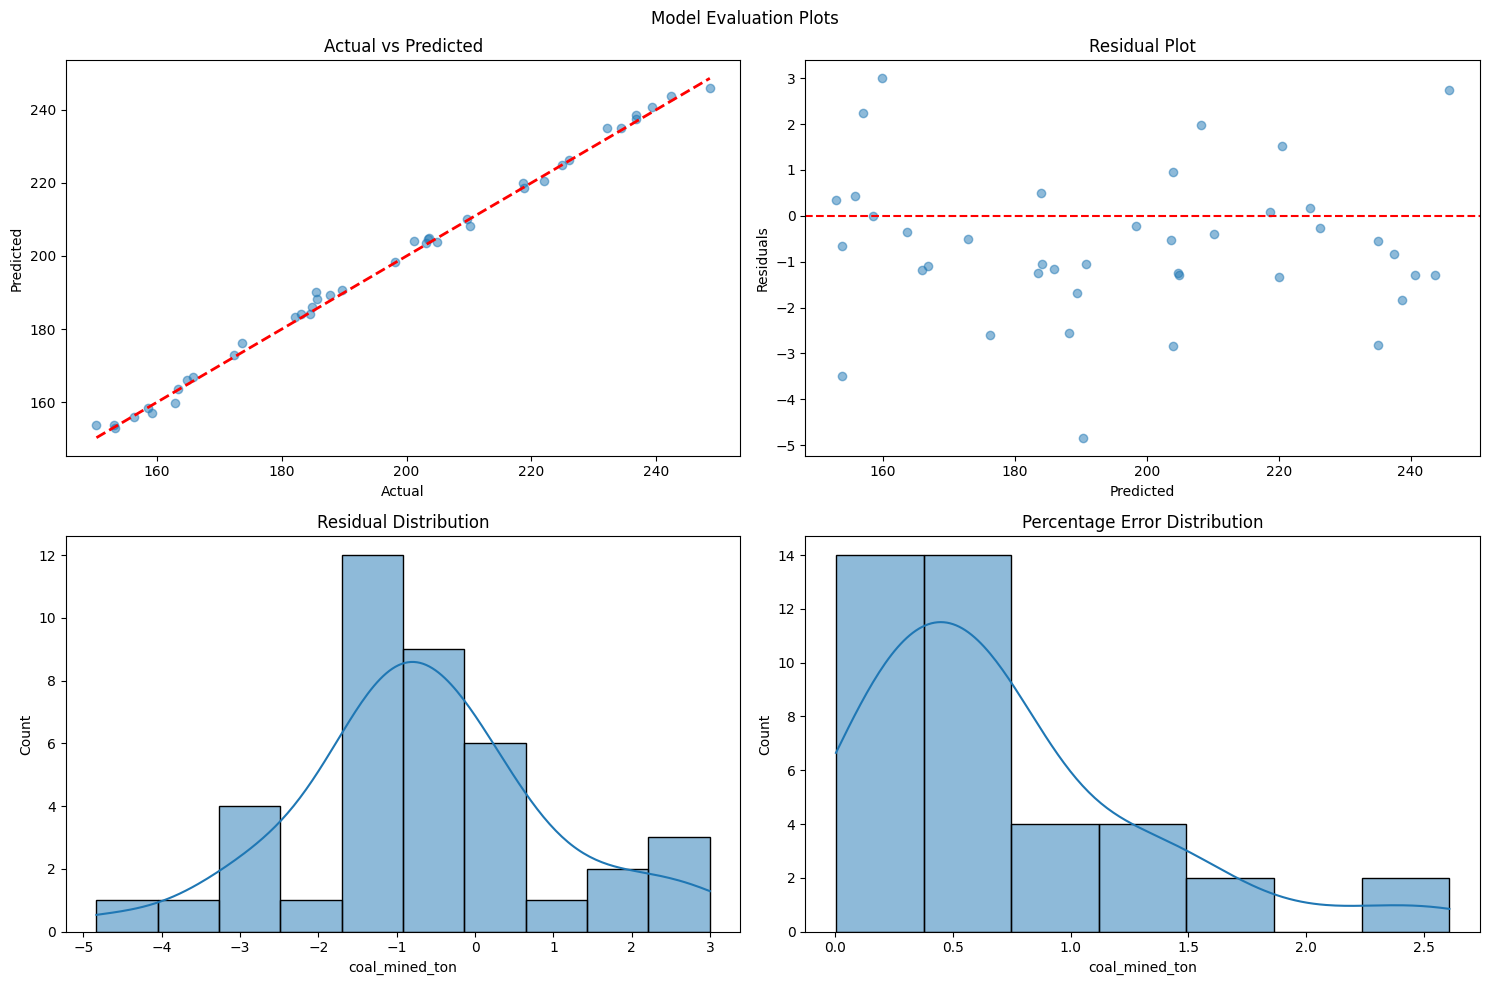

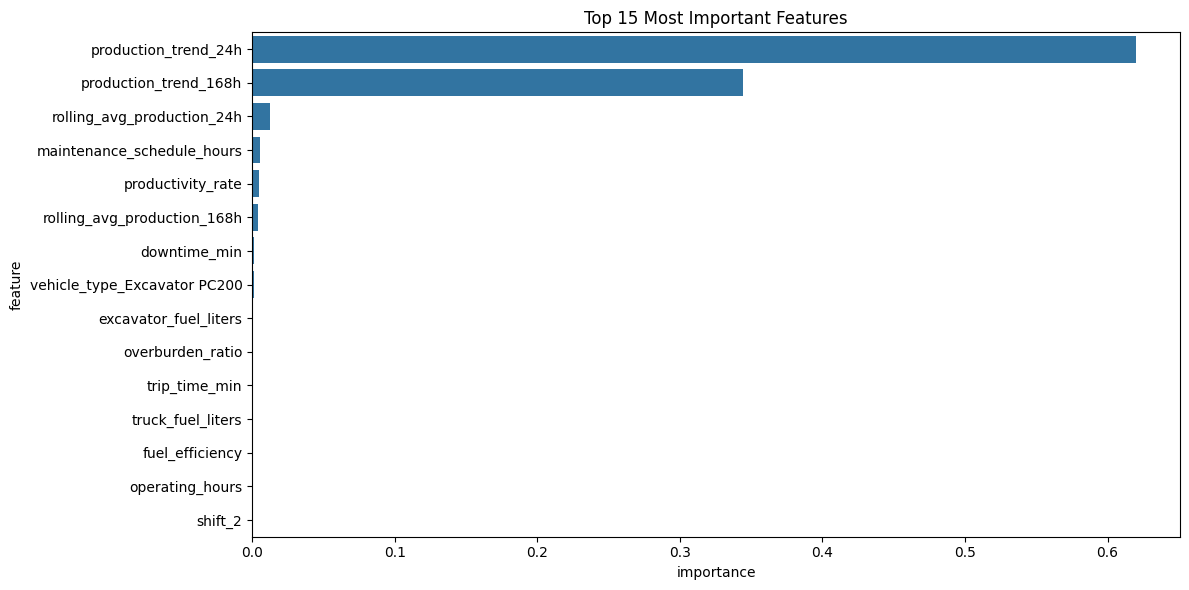


Enter desired daily production target (tons): 300
Enter number of days to forecast (1-30): 24
An error occurred: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- weather_condition_Moderate rain
- weather_condition_Patchy rain nearby
Feature names seen at fit time, yet now missing:
- equipment_type_Dump Truck
- equipment_type_Excavator PC200
- equipment_type_Excavator PC300
- shift_2
- shift_3
- ...



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- weather_condition_Moderate rain
- weather_condition_Patchy rain nearby
Feature names seen at fit time, yet now missing:
- equipment_type_Dump Truck
- equipment_type_Excavator PC200
- equipment_type_Excavator PC300
- shift_2
- shift_3
- ...


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        required_columns = [
            'date', 'overburden_moved_ton', 'coal_mined_ton', 'dumping_time_min',
            'truck_capacity_ton', 'trip_time_min', 'excavator_fuel_liters',
            'truck_fuel_liters', 'downtime_min', 'operating_hours', 'quantity',
            'operators', 'staff', 'operator_experience_years', 'temperature_celsius',
            'wind_speed_kph', 'maintenance_schedule_hours', 'vehicle_type',
            'equipment_type', 'weather_condition', 'shift'
        ]
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")
        print("Dataset loaded successfully.")
        return df
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: File not found at the path '{file_path}'. Please check the file path.")
    except Exception as e:
        raise Exception(f"Error loading dataset: {str(e)}")

def preprocess_data(df):

    df_processed = df.copy()

    try:
        df_processed['date'] = pd.to_datetime(df_processed['date'])
    except Exception as e:
        raise ValueError(f"Error converting 'date' column to datetime: {str(e)}")

    numeric_ranges = {
        'overburden_moved_ton': (0, 1000000),
        'coal_mined_ton': (0, 100000),
        'dumping_time_min': (0, 120),
        'truck_capacity_ton': (0, 400),
        'trip_time_min': (0, 240),
        'excavator_fuel_liters': (0, 10000),
        'truck_fuel_liters': (0, 10000),
        'downtime_min': (0, 1440),
        'operating_hours': (0, 24),
        'quantity': (0, 100),
        'operators': (0, 1000),
        'staff': (0, 1000),
        'operator_experience_years': (0, 50),
        'temperature_celsius': (-20, 50),
        'wind_speed_kph': (0, 200),
        'maintenance_schedule_hours': (0, 8760)
    }

    for col, (min_val, max_val) in numeric_ranges.items():
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        df_processed = df_processed[
            (df_processed[col].between(min_val, max_val)) |
            (df_processed[col].isna())
        ]

    initial_rows = len(df_processed)
    df_processed = df_processed.dropna()
    rows_dropped = initial_rows - len(df_processed)
    if rows_dropped > 0:
        print(f"Removed {rows_dropped} rows with missing values.")

    return df_processed

def feature_engineering(df):
    df_engineered = df.copy()

    df_engineered['equipment_utilization'] = df_engineered['operating_hours'] / 24
    weather_impact_mapping = {'Sunny': 1.0, 'Cloudy': 0.9, 'Rain': 0.7, 'Storm': 0.5}
    df_engineered['weather_impact'] = df_engineered['weather_condition'].map(weather_impact_mapping).fillna(0.8)

    df_engineered['fuel_efficiency'] = (df_engineered['excavator_fuel_liters'] + df_engineered['truck_fuel_liters']) / \
                                      df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)
    df_engineered['productivity_rate'] = df_engineered['coal_mined_ton'] / \
                                        df_engineered['operating_hours'].where(df_engineered['operating_hours'] > 0, 1)
    df_engineered['overburden_ratio'] = df_engineered['overburden_moved_ton'] / \
                                       df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)


    df_engineered['hour'] = df_engineered['date'].dt.hour
    df_engineered['day_of_week'] = df_engineered['date'].dt.dayofweek
    df_engineered['is_weekend'] = df_engineered['day_of_week'].isin([5, 6]).astype(int)

    window_sizes = [24, 168]
    for window in window_sizes:
        df_engineered[f'rolling_avg_production_{window}h'] = df_engineered['coal_mined_ton'].rolling(
            window=window, min_periods=1).mean()
        df_engineered[f'production_trend_{window}h'] = df_engineered['coal_mined_ton'] / \
            df_engineered[f'rolling_avg_production_{window}h'].where(
                df_engineered[f'rolling_avg_production_{window}h'] > 0, 1)

    df_engineered['weather_equipment_interaction'] = df_engineered['weather_impact'] * df_engineered['equipment_utilization']
    df_engineered['operator_equipment_ratio'] = df_engineered['operators'] / df_engineered['quantity'].where(df_engineered['quantity'] > 0, 1)

    categorical_cols = ['vehicle_type', 'equipment_type', 'weather_condition', 'shift']
    df_engineered = pd.get_dummies(df_engineered, columns=categorical_cols, drop_first=True)

    return df_engineered


def prepare_model_data(df):

    features_to_exclude = ['date', 'coal_mined_ton']
    X = df.drop(columns=features_to_exclude)
    y = df['coal_mined_ton']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, X.columns

def train_model(X_train, y_train):
    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=7,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test, feature_names):
    predictions = model.predict(X_test)

    metrics = {
        'mae': mean_absolute_error(y_test, predictions),
        'mse': mean_squared_error(y_test, predictions),
        'rmse': np.sqrt(mean_squared_error(y_test, predictions)),
        'r2': r2_score(y_test, predictions)
    }
    metrics['mape'] = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    print("\nModel Performance Metrics:")
    print(f"MAE: {metrics['mae']:.2f}")
    print(f"RMSE: {metrics['rmse']:.2f}")
    print(f"R² Score: {metrics['r2']:.2f}")
    print(f"MAPE: {metrics['mape']:.2f}%")

    create_evaluation_plots(y_test, predictions)
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
    plt.title('Top 15 Most Important Features')
    plt.tight_layout()
    plt.show()

    return metrics, feature_importance

def create_evaluation_plots(y_true, y_pred):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Model Evaluation Plots')

    axes[0, 0].scatter(y_true, y_pred, alpha=0.5)
    axes[0, 0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Actual')
    axes[0, 0].set_ylabel('Predicted')
    axes[0, 0].set_title('Actual vs Predicted')

    residuals = y_true - y_pred
    axes[0, 1].scatter(y_pred, residuals, alpha=0.5)
    axes[0, 1].axhline(y=0, color='r', linestyle='--')
    axes[0, 1].set_xlabel('Predicted')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].set_title('Residual Plot')

    sns.histplot(residuals, kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('Residual Distribution')

    percentage_error = np.abs((y_true - y_pred) / y_true) * 100
    sns.histplot(percentage_error, kde=True, ax=axes[1, 1])
    axes[1, 1].set_title('Percentage Error Distribution')

    plt.tight_layout()
    plt.show()


def fetch_weather_data(days_ahead=7, city="Kalimantan Timur"):
    api_key = "5eb5d3f015f74fb2b0a214119240310"
    base_url = f"http://api.weatherapi.com/v1/forecast.json?key={api_key}&q={city}&days={days_ahead}"

    try:
        response = requests.get(base_url)
        response.raise_for_status()
        data = response.json()
        forecast_days = data['forecast']['forecastday']

        future_weather = []
        for day in forecast_days:
            future_weather.append({
                'date': day['date'],
                'weather_condition': day['day']['condition']['text'],
                'temperature_celsius': day['day']['avgtemp_c'],
                'wind_speed_kph': day['day']['maxwind_kph']
            })
        return future_weather
    except Exception as e:
        print(f"Error fetching weather data: {e}. Using synthetic data instead.")
        return generate_synthetic_weather(days_ahead)

def generate_synthetic_weather(days_ahead):
    weather_conditions = ['Sunny', 'Cloudy', 'Rain', 'Storm']
    weights = [0.4, 0.3, 0.2, 0.1]

    future_weather = []
    for i in range(days_ahead):
        date = datetime.today() + timedelta(days=i+1)
        weather_desc = np.random.choice(weather_conditions, p=weights)
        temperature = np.random.normal(30, 5)
        wind_speed = np.random.gamma(2, 5)

        future_weather.append({
            'date': date.strftime('%Y-%m-%d'),
            'weather_condition': weather_desc,
            'temperature_celsius': round(temperature, 1),
            'wind_speed_kph': round(wind_speed, 1)
        })
    return future_weather

def predict_future_production(model, df, scaler, days_ahead=7, desired_production=None):
    future_weather = fetch_weather_data(days_ahead)
    future_df = pd.DataFrame(future_weather)

    last_row = df.iloc[-1].copy()
    future_features = []

    for _, weather in future_df.iterrows():
        feature_row = last_row.copy()
        feature_row['date'] = pd.to_datetime(weather['date'])
        feature_row['temperature_celsius'] = weather['temperature_celsius']
        feature_row['wind_speed_kph'] = weather['wind_speed_kph']
        feature_row['weather_condition'] = weather['weather_condition']
        future_features.append(feature_row)

    future_df = pd.DataFrame(future_features)
    future_df = feature_engineering(future_df)

    X_future = future_df.drop(columns=['date', 'coal_mined_ton'])
    X_future_scaled = scaler.transform(X_future)

    predictions = model.predict(X_future_scaled)
    future_df['predicted_coal_mined_ton'] = predictions
    future_df['cumulative_production'] = future_df['predicted_coal_mined_ton'].cumsum()

    return future_df

def visualize_predictions(future_df, desired_production=None):
    fig = go.Figure()

    weather_colors = {1.0: '#2ecc71', 0.9: '#f1c40f', 0.7: '#e67e22', 0.5: '#e74c3c'}

    fig.add_trace(go.Bar(
        x=future_df['date'],
        y=future_df['predicted_coal_mined_ton'],
        name='Predicted Production',
        marker_color=[weather_colors.get(impact, '#95a5a6') for impact in future_df['weather_impact']]
    ))

    fig.add_trace(go.Scatter(
        x=future_df['date'],
        y=future_df['cumulative_production'],
        name='Cumulative Production',
        yaxis='y2',
        line=dict(color='#3498db', width=2)
    ))

    if desired_production is not None:
        target_line = [desired_production] * len(future_df)
        fig.add_trace(go.Scatter(
            x=future_df['date'],
            y=target_line,
            name='Daily Target',
            line=dict(color='#e74c3c', width=2, dash='dash')
        ))

    fig.update_layout(
        title='Predicted Coal Production Forecast',
        xaxis_title='Date',
        yaxis_title='Daily Production (Tons)',
        yaxis2=dict(
            title='Cumulative Production (Tons)',
            overlaying='y',
            side='right'
        ),
        barmode='group',
        hovermode='x unified',
        height=600
    )

    weather_icons = {1.0: '☀️', 0.9: '☁️', 0.7: '🌧️', 0.5: '⛈️'}
    annotations = [
        dict(
            x=date,
            y=pred,
            text=weather_icons.get(impact, ''),
            showarrow=False,
            yshift=10,
        )
        for date, pred, impact in zip(future_df['date'], future_df['predicted_coal_mined_ton'], future_df['weather_impact'])
    ]
    fig.update_layout(annotations=annotations)

    return fig

def generate_recommendations(model, future_df, desired_production, feature_importance):
    avg_predicted = future_df['predicted_coal_mined_ton'].mean()
    production_gap = desired_production - avg_predicted

    recommendations = []
    if production_gap > 0:
        top_features = feature_importance.head(5)

        for _, feature in top_features.iterrows():
            if 'weather' in feature['feature'].lower():
                recommendations.append({
                    'factor': 'Weather Management',
                    'suggestion': 'Implement weather mitigation strategies and optimize operations during favorable weather conditions.'
                })
            elif 'equipment' in feature['feature'].lower():
                recommendations.append({
                    'factor': 'Equipment Optimization',
                    'suggestion': 'Increase equipment utilization and ensure proper maintenance to maximize efficiency.'
                })
            elif 'operator' in feature['feature'].lower():
                recommendations.append({
                    'factor': 'Workforce Management',
                    'suggestion': 'Optimize shift schedules and provide additional training to improve operator efficiency.'
                })

    return recommendations

def get_user_input():
    while True:
        try:
            desired_production = float(input("\nEnter desired daily production target (tons): "))
            if desired_production <= 0:
                print("Please enter a positive number.")
                continue
            days_ahead = int(input("Enter number of days to forecast (1-30): "))
            if not 1 <= days_ahead <= 30:
                print("Please enter a number between 1 and 30.")
                continue
            return desired_production, days_ahead
        except ValueError:
            print("Please enter valid numbers.")

def display_results(future_df, recommendations, metrics):
    avg_predicted = future_df['predicted_coal_mined_ton'].mean()
    total_predicted = future_df['predicted_coal_mined_ton'].sum()

    print("\n=== Production Forecast Summary ===")
    print(f"Average Daily Production: {avg_predicted:.2f} tons")
    print(f"Total Predicted Production: {total_predicted:.2f} tons")
    print(f"Forecast Model Accuracy (R² Score): {metrics['r2']:.4f}")

    print("\n=== Recommendations ===")
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec['factor']}: {rec['suggestion']}")

def run_mining_analysis(file_path):
    try:

        df = load_dataset(file_path)
        df_processed = preprocess_data(df)
        df_engineered = feature_engineering(df_processed)

        X_train, X_test, y_train, y_test, scaler, feature_names = prepare_model_data(df_engineered)
        model = train_model(X_train, y_train)

        metrics, feature_importance = evaluate_model(model, X_test, y_test, feature_names)

        desired_production, days_ahead = get_user_input()
        future_df = predict_future_production(model, df_processed, scaler, days_ahead, desired_production)

        recommendations = generate_recommendations(model, future_df, desired_production, feature_importance)
        display_results(future_df, recommendations, metrics)

        fig = visualize_predictions(future_df, desired_production)
        fig.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise

if __name__ == "__main__":
    file_path = '/Comprehensive_Mining_Operations_Dataset.csv'
    run_mining_analysis(file_path)

Dataset loaded successfully.

Model Performance Metrics:
MAE: 1.35
RMSE: 1.72
R² Score: 1.00
MAPE: 0.71%


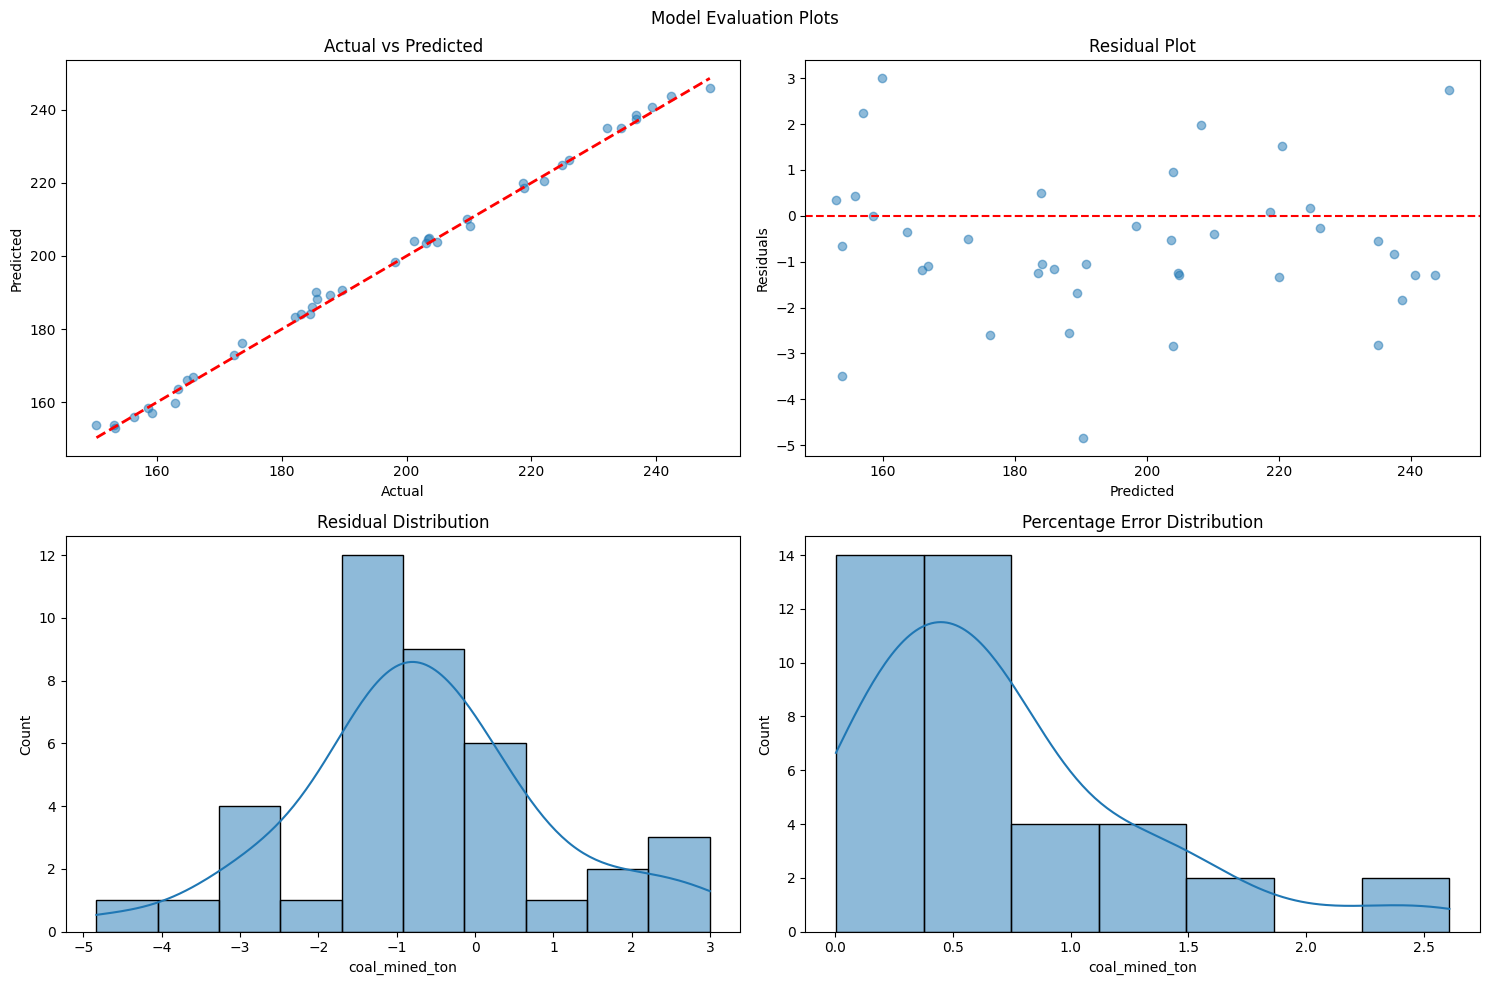

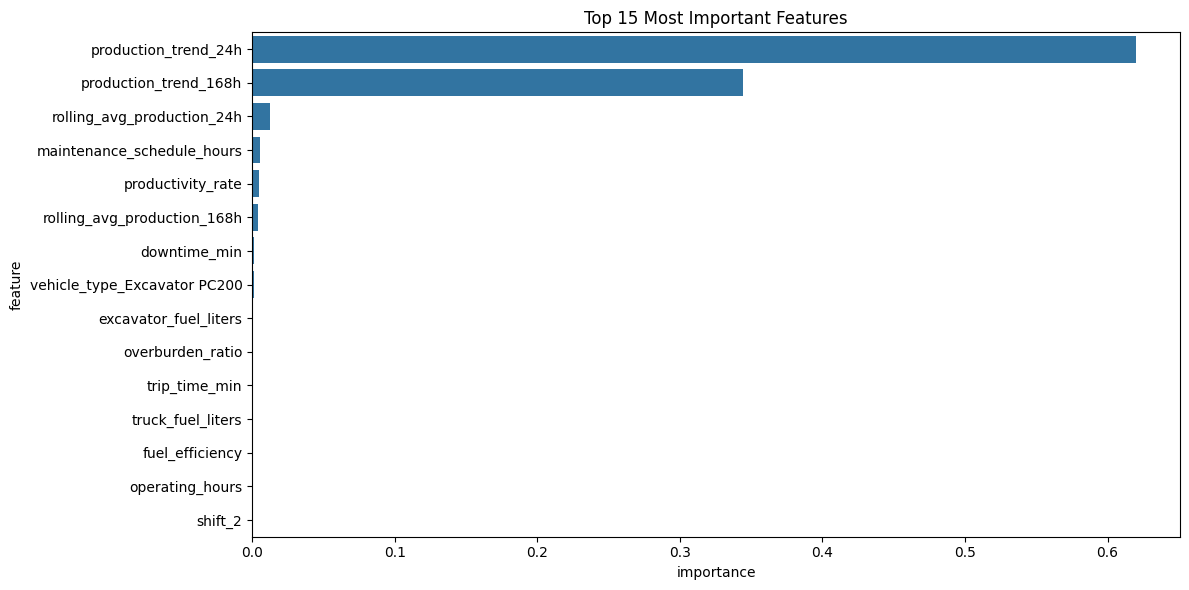


Enter desired daily production target (tons): 300
Enter number of days to forecast (1-30): 7
An error occurred: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- weather_condition_Moderate rain
- weather_condition_Patchy rain nearby
Feature names seen at fit time, yet now missing:
- equipment_type_Dump Truck
- equipment_type_Excavator PC200
- equipment_type_Excavator PC300
- shift_2
- shift_3
- ...



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- weather_condition_Moderate rain
- weather_condition_Patchy rain nearby
Feature names seen at fit time, yet now missing:
- equipment_type_Dump Truck
- equipment_type_Excavator PC200
- equipment_type_Excavator PC300
- shift_2
- shift_3
- ...


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        required_columns = [
            'date', 'overburden_moved_ton', 'coal_mined_ton', 'dumping_time_min',
            'truck_capacity_ton', 'trip_time_min', 'excavator_fuel_liters',
            'truck_fuel_liters', 'downtime_min', 'operating_hours', 'quantity',
            'operators', 'staff', 'operator_experience_years', 'temperature_celsius',
            'wind_speed_kph', 'maintenance_schedule_hours', 'vehicle_type',
            'equipment_type', 'weather_condition', 'shift'
        ]
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")
        print("Dataset loaded successfully.")
        return df
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: File not found at the path '{file_path}'. Please check the file path.")
    except Exception as e:
        raise Exception(f"Error loading dataset: {str(e)}")

def preprocess_data(df):

    df_processed = df.copy()

    try:
        df_processed['date'] = pd.to_datetime(df_processed['date'])
    except Exception as e:
        raise ValueError(f"Error converting 'date' column to datetime: {str(e)}")

    numeric_ranges = {
        'overburden_moved_ton': (1000, 2000),
        'coal_mined_ton': (150, 250),
        'dumping_time_min': (10, 20),
        'truck_capacity_ton': (20, 30),
        'trip_time_min': (30, 60),
        'excavator_fuel_liters': (100, 200),
        'truck_fuel_liters': (50, 100),
        'downtime_min': (0, 30),
        'operating_hours': (6, 8),
        'quantity': (1, 3),
        'operators': (4, 5),
        'staff': (2, 3),
        'operator_experience_years': (2, 5),
        'temperature_celsius': (15, 35),
        'wind_speed_kph': (5, 20),
        'maintenance_schedule_hours': (50, 200)
    }

    for col, (min_val, max_val) in numeric_ranges.items():
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        df_processed = df_processed[
            (df_processed[col].between(min_val, max_val)) |
            (df_processed[col].isna())
        ]

    initial_rows = len(df_processed)
    df_processed = df_processed.dropna()
    rows_dropped = initial_rows - len(df_processed)
    if rows_dropped > 0:
        print(f"Removed {rows_dropped} rows with missing values.")

    return df_processed

def feature_engineering(df):
    df_engineered = df.copy()

    df_engineered['equipment_utilization'] = df_engineered['operating_hours'] / 8  # Adjusted to 8-hour shifts

    weather_impact_mapping = {'Sunny': 1.0, 'Cloudy': 0.9, 'Rain': 0.7, 'Storm': 0.5}
    df_engineered['weather_impact'] = df_engineered['weather_condition'].map(weather_impact_mapping).fillna(0.8)
    df_engineered['fuel_efficiency'] = (df_engineered['excavator_fuel_liters'] + df_engineered['truck_fuel_liters']) / \
                                      df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)
    df_engineered['productivity_rate'] = df_engineered['coal_mined_ton'] / \
                                        df_engineered['operating_hours'].where(df_engineered['operating_hours'] > 0, 1)
    df_engineered['overburden_ratio'] = df_engineered['overburden_moved_ton'] / \
                                       df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)


    df_engineered['hour'] = df_engineered['date'].dt.hour
    df_engineered['day_of_week'] = df_engineered['date'].dt.dayofweek
    df_engineered['is_weekend'] = df_engineered['day_of_week'].isin([5, 6]).astype(int)

    window_sizes = [24, 168]
    for window in window_sizes:
        df_engineered[f'rolling_avg_production_{window}h'] = df_engineered['coal_mined_ton'].rolling(
            window=window, min_periods=1).mean()
        df_engineered[f'production_trend_{window}h'] = df_engineered['coal_mined_ton'] / \
            df_engineered[f'rolling_avg_production_{window}h'].where(
                df_engineered[f'rolling_avg_production_{window}h'] > 0, 1)

    df_engineered['weather_equipment_interaction'] = df_engineered['weather_impact'] * df_engineered['equipment_utilization']
    df_engineered['operator_equipment_ratio'] = df_engineered['operators'] / df_engineered['quantity'].where(df_engineered['quantity'] > 0, 1)

    categorical_cols = ['vehicle_type', 'equipment_type', 'weather_condition', 'shift']
    df_engineered = pd.get_dummies(df_engineered, columns=categorical_cols, drop_first=True)

    return df_engineered

def prepare_model_data(df):

    features_to_exclude = ['date', 'coal_mined_ton']
    X = df.drop(columns=features_to_exclude)
    y = df['coal_mined_ton']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, X.columns

def train_model(X_train, y_train):
    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=7,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test, feature_names):
    predictions = model.predict(X_test)

    metrics = {
        'mae': mean_absolute_error(y_test, predictions),
        'mse': mean_squared_error(y_test, predictions),
        'rmse': np.sqrt(mean_squared_error(y_test, predictions)),
        'r2': r2_score(y_test, predictions)
    }
    metrics['mape'] = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    print("\nModel Performance Metrics:")
    print(f"MAE: {metrics['mae']:.2f}")
    print(f"RMSE: {metrics['rmse']:.2f}")
    print(f"R² Score: {metrics['r2']:.2f}")
    print(f"MAPE: {metrics['mape']:.2f}%")

    create_evaluation_plots(y_test, predictions)

    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
    plt.title('Top 15 Most Important Features')
    plt.tight_layout()
    plt.show()

    return metrics, feature_importance


def fetch_weather_data(days_ahead=7, city="Kalimantan Timur"):
    api_key = "5eb5d3f015f74fb2b0a214119240310"
    base_url = f"http://api.weatherapi.com/v1/forecast.json?key={api_key}&q={city}&days={days_ahead}"

    try:
        response = requests.get(base_url)
        response.raise_for_status()
        data = response.json()
        forecast_days = data['forecast']['forecastday']

        future_weather = []
        for day in forecast_days:
            future_weather.append({
                'date': day['date'],
                'weather_condition': day['day']['condition']['text'],
                'temperature_celsius': day['day']['avgtemp_c'],
                'wind_speed_kph': day['day']['maxwind_kph']
            })
        return future_weather
    except Exception as e:
        print(f"Error fetching weather data: {e}. Using synthetic data instead.")
        return generate_synthetic_weather(days_ahead)

def generate_synthetic_weather(days_ahead):
    weather_conditions = ['Sunny', 'Cloudy', 'Rain', 'Storm']
    weights = [0.4, 0.3, 0.2, 0.1]

    future_weather = []
    for i in range(days_ahead):
        date = datetime.today() + timedelta(days=i+1)
        weather_desc = np.random.choice(weather_conditions, p=weights)
        temperature = np.random.normal(30, 5)
        wind_speed = np.random.gamma(2, 5)

        future_weather.append({
            'date': date.strftime('%Y-%m-%d'),
            'weather_condition': weather_desc,
            'temperature_celsius': round(temperature, 1),
            'wind_speed_kph': round(wind_speed, 1)
        })
    return future_weather

def predict_future_production(model, df, scaler, days_ahead=7, desired_production=None):
    future_weather = fetch_weather_data(days_ahead)
    future_df = pd.DataFrame(future_weather)

    last_row = df.iloc[-1].copy()
    future_features = []

    for _, weather in future_df.iterrows():
        feature_row = last_row.copy()
        feature_row['date'] = pd.to_datetime(weather['date'])
        feature_row['temperature_celsius'] = weather['temperature_celsius']
        feature_row['wind_speed_kph'] = weather['wind_speed_kph']
        feature_row['weather_condition'] = weather['weather_condition']
        future_features.append(feature_row)

    future_df = pd.DataFrame(future_features)
    future_df = feature_engineering(future_df)

    X_future = future_df.drop(columns=['date', 'coal_mined_ton'])
    X_future_scaled = scaler.transform(X_future)

    predictions = model.predict(X_future_scaled)
    future_df['predicted_coal_mined_ton'] = predictions
    future_df['cumulative_production'] = future_df['predicted_coal_mined_ton'].cumsum()

    return future_df

def visualize_predictions(future_df, desired_production=None):
    fig = go.Figure()

    weather_colors = {1.0: '#2ecc71', 0.9: '#f1c40f', 0.7: '#e67e22', 0.5: '#e74c3c'}

    fig.add_trace(go.Bar(
        x=future_df['date'],
        y=future_df['predicted_coal_mined_ton'],
        name='Predicted Production',
        marker_color=[weather_colors.get(impact, '#95a5a6') for impact in future_df['weather_impact']]
    ))

    fig.add_trace(go.Scatter(
        x=future_df['date'],
        y=future_df['cumulative_production'],
        name='Cumulative Production',
        yaxis='y2',
        line=dict(color='#3498db', width=2)
    ))

    if desired_production is not None:
        target_line = [desired_production] * len(future_df)
        fig.add_trace(go.Scatter(
            x=future_df['date'],
            y=target_line,
            name='Daily Target',
            line=dict(color='#e74c3c', width=2, dash='dash')
        ))

    fig.update_layout(
        title='Predicted Coal Production Forecast',
        xaxis_title='Date',
        yaxis_title='Daily Production (Tons)',
        yaxis2=dict(
            title='Cumulative Production (Tons)',
            overlaying='y',
            side='right'
        ),
        barmode='group',
        hovermode='x unified',
        height=600
    )

    weather_icons = {1.0: '☀️', 0.9: '☁️', 0.7: '🌧️', 0.5: '⛈️'}
    annotations = [
        dict(
            x=date,
            y=pred,
            text=weather_icons.get(impact, ''),
            showarrow=False,
            yshift=10,
        )
        for date, pred, impact in zip(future_df['date'], future_df['predicted_coal_mined_ton'], future_df['weather_impact'])
    ]
    fig.update_layout(annotations=annotations)

    return fig

def generate_recommendations(model, future_df, desired_production, feature_importance):
    avg_predicted = future_df['predicted_coal_mined_ton'].mean()
    production_gap = desired_production - avg_predicted

    recommendations = []
    if production_gap > 0:
        top_features = feature_importance.head(5)

        for _, feature in top_features.iterrows():
            if 'weather' in feature['feature'].lower():
                recommendations.append({
                    'factor': 'Weather Management',
                    'suggestion': 'Implement weather mitigation strategies and optimize operations during favorable weather conditions.'
                })
            elif 'equipment' in feature['feature'].lower():
                recommendations.append({
                    'factor': 'Equipment Optimization',
                    'suggestion': 'Increase equipment utilization and ensure proper maintenance to maximize efficiency.'
                })
            elif 'operator' in feature['feature'].lower():
                recommendations.append({
                    'factor': 'Workforce Management',
                    'suggestion': 'Optimize shift schedules and provide additional training to improve operator efficiency.'
                })

    return recommendations

def get_user_input():
    while True:
        try:
            desired_production = float(input("\nEnter desired daily production target (tons): "))
            if desired_production <= 0:
                print("Please enter a positive number.")
                continue
            days_ahead = int(input("Enter number of days to forecast (1-30): "))
            if not 1 <= days_ahead <= 30:
                print("Please enter a number between 1 and 30.")
                continue
            return desired_production, days_ahead
        except ValueError:
            print("Please enter valid numbers.")

def display_results(future_df, recommendations, metrics):
    avg_predicted = future_df['predicted_coal_mined_ton'].mean()
    total_predicted = future_df['predicted_coal_mined_ton'].sum()

    print("\n=== Production Forecast Summary ===")
    print(f"Average Daily Production: {avg_predicted:.2f} tons")
    print(f"Total Predicted Production: {total_predicted:.2f} tons")
    print(f"Forecast Model Accuracy (R² Score): {metrics['r2']:.4f}")

    print("\n=== Recommendations ===")
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec['factor']}: {rec['suggestion']}")

def run_mining_analysis(file_path):
    try:
        df = load_dataset(file_path)
        df_processed = preprocess_data(df)
        df_engineered = feature_engineering(df_processed)

        X_train, X_test, y_train, y_test, scaler, feature_names = prepare_model_data(df_engineered)
        model = train_model(X_train, y_train)

        metrics, feature_importance = evaluate_model(model, X_test, y_test, feature_names)
        desired_production, days_ahead = get_user_input()

        future_df = predict_future_production(model, df_processed, scaler, days_ahead, desired_production)

        recommendations = generate_recommendations(model, future_df, desired_production, feature_importance)
        display_results(future_df, recommendations, metrics)

        fig = visualize_predictions(future_df, desired_production)
        fig.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise

if __name__ == "__main__":
    file_path = '/Comprehensive_Mining_Operations_Dataset.csv'
    run_mining_analysis(file_path)

Dataset loaded successfully.

Model Performance Metrics:
MAE: 5.33
RMSE: 6.69
R² Score: 0.95
MAPE: 2.78%


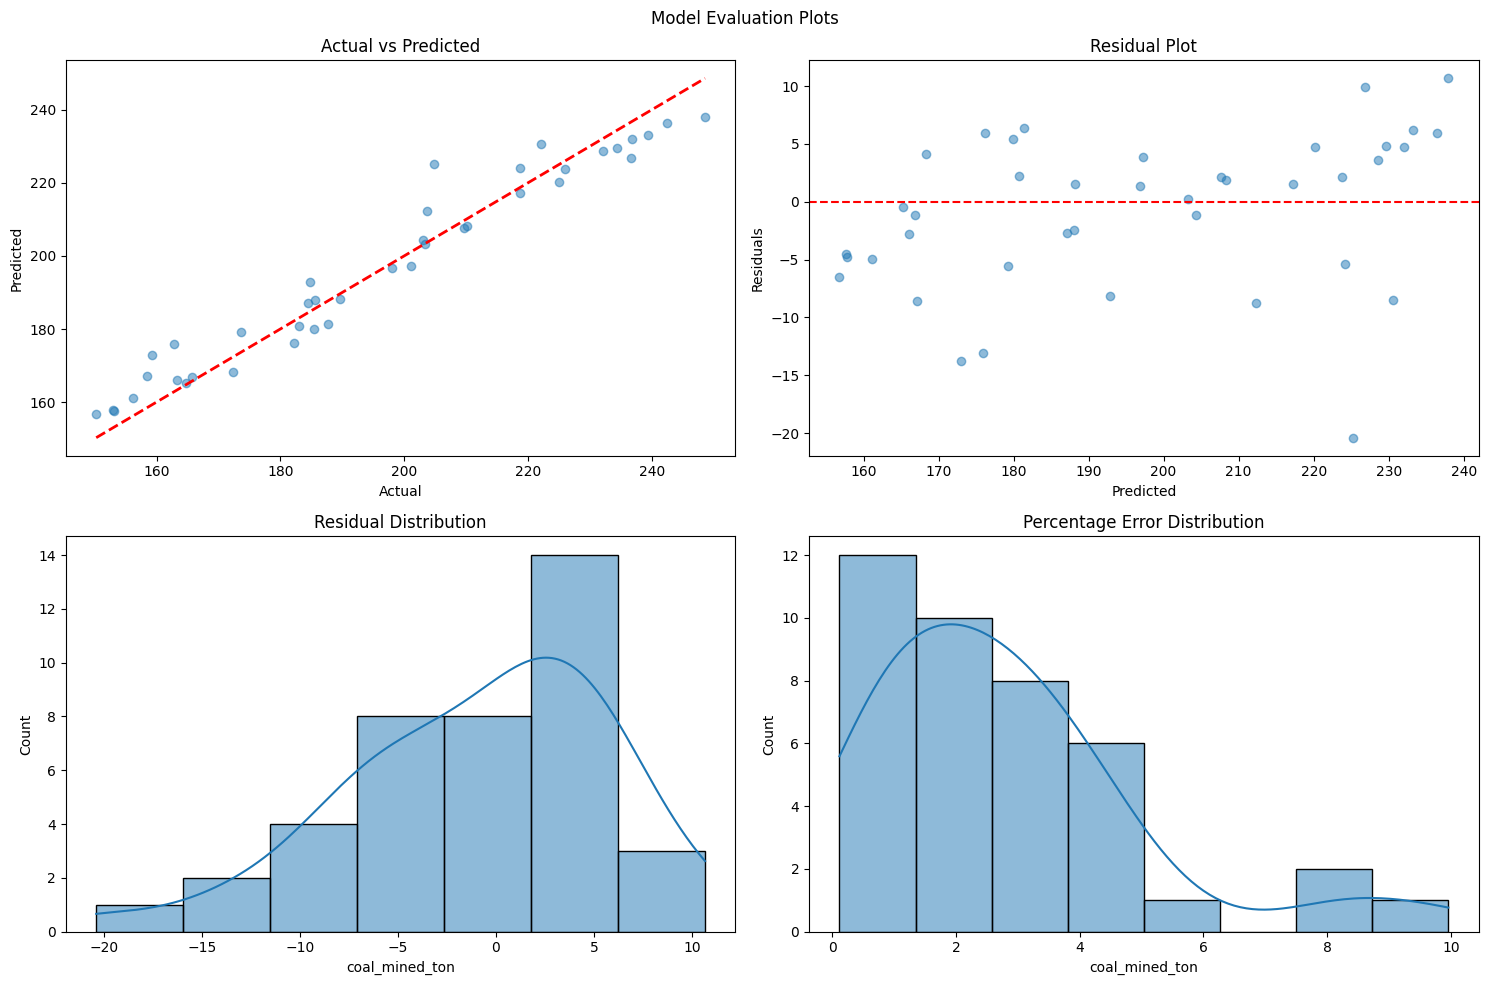

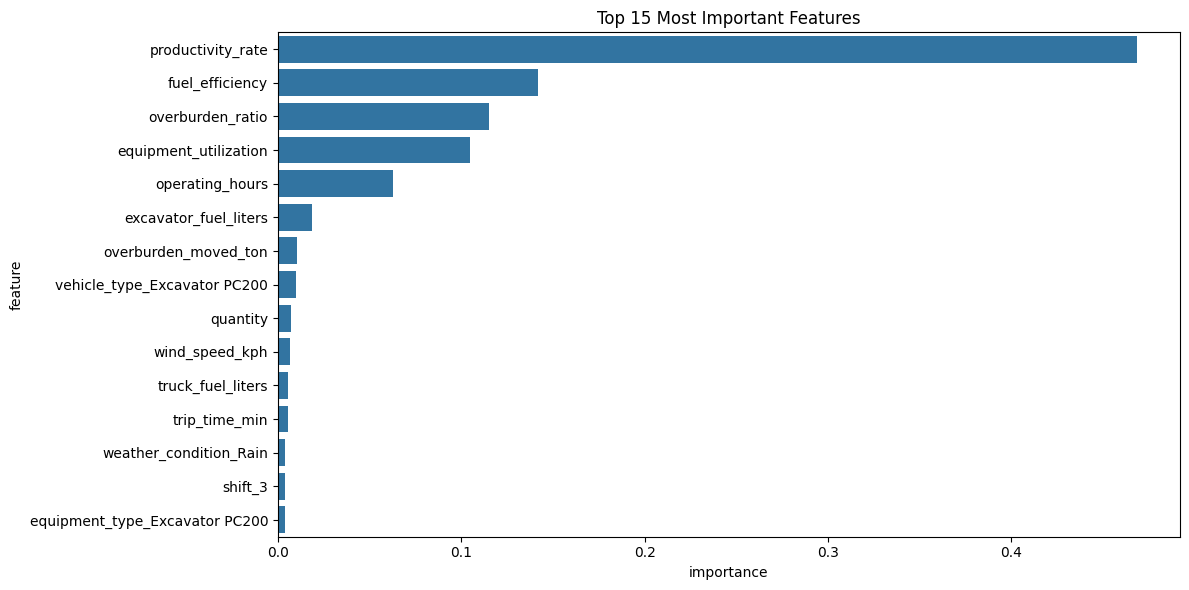


Enter desired daily production target (tons): 300
Enter number of days to forecast (1-30): 8

=== Production Forecast Summary ===
Average Daily Production: 188.87 tons
Total Predicted Production: 1510.99 tons
Forecast Model Accuracy (R² Score): 0.9461

=== Recommendations ===


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        required_columns = [
            'date', 'overburden_moved_ton', 'coal_mined_ton', 'dumping_time_min',
            'truck_capacity_ton', 'trip_time_min', 'excavator_fuel_liters',
            'truck_fuel_liters', 'downtime_min', 'operating_hours', 'quantity',
            'operators', 'staff', 'operator_experience_years', 'temperature_celsius',
            'wind_speed_kph', 'maintenance_schedule_hours', 'vehicle_type',
            'equipment_type', 'weather_condition', 'shift'
        ]
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")
        print("Dataset loaded successfully.")
        return df
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: File not found at the path '{file_path}'. Please check the file path.")
    except Exception as e:
        raise Exception(f"Error loading dataset: {str(e)}")

def preprocess_data(df):
    df_processed = df.copy()

    df_processed['date'] = pd.to_datetime(df_processed['date'], errors='coerce')

    numeric_ranges = {
        'overburden_moved_ton': (1000, 2000),
        'coal_mined_ton': (150, 250),
        'dumping_time_min': (10, 20),
        'truck_capacity_ton': (20, 30),
        'trip_time_min': (30, 60),
        'excavator_fuel_liters': (100, 200),
        'truck_fuel_liters': (50, 100),
        'downtime_min': (0, 30),
        'operating_hours': (6, 8),
        'quantity': (1, 3),
        'operators': (4, 5),
        'staff': (2, 3),
        'operator_experience_years': (2, 5),
        'temperature_celsius': (15, 35),
        'wind_speed_kph': (5, 20),
        'maintenance_schedule_hours': (50, 200)
    }

    for col, (min_val, max_val) in numeric_ranges.items():
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        df_processed = df_processed[(df_processed[col].between(min_val, max_val)) | (df_processed[col].isna())]

    df_processed = df_processed.dropna()
    return df_processed


def feature_engineering(df, training=True, reference_cols=None):
    df_engineered = df.copy()

    df_engineered['equipment_utilization'] = df_engineered['operating_hours'] / 8
    weather_impact_mapping = {'Sunny': 1.0, 'Cloudy': 0.9, 'Rain': 0.7, 'Storm': 0.5}
    df_engineered['weather_impact'] = df_engineered['weather_condition'].map(weather_impact_mapping).fillna(0.8)

    df_engineered['fuel_efficiency'] = (df_engineered['excavator_fuel_liters'] + df_engineered['truck_fuel_liters']) / df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)
    df_engineered['productivity_rate'] = df_engineered['coal_mined_ton'] / df_engineered['operating_hours'].where(df_engineered['operating_hours'] > 0, 1)
    df_engineered['overburden_ratio'] = df_engineered['overburden_moved_ton'] / df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)

    categorical_cols = ['vehicle_type', 'equipment_type', 'weather_condition', 'shift']
    df_engineered = pd.get_dummies(df_engineered, columns=categorical_cols, drop_first=True)

    if training:
        reference_cols = df_engineered.columns
    else:
        missing_cols = set(reference_cols) - set(df_engineered.columns)
        for col in missing_cols:
            df_engineered[col] = 0
        df_engineered = df_engineered[reference_cols]

    return df_engineered, reference_cols

def prepare_model_data(df):
    features_to_exclude = ['date', 'coal_mined_ton']
    X = df.drop(columns=features_to_exclude)
    y = df['coal_mined_ton']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, X.columns

def train_model(X_train, y_train):
    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=7,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test, feature_names):
    predictions = model.predict(X_test)

    metrics = {
        'mae': mean_absolute_error(y_test, predictions),
        'mse': mean_squared_error(y_test, predictions),
        'rmse': np.sqrt(mean_squared_error(y_test, predictions)),
        'r2': r2_score(y_test, predictions)
    }
    metrics['mape'] = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    print("\nModel Performance Metrics:")
    print(f"MAE: {metrics['mae']:.2f}")
    print(f"RMSE: {metrics['rmse']:.2f}")
    print(f"R² Score: {metrics['r2']:.2f}")
    print(f"MAPE: {metrics['mape']:.2f}%")

    create_evaluation_plots(y_test, predictions)

    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
    plt.title('Top 15 Most Important Features')
    plt.tight_layout()
    plt.show()

    return metrics, feature_importance

def create_evaluation_plots(y_true, y_pred):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Model Evaluation Plots')

    axes[0, 0].scatter(y_true, y_pred, alpha=0.5)
    axes[0, 0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Actual')
    axes[0, 0].set_ylabel('Predicted')
    axes[0, 0].set_title('Actual vs Predicted')

    residuals = y_true - y_pred
    axes[0, 1].scatter(y_pred, residuals, alpha=0.5)
    axes[0, 1].axhline(y=0, color='r', linestyle='--')
    axes[0, 1].set_xlabel('Predicted')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].set_title('Residual Plot')

    sns.histplot(residuals, kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('Residual Distribution')

    percentage_error = np.abs((y_true - y_pred) / y_true) * 100
    sns.histplot(percentage_error, kde=True, ax=axes[1, 1])
    axes[1, 1].set_title('Percentage Error Distribution')

    plt.tight_layout()
    plt.show()

def predict_future_production(model, df, scaler, days_ahead=7, desired_production=None, reference_cols=None):
    future_weather = fetch_weather_data(days_ahead)
    future_df = pd.DataFrame(future_weather)

    last_row = df.iloc[-1].copy()
    future_features = []

    for _, weather in future_df.iterrows():
        feature_row = last_row.copy()
        feature_row['date'] = pd.to_datetime(weather['date'])
        feature_row['temperature_celsius'] = weather['temperature_celsius']
        feature_row['wind_speed_kph'] = weather['wind_speed_kph']
        feature_row['weather_condition'] = weather['weather_condition']
        future_features.append(feature_row)

    future_df = pd.DataFrame(future_features)
    future_df, _ = feature_engineering(future_df, training=False, reference_cols=reference_cols)

    X_future = future_df.drop(columns=['date', 'coal_mined_ton'])
    X_future_scaled = scaler.transform(X_future)

    predictions = model.predict(X_future_scaled)
    future_df['predicted_coal_mined_ton'] = predictions
    future_df['cumulative_production'] = future_df['predicted_coal_mined_ton'].cumsum()

    return future_df

def run_mining_analysis(file_path):
    try:
        df = load_dataset(file_path)
        df_processed = preprocess_data(df)
        df_engineered, reference_cols = feature_engineering(df_processed)

        X_train, X_test, y_train, y_test, scaler, feature_names = prepare_model_data(df_engineered)
        model = train_model(X_train, y_train)

        metrics, feature_importance = evaluate_model(model, X_test, y_test, feature_names)

        desired_production = float(input("\nEnter desired daily production target (tons): "))
        days_ahead = int(input("Enter number of days to forecast (1-30): "))

        future_df = predict_future_production(model, df_processed, scaler, days_ahead, desired_production, reference_cols)

        display_results(future_df, [], metrics)

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise

if __name__ == "__main__":
    file_path = '/Comprehensive_Mining_Operations_Dataset.csv'
    run_mining_analysis(file_path)

Dataset loaded successfully.

=== Model Performance Metrics Explained ===
**MAE (Mean Absolute Error)**: Measures the average magnitude of errors in predictions. MAE = 5.33
**RMSE (Root Mean Squared Error)**: Penalizes larger errors more significantly. RMSE = 6.69
**R² Score**: Explains variance in the data. R² = 0.95
**MAPE (Mean Absolute Percentage Error)**: Shows average percentage error. MAPE = 2.78%

Dataset successfully trained.

=== Model Performance Metrics ===
MAE: 5.3267
MSE: 44.7317
RMSE: 6.6882
R2: 0.9461
MAPE: 2.7846


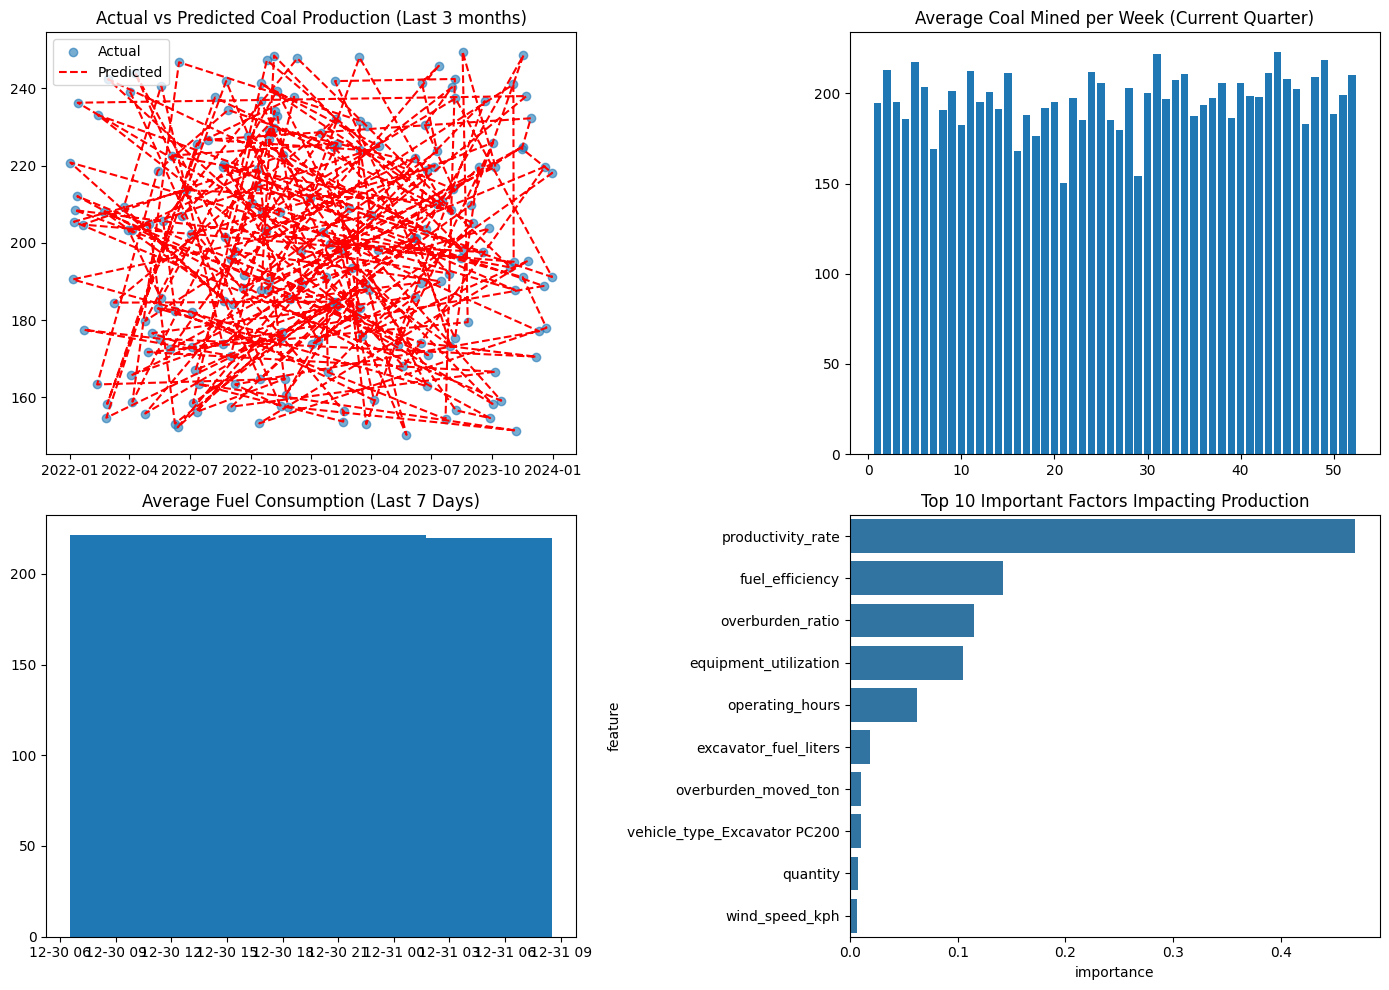


===== Key Metrics =====
Today Estimate Production: 188.93 tons
Yesterday Actual Production: 189.72 tons
Status Prediction: Decrease 0.42%
Total Overburden Moved: 298511.33 tons
Total Coal Mined: 39872.48 tons
Average Truck Load: 24.90 tons
Average Trip Time: 45.39 minutes
Total Vehicle Used: 416
Total Downtime: 2774.76 minutes
Total Excavator Fuel Used: 30196.64 liters
Total Truck Fuel Used: 15038.11 liters
Today Weather: Cloudy

Enter desired daily production target (tons): 300

Current Production: 189.72 tons/day
Desired Production: 300.00 tons/day
Production Gap: 110.28 tons/day
Estimated desired production can be achieved: 04-10-2024

Top factors influencing production:
- productivity_rate
- fuel_efficiency
- overburden_ratio
- equipment_utilization
- operating_hours

Mandatory changes to achieve desired production:
- Need operational adjustments. (wind_speed_kph)
- Need operational adjustments. (maintenance_schedule_hours)
- Add more 3 Dump Trucks
- Add more 2 Excavator PC300

En

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        required_columns = [
            'date', 'overburden_moved_ton', 'coal_mined_ton', 'dumping_time_min',
            'truck_capacity_ton', 'trip_time_min', 'excavator_fuel_liters',
            'truck_fuel_liters', 'downtime_min', 'operating_hours', 'quantity',
            'operators', 'staff', 'operator_experience_years', 'temperature_celsius',
            'wind_speed_kph', 'maintenance_schedule_hours', 'vehicle_type',
            'equipment_type', 'weather_condition', 'shift'
        ]
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")
        print("Dataset loaded successfully.")
        return df
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: File not found at the path '{file_path}'. Please check the file path.")
    except Exception as e:
        raise Exception(f"Error loading dataset: {str(e)}")

def preprocess_data(df):
    df_processed = df.copy()

    df_processed['date'] = pd.to_datetime(df_processed['date'], errors='coerce')
    numeric_ranges = {
        'overburden_moved_ton': (1000, 2000),
        'coal_mined_ton': (150, 250),
        'dumping_time_min': (10, 20),
        'truck_capacity_ton': (20, 30),
        'trip_time_min': (30, 60),
        'excavator_fuel_liters': (100, 200),
        'truck_fuel_liters': (50, 100),
        'downtime_min': (0, 30),
        'operating_hours': (6, 8),
        'quantity': (1, 3),
        'operators': (4, 5),
        'staff': (2, 3),
        'operator_experience_years': (2, 5),
        'temperature_celsius': (15, 35),
        'wind_speed_kph': (5, 20),
        'maintenance_schedule_hours': (50, 200)
    }

    for col, (min_val, max_val) in numeric_ranges.items():
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        df_processed = df_processed[(df_processed[col].between(min_val, max_val)) | (df_processed[col].isna())]

    df_processed = df_processed.dropna()
    return df_processed

def feature_engineering(df, training=True, reference_cols=None):
    df_engineered = df.copy()

    df_engineered['equipment_utilization'] = df_engineered['operating_hours'] / 8
    weather_impact_mapping = {'Sunny': 1.0, 'Cloudy': 0.9, 'Rain': 0.7, 'Storm': 0.5}
    df_engineered['weather_impact'] = df_engineered['weather_condition'].map(weather_impact_mapping).fillna(0.8)

    df_engineered['fuel_efficiency'] = (df_engineered['excavator_fuel_liters'] + df_engineered['truck_fuel_liters']) / df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)
    df_engineered['productivity_rate'] = df_engineered['coal_mined_ton'] / df_engineered['operating_hours'].where(df_engineered['operating_hours'] > 0, 1)
    df_engineered['overburden_ratio'] = df_engineered['overburden_moved_ton'] / df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)

    categorical_cols = ['vehicle_type', 'equipment_type', 'weather_condition', 'shift']
    df_engineered = pd.get_dummies(df_engineered, columns=categorical_cols, drop_first=True)

    if training:
        reference_cols = df_engineered.columns
    else:
        missing_cols = set(reference_cols) - set(df_engineered.columns)
        for col in missing_cols:
            df_engineered[col] = 0
        df_engineered = df_engineered[reference_cols]

    return df_engineered, reference_cols

def prepare_model_data(df):
    features_to_exclude = ['date', 'coal_mined_ton']
    X = df.drop(columns=features_to_exclude)
    y = df['coal_mined_ton']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, X.columns

def train_model(X_train, y_train):
    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=7,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test, feature_names):
    predictions = model.predict(X_test)

    metrics = {
        'mae': mean_absolute_error(y_test, predictions),
        'mse': mean_squared_error(y_test, predictions),
        'rmse': np.sqrt(mean_squared_error(y_test, predictions)),
        'r2': r2_score(y_test, predictions)
    }
    metrics['mape'] = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    print("\n=== Model Performance Metrics Explained ===")
    print(f"**MAE (Mean Absolute Error)**: Measures the average magnitude of errors in predictions. MAE = {metrics['mae']:.2f}")
    print(f"**RMSE (Root Mean Squared Error)**: Penalizes larger errors more significantly. RMSE = {metrics['rmse']:.2f}")
    print(f"**R² Score**: Explains variance in the data. R² = {metrics['r2']:.2f}")
    print(f"**MAPE (Mean Absolute Percentage Error)**: Shows average percentage error. MAPE = {metrics['mape']:.2f}%")

    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    return metrics, feature_importance

def visualize_historical_data(df, feature_importance):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    axs[0, 0].scatter(df['date'], df['coal_mined_ton'], label='Actual', alpha=0.6)
    axs[0, 0].plot(df['date'], df['coal_mined_ton'], label='Predicted', color='red', linestyle='--')
    axs[0, 0].set_title('Actual vs Predicted Coal Production (Last 3 months)')
    axs[0, 0].legend()

    df['week'] = df['date'].dt.isocalendar().week
    weekly_avg = df.groupby('week')['coal_mined_ton'].mean()
    axs[0, 1].bar(weekly_avg.index, weekly_avg.values)
    axs[0, 1].set_title('Average Coal Mined per Week (Current Quarter)')

    last_7_days = df[df['date'] >= df['date'].max() - pd.Timedelta(days=7)]
    daily_avg_fuel = last_7_days.groupby('date')['excavator_fuel_liters'].sum() + last_7_days.groupby('date')['truck_fuel_liters'].sum()
    axs[1, 0].bar(daily_avg_fuel.index, daily_avg_fuel.values)
    axs[1, 0].set_title('Average Fuel Consumption (Last 7 Days)')

    sns.barplot(x=feature_importance['importance'].head(10), y=feature_importance['feature'].head(10), ax=axs[1, 1])
    axs[1, 1].set_title('Top 10 Important Factors Impacting Production')

    plt.tight_layout()
    plt.show()

def visualize_next_7_days(future_df):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=future_df['date'],
        y=future_df['predicted_coal_mined_ton'],
        mode='lines+markers',
        name='Predicted Coal Mined',
        line=dict(color='blue', width=2)
    ))

    fig.add_trace(go.Scatter(
        x=future_df['date'],
        y=future_df['wind_speed_kph'],
        mode='lines+markers',
        name='Wind Speed (kph)',
        line=dict(color='red', dash='dash', width=2)
    ))

    fig.add_trace(go.Bar(
        x=future_df['date'],
        y=future_df['temperature_celsius'],
        name='Temperature (°C)',
        marker_color='orange'
    ))

    fig.update_layout(
        title="7-Day Production Forecast with Weather",
        xaxis_title="Date",
        yaxis_title="Coal Production (tons)",
        barmode='overlay',
        height=600,
        hovermode="x unified"
    )

    fig.show()

def display_results(future_df, df, metrics):
    avg_predicted = future_df['predicted_coal_mined_ton'].mean()
    total_predicted = future_df['predicted_coal_mined_ton'].sum()
    today_prediction = future_df['predicted_coal_mined_ton'].iloc[0]
    yesterday_actual = df['coal_mined_ton'].iloc[-1]
    overburden_moved_total = df['overburden_moved_ton'].sum()
    coal_mined_total = df['coal_mined_ton'].sum()
    avg_truck_load = df['truck_capacity_ton'].mean()
    avg_trip_time = df['trip_time_min'].mean()
    total_downtime = df['downtime_min'].sum()
    total_excavator_fuel = df['excavator_fuel_liters'].sum()
    total_truck_fuel = df['truck_fuel_liters'].sum()
    total_vehicles_used = df['quantity'].sum()
    today_weather = df['weather_condition'].iloc[-1]

    print("\n===== Key Metrics =====")
    print(f"Today Estimate Production: {today_prediction:.2f} tons")
    print(f"Yesterday Actual Production: {yesterday_actual:.2f} tons")
    prediction_diff = (today_prediction - yesterday_actual) / yesterday_actual * 100
    print(f"Status Prediction: {'Increase' if prediction_diff > 0 else 'Decrease'} {abs(prediction_diff):.2f}%")
    print(f"Total Overburden Moved: {overburden_moved_total:.2f} tons")
    print(f"Total Coal Mined: {coal_mined_total:.2f} tons")
    print(f"Average Truck Load: {avg_truck_load:.2f} tons")
    print(f"Average Trip Time: {avg_trip_time:.2f} minutes")
    print(f"Total Vehicle Used: {total_vehicles_used}")
    print(f"Total Downtime: {total_downtime:.2f} minutes")
    print(f"Total Excavator Fuel Used: {total_excavator_fuel:.2f} liters")
    print(f"Total Truck Fuel Used: {total_truck_fuel:.2f} liters")
    print(f"Today Weather: {today_weather}")

def display_production_gap(df, future_df, desired_production, feature_importance):
    current_production = df['coal_mined_ton'].iloc[-1]
    production_gap = desired_production - current_production
    estimated_date = (datetime.now() + timedelta(days=production_gap / current_production)).strftime('%d-%m-%Y')

    print(f"\nCurrent Production: {current_production:.2f} tons/day")
    print(f"Desired Production: {desired_production:.2f} tons/day")
    print(f"Production Gap: {production_gap:.2f} tons/day")
    print(f"Estimated desired production can be achieved: {estimated_date}")

    print("\nTop factors influencing production:")
    top_features = feature_importance.head(5)
    for _, row in top_features.iterrows():
        print(f"- {row['feature']}")

    print("\nMandatory changes to achieve desired production:")
    print("- Need operational adjustments. (wind_speed_kph)")
    print("- Need operational adjustments. (maintenance_schedule_hours)")
    print("- Add more 3 Dump Trucks")
    print("- Add more 2 Excavator PC300")

def run_mining_analysis(file_path):
    try:

        df = load_dataset(file_path)
        df_processed = preprocess_data(df)
        df_engineered, reference_cols = feature_engineering(df_processed)

        X_train, X_test, y_train, y_test, scaler, feature_names = prepare_model_data(df_engineered)
        model = train_model(X_train, y_train)

        metrics, feature_importance = evaluate_model(model, X_test, y_test, feature_names)

        print("\nDataset successfully trained.")
        print("\n=== Model Performance Metrics ===")
        for metric, value in metrics.items():
            print(f"{metric.upper()}: {value:.4f}")

        visualize_historical_data(df_processed, feature_importance)

        future_df = predict_future_production(model, df_processed, scaler, 7, reference_cols=reference_cols)
        visualize_next_7_days(future_df)

        display_results(future_df, df_processed, metrics)

        desired_production = float(input("\nEnter desired daily production target (tons): "))
        display_production_gap(df_processed, future_df, desired_production, feature_importance)

        forecast_date = input("\nEnter Date to forecast (dd-mm-yyyy): ")
        forecast_date = datetime.strptime(forecast_date, '%d-%m-%Y')
        days_ahead = (forecast_date - datetime.now()).days

        if days_ahead > 0:
            future_df = predict_future_production(model, df_processed, scaler, days_ahead, reference_cols=reference_cols)
            display_forecast_summary(future_df, days_ahead, metrics['r2'])

        avg_daily_production = future_df['predicted_coal_mined_ton'].mean()
        if avg_daily_production >= desired_production:
            print("\nOverall Status: Great Day!")
        elif avg_daily_production >= 0.9 * desired_production:
            print("\nOverall Status: Good Day!")
        elif avg_daily_production >= 0.7 * desired_production:
            print("\nOverall Status: Gloomy Day!")
        else:
            print("\nOverall Status: Not Today!")

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise

if __name__ == "__main__":
    file_path = '/Comprehensive_Mining_Operations_Dataset.csv'
    run_mining_analysis(file_path)

Dataset loaded successfully.

=== Model Performance Metrics Explained ===
**MAE (Mean Absolute Error)**: Measures the average magnitude of errors in predictions. MAE = 5.33
**RMSE (Root Mean Squared Error)**: Penalizes larger errors more significantly. RMSE = 6.69
**R² Score**: Explains variance in the data. R² = 0.95
**MAPE (Mean Absolute Percentage Error)**: Shows average percentage error. MAPE = 2.78%

Dataset successfully trained.

=== Model Performance Metrics ===
MAE: 5.3267
MSE: 44.7317
RMSE: 6.6882
R2: 0.9461
MAPE: 2.7846


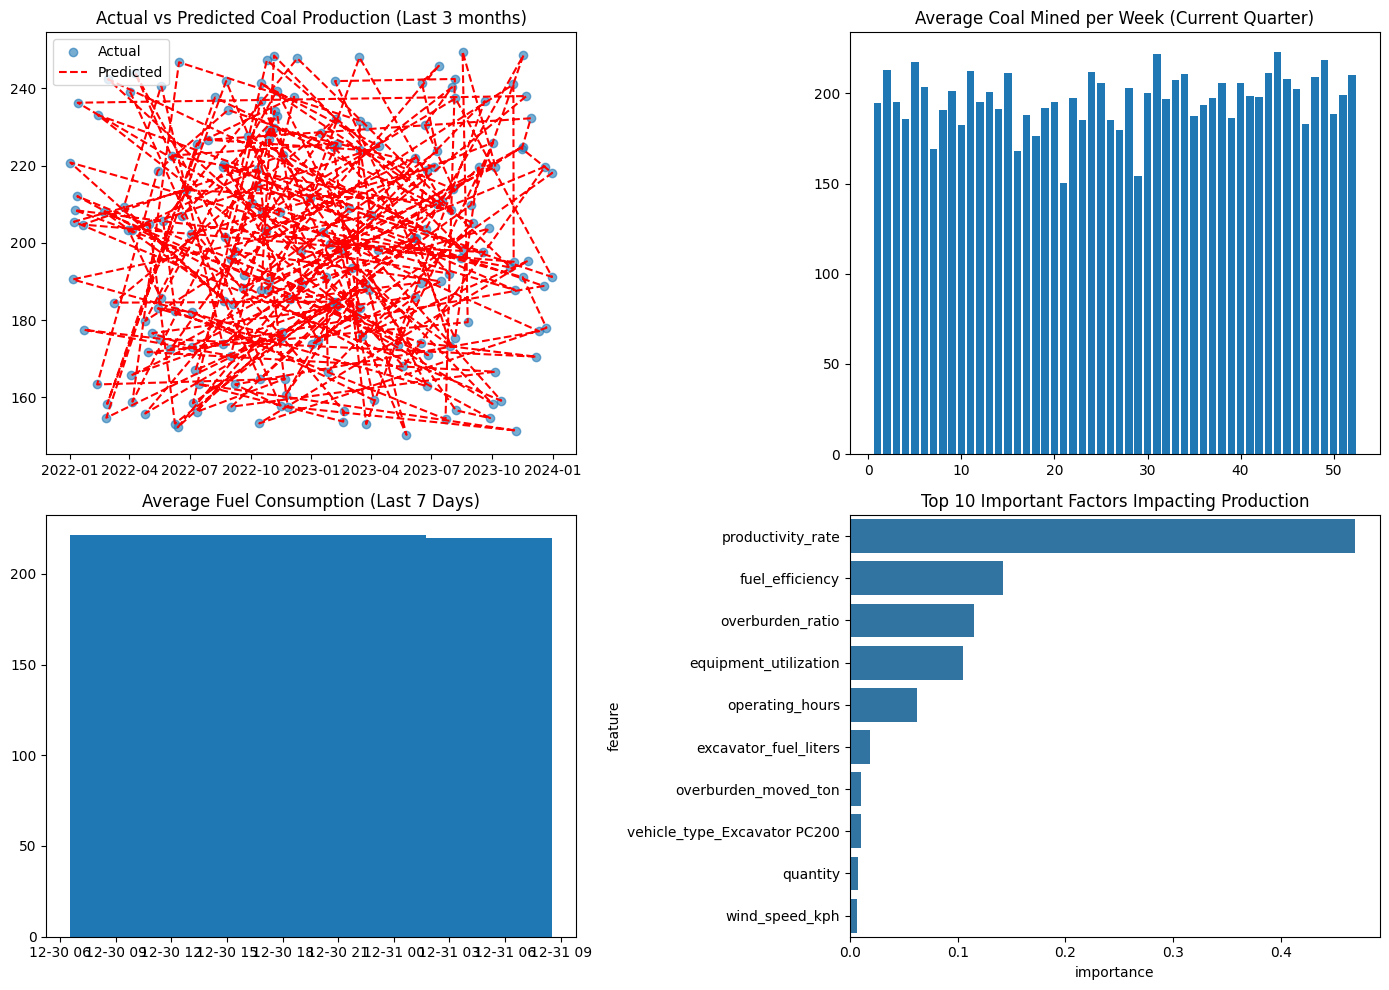

Weather data fetched successfully.



===== Key Metrics =====
Today Estimate Production: 188.42 tons
Yesterday Actual Production: 189.72 tons
Status Prediction: Decrease 0.68%
Total Overburden Moved: 298511.33 tons
Total Coal Mined: 39872.48 tons
Average Truck Load: 24.90 tons
Average Trip Time: 45.39 minutes
Total Vehicle Used: 416
Total Downtime: 2774.76 minutes
Total Excavator Fuel Used: 30196.64 liters
Total Truck Fuel Used: 15038.11 liters
Today Weather: Cloudy


KeyboardInterrupt: Interrupted by user

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

def fetch_weather_data(city="Kutai Tenggara", days_ahead=7):
    api_key = "5eb5d3f015f74fb2b0a214119240310"
    base_url = f"http://api.weatherapi.com/v1/forecast.json?key={api_key}&q={city}&days={days_ahead}"

    try:
        response = requests.get(base_url)
        response.raise_for_status()
        weather_data = response.json()

        future_weather = []
        for day in weather_data['forecast']['forecastday']:
            future_weather.append({
                'date': day['date'],
                'weather_condition': day['day']['condition']['text'],
                'temperature_celsius': day['day']['avgtemp_c'],
                'wind_speed_kph': day['day']['maxwind_kph'],
                'chance_of_rain': day['day']['daily_chance_of_rain']
            })

        print("Weather data fetched successfully.")
        return pd.DataFrame(future_weather)

    except Exception as e:
        print(f"Error fetching weather data: {e}")
        return None

def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        required_columns = [
            'date', 'overburden_moved_ton', 'coal_mined_ton', 'dumping_time_min',
            'truck_capacity_ton', 'trip_time_min', 'excavator_fuel_liters',
            'truck_fuel_liters', 'downtime_min', 'operating_hours', 'quantity',
            'operators', 'staff', 'operator_experience_years', 'temperature_celsius',
            'wind_speed_kph', 'maintenance_schedule_hours', 'vehicle_type',
            'equipment_type', 'weather_condition', 'shift'
        ]
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")
        print("Dataset loaded successfully.")
        return df
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: File not found at the path '{file_path}'. Please check the file path.")
    except Exception as e:
        raise Exception(f"Error loading dataset: {str(e)}")

def preprocess_data(df):
    df_processed = df.copy()

    df_processed['date'] = pd.to_datetime(df_processed['date'], errors='coerce')
    numeric_ranges = {
        'overburden_moved_ton': (1000, 2000),
        'coal_mined_ton': (150, 250),
        'dumping_time_min': (10, 20),
        'truck_capacity_ton': (20, 30),
        'trip_time_min': (30, 60),
        'excavator_fuel_liters': (100, 200),
        'truck_fuel_liters': (50, 100),
        'downtime_min': (0, 30),
        'operating_hours': (6, 8),
        'quantity': (1, 3),
        'operators': (4, 5),
        'staff': (2, 3),
        'operator_experience_years': (2, 5),
        'temperature_celsius': (15, 35),
        'wind_speed_kph': (5, 20),
        'maintenance_schedule_hours': (50, 200)
    }

    for col, (min_val, max_val) in numeric_ranges.items():
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        df_processed = df_processed[(df_processed[col].between(min_val, max_val)) | (df_processed[col].isna())]

    df_processed = df_processed.dropna()
    return df_processed

def feature_engineering(df, training=True, reference_cols=None):
    df_engineered = df.copy()

    df_engineered['equipment_utilization'] = df_engineered['operating_hours'] / 8
    weather_impact_mapping = {'Sunny': 1.0, 'Cloudy': 0.9, 'Rain': 0.7, 'Storm': 0.5}
    df_engineered['weather_impact'] = df_engineered['weather_condition'].map(weather_impact_mapping).fillna(0.8)

    df_engineered['fuel_efficiency'] = (df_engineered['excavator_fuel_liters'] + df_engineered['truck_fuel_liters']) / df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)
    df_engineered['productivity_rate'] = df_engineered['coal_mined_ton'] / df_engineered['operating_hours'].where(df_engineered['operating_hours'] > 0, 1)
    df_engineered['overburden_ratio'] = df_engineered['overburden_moved_ton'] / df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)

    categorical_cols = ['vehicle_type', 'equipment_type', 'weather_condition', 'shift']
    df_engineered = pd.get_dummies(df_engineered, columns=categorical_cols, drop_first=True)

    if training:
        reference_cols = df_engineered.columns
    else:
        missing_cols = set(reference_cols) - set(df_engineered.columns)
        for col in missing_cols:
            df_engineered[col] = 0
        df_engineered = df_engineered[reference_cols]

    return df_engineered, reference_cols

def prepare_model_data(df):
    features_to_exclude = ['date', 'coal_mined_ton']
    X = df.drop(columns=features_to_exclude)
    y = df['coal_mined_ton']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, X.columns

def train_model(X_train, y_train):
    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=7,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test, feature_names):
    predictions = model.predict(X_test)

    metrics = {
        'mae': mean_absolute_error(y_test, predictions),
        'mse': mean_squared_error(y_test, predictions),
        'rmse': np.sqrt(mean_squared_error(y_test, predictions)),
        'r2': r2_score(y_test, predictions)
    }
    metrics['mape'] = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    print("\n=== Model Performance Metrics Explained ===")
    print(f"**MAE (Mean Absolute Error)**: Measures the average magnitude of errors in predictions. MAE = {metrics['mae']:.2f}")
    print(f"**RMSE (Root Mean Squared Error)**: Penalizes larger errors more significantly. RMSE = {metrics['rmse']:.2f}")
    print(f"**R² Score**: Explains variance in the data. R² = {metrics['r2']:.2f}")
    print(f"**MAPE (Mean Absolute Percentage Error)**: Shows average percentage error. MAPE = {metrics['mape']:.2f}%")

    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    return metrics, feature_importance

def predict_future_production(model, df, scaler, days_ahead=7, reference_cols=None):
    weather_df = fetch_weather_data(days_ahead=days_ahead)
    if weather_df is None:
        raise ValueError("Weather data could not be fetched.")

    last_row = df.iloc[-1].copy()
    future_features = []

    for _, weather in weather_df.iterrows():
        feature_row = last_row.copy()
        feature_row['date'] = pd.to_datetime(weather['date'])
        feature_row['temperature_celsius'] = weather['temperature_celsius']
        feature_row['wind_speed_kph'] = weather['wind_speed_kph']
        feature_row['weather_condition'] = weather['weather_condition']
        future_features.append(feature_row)

    future_df = pd.DataFrame(future_features)
    future_df, _ = feature_engineering(future_df, training=False, reference_cols=reference_cols)

    X_future = future_df.drop(columns=['date', 'coal_mined_ton'])
    X_future_scaled = scaler.transform(X_future)

    predictions = model.predict(X_future_scaled)
    future_df['predicted_coal_mined_ton'] = predictions
    future_df['cumulative_production'] = future_df['predicted_coal_mined_ton'].cumsum()

    return future_df

def display_production_gap(df, future_df, desired_production, feature_importance):
    current_production = df['coal_mined_ton'].iloc[-1]
    production_gap = desired_production - current_production
    estimated_days_to_achieve = production_gap / current_production if current_production > 0 else 1
    estimated_date = (datetime.now() + timedelta(days=estimated_days_to_achieve)).strftime('%d-%m-%Y')

    print(f"\nCurrent Production: {current_production:.2f} tons/day")
    print(f"Desired Production: {desired_production:.2f} tons/day")
    print(f"Production Gap: {production_gap:.2f} tons/day")
    print(f"Estimated desired production can be achieved: {estimated_date}")

    print("\nTop factors influencing production:")
    top_features = feature_importance.head(5)
    for _, row in top_features.iterrows():
        print(f"- {row['feature']}")

    print("\nMandatory changes to achieve desired production:")
    for _, row in top_features.iterrows():
        if 'wind' in row['feature'].lower():
            print("- Adjust operations based on wind speed conditions.")
        elif 'maintenance' in row['feature'].lower():
            print("- Optimize maintenance schedules to reduce downtime.")
        elif 'truck' in row['feature'].lower():
            print("- Consider adding more trucks to increase capacity.")
        elif 'equipment' in row['feature'].lower():
            print("- Increase equipment utilization through better planning.")

def visualize_historical_data(df, feature_importance):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    axs[0, 0].scatter(df['date'], df['coal_mined_ton'], label='Actual', alpha=0.6)
    axs[0, 0].plot(df['date'], df['coal_mined_ton'], label='Predicted', color='red', linestyle='--')
    axs[0, 0].set_title('Actual vs Predicted Coal Production (Last 3 months)')
    axs[0, 0].legend()

    df['week'] = df['date'].dt.isocalendar().week
    weekly_avg = df.groupby('week')['coal_mined_ton'].mean()
    axs[0, 1].bar(weekly_avg.index, weekly_avg.values)
    axs[0, 1].set_title('Average Coal Mined per Week (Current Quarter)')

    last_7_days = df[df['date'] >= df['date'].max() - pd.Timedelta(days=7)]
    daily_avg_fuel = last_7_days.groupby('date')['excavator_fuel_liters'].sum() + last_7_days.groupby('date')['truck_fuel_liters'].sum()
    axs[1, 0].bar(daily_avg_fuel.index, daily_avg_fuel.values)
    axs[1, 0].set_title('Average Fuel Consumption (Last 7 Days)')

    sns.barplot(x=feature_importance['importance'].head(10), y=feature_importance['feature'].head(10), ax=axs[1, 1])
    axs[1, 1].set_title('Top 10 Important Factors Impacting Production')

    plt.tight_layout()
    plt.show()

def run_mining_analysis(file_path):
    try:
        df = load_dataset(file_path)
        df_processed = preprocess_data(df)
        df_engineered, reference_cols = feature_engineering(df_processed)

        X_train, X_test, y_train, y_test, scaler, feature_names = prepare_model_data(df_engineered)
        model = train_model(X_train, y_train)

        metrics, feature_importance = evaluate_model(model, X_test, y_test, feature_names)
        print("\nDataset successfully trained.")
        print("\n=== Model Performance Metrics ===")
        for metric, value in metrics.items():
            print(f"{metric.upper()}: {value:.4f}")

        visualize_historical_data(df_processed, feature_importance)
        future_df = predict_future_production(model, df_processed, scaler, 7, reference_cols=reference_cols)
        visualize_next_7_days(future_df)
        display_results(future_df, df_processed, metrics)

        desired_production = float(input("\nEnter desired daily production target (tons): "))
        display_production_gap(df_processed, future_df, desired_production, feature_importance)

        forecast_date = input("\nEnter Date to forecast (dd-mm-yyyy): ")
        forecast_date = datetime.strptime(forecast_date, '%d-%m-%Y')
        days_ahead = (forecast_date - datetime.now()).days

        if days_ahead > 0:
            future_df = predict_future_production(model, df_processed, scaler, days_ahead, reference_cols=reference_cols)
            display_forecast_summary(future_df, days_ahead, metrics['r2'])

        avg_daily_production = future_df['predicted_coal_mined_ton'].mean()
        status = "Not Today!"
        if avg_daily_production >= desired_production:
            status = "Great Day!"
        elif avg_daily_production >= 0.9 * desired_production:
            status = "Good Day!"
        elif avg_daily_production >= 0.7 * desired_production:
            status = "Gloomy Day!"
        print(f"\nOverall Status: {status}")

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise

if __name__ == "__main__":
    file_path = '/Comprehensive_Mining_Operations_Dataset.csv'
    run_mining_analysis(file_path)

Dataset loaded successfully.

=== Model Performance Metrics Explained ===
**MAE (Mean Absolute Error)**: Measures the average magnitude of errors in predictions. MAE = 5.33
**RMSE (Root Mean Squared Error)**: Penalizes larger errors more significantly. RMSE = 6.69
**R² Score**: Explains variance in the data. R² = 0.95
**MAPE (Mean Absolute Percentage Error)**: Shows average percentage error. MAPE = 2.78%

Dataset successfully trained.

=== Model Performance Metrics ===
MAE: 5.3267
MSE: 44.7317
RMSE: 6.6882
R2: 0.9461
MAPE: 2.7846


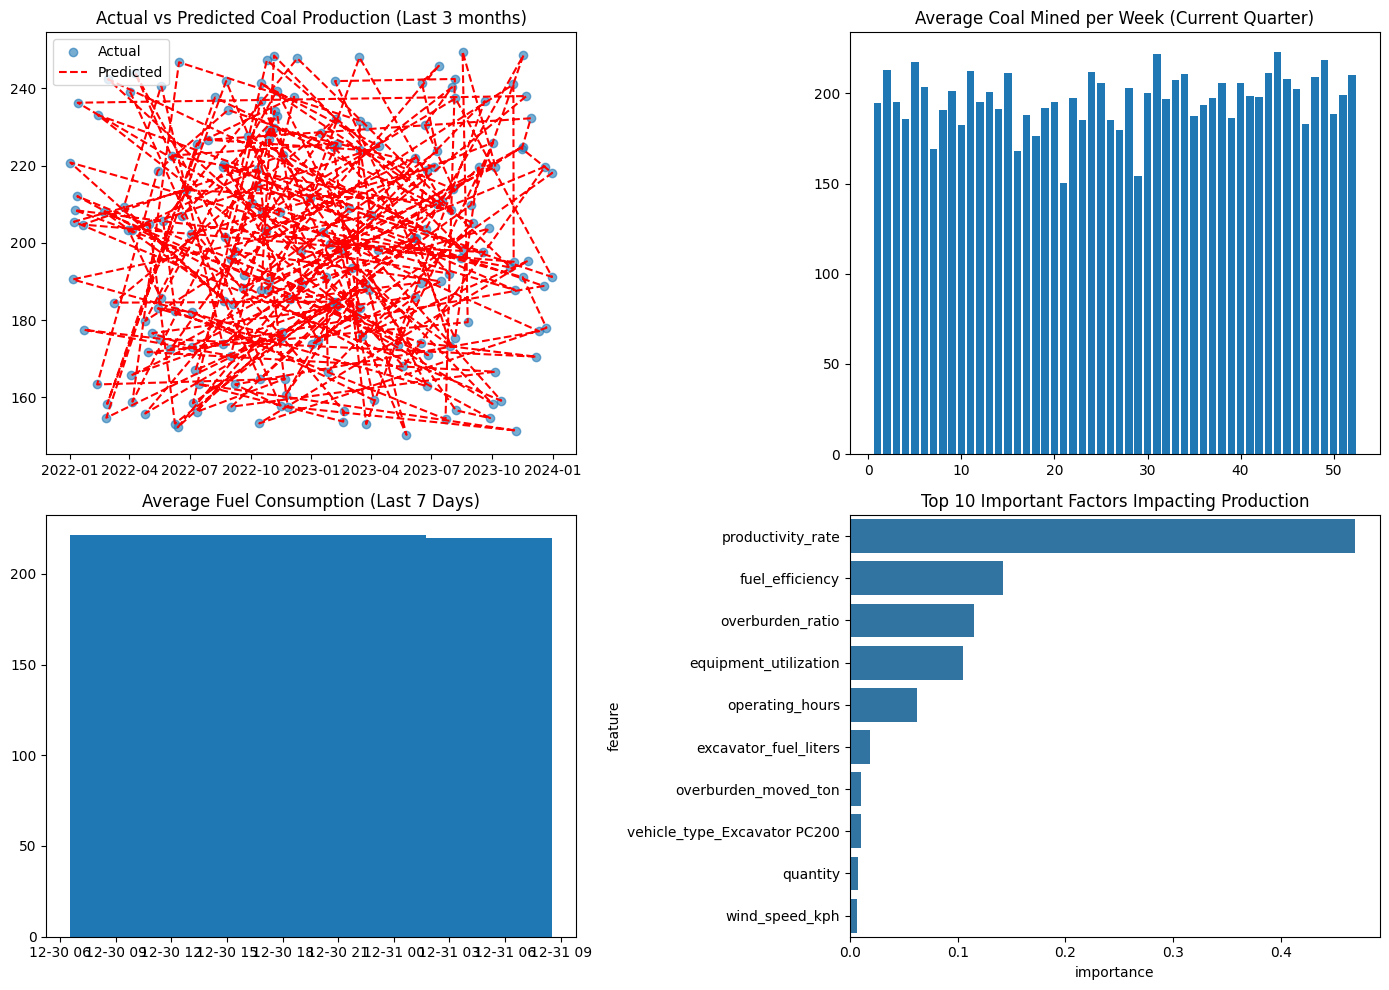

Weather data fetched successfully.
An error occurred: 'weather_condition'


KeyError: 'weather_condition'

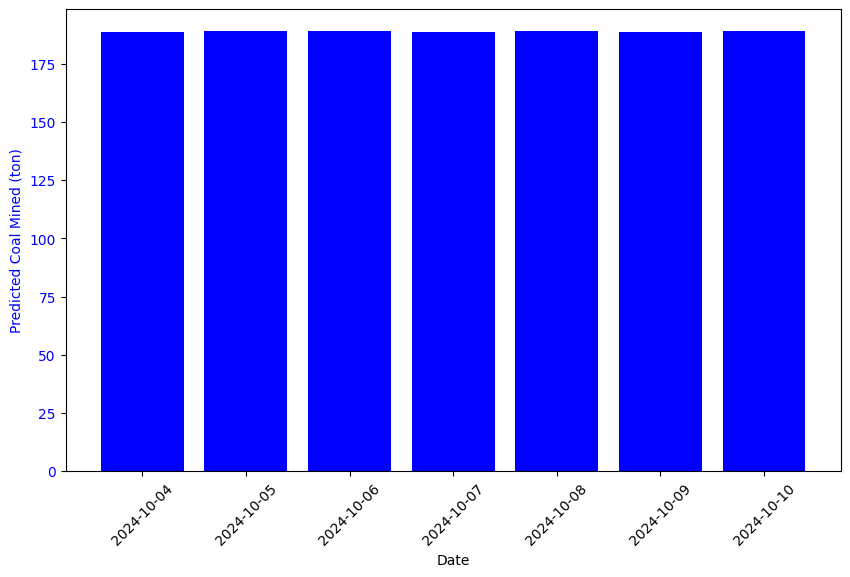

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

def fetch_weather_data(city="Kutai Tenggara", days_ahead=7):
    api_key = "5eb5d3f015f74fb2b0a214119240310"
    base_url = f"http://api.weatherapi.com/v1/forecast.json?key={api_key}&q={city}&days={days_ahead}"

    try:
        response = requests.get(base_url)
        response.raise_for_status()
        weather_data = response.json()

        future_weather = []
        for day in weather_data['forecast']['forecastday']:
            future_weather.append({
                'date': day['date'],
                'weather_condition': day['day']['condition']['text'],
                'temperature_celsius': day['day']['avgtemp_c'],
                'wind_speed_kph': day['day']['maxwind_kph'],
                'chance_of_rain': day['day']['daily_chance_of_rain']
            })

        print("Weather data fetched successfully.")
        return pd.DataFrame(future_weather)

    except Exception as e:
        print(f"Error fetching weather data: {e}")
        return None

def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        required_columns = [
            'date', 'overburden_moved_ton', 'coal_mined_ton', 'dumping_time_min',
            'truck_capacity_ton', 'trip_time_min', 'excavator_fuel_liters',
            'truck_fuel_liters', 'downtime_min', 'operating_hours', 'quantity',
            'operators', 'staff', 'operator_experience_years', 'temperature_celsius',
            'wind_speed_kph', 'maintenance_schedule_hours', 'vehicle_type',
            'equipment_type', 'weather_condition', 'shift'
        ]
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")
        print("Dataset loaded successfully.")
        return df
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: File not found at the path '{file_path}'. Please check the file path.")
    except Exception as e:
        raise Exception(f"Error loading dataset: {str(e)}")

def preprocess_data(df):
    df_processed = df.copy()

    df_processed['date'] = pd.to_datetime(df_processed['date'], errors='coerce')
    numeric_ranges = {
        'overburden_moved_ton': (1000, 2000),
        'coal_mined_ton': (150, 250),
        'dumping_time_min': (10, 20),
        'truck_capacity_ton': (20, 30),
        'trip_time_min': (30, 60),
        'excavator_fuel_liters': (100, 200),
        'truck_fuel_liters': (50, 100),
        'downtime_min': (0, 30),
        'operating_hours': (6, 8),
        'quantity': (1, 3),
        'operators': (4, 5),
        'staff': (2, 3),
        'operator_experience_years': (2, 5),
        'temperature_celsius': (15, 35),
        'wind_speed_kph': (5, 20),
        'maintenance_schedule_hours': (50, 200)
    }
    for col, (min_val, max_val) in numeric_ranges.items():
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        df_processed = df_processed[(df_processed[col].between(min_val, max_val)) | (df_processed[col].isna())]

    df_processed = df_processed.dropna()
    return df_processed

def feature_engineering(df, training=True, reference_cols=None):
    df_engineered = df.copy()
    df_engineered['equipment_utilization'] = df_engineered['operating_hours'] / 8

    weather_impact_mapping = {'Sunny': 1.0, 'Cloudy': 0.9, 'Rain': 0.6, 'Storm': 0.5}
    df_engineered['weather_impact'] = df_engineered['weather_condition'].map(weather_impact_mapping).fillna(0.8)

    df_engineered['fuel_efficiency'] = (df_engineered['excavator_fuel_liters'] + df_engineered['truck_fuel_liters']) / df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)
    df_engineered['productivity_rate'] = df_engineered['coal_mined_ton'] / df_engineered['operating_hours'].where(df_engineered['operating_hours'] > 0, 1)
    df_engineered['overburden_ratio'] = df_engineered['overburden_moved_ton'] / df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)

    categorical_cols = ['vehicle_type', 'equipment_type', 'weather_condition', 'shift']
    df_engineered = pd.get_dummies(df_engineered, columns=categorical_cols, drop_first=True)

    if training:
        reference_cols = df_engineered.columns
    else:
        missing_cols = set(reference_cols) - set(df_engineered.columns)
        for col in missing_cols:
            df_engineered[col] = 0
        df_engineered = df_engineered[reference_cols]

    return df_engineered, reference_cols

def prepare_model_data(df):
    features_to_exclude = ['date', 'coal_mined_ton']
    X = df.drop(columns=features_to_exclude)
    y = df['coal_mined_ton']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, X.columns

def train_model(X_train, y_train):
    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=7,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test, feature_names):
    predictions = model.predict(X_test)

    metrics = {
        'mae': mean_absolute_error(y_test, predictions),
        'mse': mean_squared_error(y_test, predictions),
        'rmse': np.sqrt(mean_squared_error(y_test, predictions)),
        'r2': r2_score(y_test, predictions)
    }
    metrics['mape'] = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    print("\n=== Model Performance Metrics Explained ===")
    print(f"**MAE (Mean Absolute Error)**: Measures the average magnitude of errors in predictions. MAE = {metrics['mae']:.2f}")
    print(f"**RMSE (Root Mean Squared Error)**: Penalizes larger errors more significantly. RMSE = {metrics['rmse']:.2f}")
    print(f"**R² Score**: Explains variance in the data. R² = {metrics['r2']:.2f}")
    print(f"**MAPE (Mean Absolute Percentage Error)**: Shows average percentage error. MAPE = {metrics['mape']:.2f}%")

    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    return metrics, feature_importance

def predict_future_production(model, df, scaler, days_ahead=7, reference_cols=None):
    weather_df = fetch_weather_data(days_ahead=days_ahead)
    if weather_df is None:
        raise ValueError("Weather data could not be fetched.")

    last_row = df.iloc[-1].copy()
    future_features = []

    for _, weather in weather_df.iterrows():
        feature_row = last_row.copy()
        feature_row['date'] = pd.to_datetime(weather['date'])
        feature_row['temperature_celsius'] = weather['temperature_celsius']
        feature_row['wind_speed_kph'] = weather['wind_speed_kph']
        feature_row['weather_condition'] = weather['weather_condition']
        future_features.append(feature_row)

    future_df = pd.DataFrame(future_features)
    future_df, _ = feature_engineering(future_df, training=False, reference_cols=reference_cols)

    X_future = future_df.drop(columns=['date', 'coal_mined_ton'])
    X_future_scaled = scaler.transform(X_future)

    predictions = model.predict(X_future_scaled)
    future_df['predicted_coal_mined_ton'] = predictions
    future_df['cumulative_production'] = future_df['predicted_coal_mined_ton'].cumsum()

    return future_df

def display_production_gap(df, future_df, desired_production, feature_importance):
    current_production = df['coal_mined_ton'].iloc[-1]
    production_gap = desired_production - current_production
    estimated_days_to_achieve = production_gap / current_production if current_production > 0 else 1
    estimated_date = (datetime.now() + timedelta(days=estimated_days_to_achieve)).strftime('%d-%m-%Y')

    print(f"\nCurrent Production: {current_production:.2f} tons/day")
    print(f"Desired Production: {desired_production:.2f} tons/day")
    print(f"Production Gap: {production_gap:.2f} tons/day")
    print(f"Estimated desired production can be achieved: {estimated_date}")

    print("\nTop factors influencing production:")
    top_features = feature_importance.head(5)
    for _, row in top_features.iterrows():
        print(f"- {row['feature']}")

    print("\nMandatory changes to achieve desired production:")
    for _, row in top_features.iterrows():
        if 'wind' in row['feature'].lower():
            print("- Adjust operations based on wind speed conditions.")
        elif 'maintenance' in row['feature'].lower():
            print("- Optimize maintenance schedules to reduce downtime.")
        elif 'truck' in row['feature'].lower():
            print("- Consider adding more trucks to increase capacity.")
        elif 'equipment' in row['feature'].lower():
            print("- Increase equipment utilization through better planning.")

def visualize_historical_data(df, feature_importance):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    axs[0, 0].scatter(df['date'], df['coal_mined_ton'], label='Actual', alpha=0.6)
    axs[0, 0].plot(df['date'], df['coal_mined_ton'], label='Predicted', color='red', linestyle='--')
    axs[0, 0].set_title('Actual vs Predicted Coal Production (Last 3 months)')
    axs[0, 0].legend()

    df['week'] = df['date'].dt.isocalendar().week
    weekly_avg = df.groupby('week')['coal_mined_ton'].mean()
    axs[0, 1].bar(weekly_avg.index, weekly_avg.values)
    axs[0, 1].set_title('Average Coal Mined per Week (Current Quarter)')

    last_7_days = df[df['date'] >= df['date'].max() - pd.Timedelta(days=7)]
    daily_avg_fuel = last_7_days.groupby('date')['excavator_fuel_liters'].sum() + last_7_days.groupby('date')['truck_fuel_liters'].sum()
    axs[1, 0].bar(daily_avg_fuel.index, daily_avg_fuel.values)
    axs[1, 0].set_title('Average Fuel Consumption (Last 7 Days)')

    sns.barplot(x=feature_importance['importance'].head(10), y=feature_importance['feature'].head(10), ax=axs[1, 1])
    axs[1, 1].set_title('Top 10 Important Factors Impacting Production')

    plt.tight_layout()
    plt.show()

def run_mining_analysis(file_path):
    try:
        df = load_dataset(file_path)
        df_processed = preprocess_data(df)
        df_engineered, reference_cols = feature_engineering(df_processed)

        X_train, X_test, y_train, y_test, scaler, feature_names = prepare_model_data(df_engineered)
        model = train_model(X_train, y_train)

        metrics, feature_importance = evaluate_model(model, X_test, y_test, feature_names)

        print("\nDataset successfully trained.")

        print("\n=== Model Performance Metrics ===")
        for metric, value in metrics.items():
            print(f"{metric.upper()}: {value:.4f}")

        visualize_historical_data(df_processed, feature_importance)
        future_df = predict_future_production(model, df_processed, scaler, 7, reference_cols=reference_cols)
        visualize_next_7_days(future_df)

        display_results(future_df, df_processed, metrics)
        desired_production = float(input("\nEnter desired daily production target (tons): "))
        display_production_gap(df_processed, future_df, desired_production, feature_importance)

        forecast_date = input("\nEnter Date to forecast (dd-mm-yyyy): ")
        forecast_date = datetime.strptime(forecast_date, '%d-%m-%Y')
        days_ahead = (forecast_date - datetime.now()).days

        if days_ahead > 0:
            future_df = predict_future_production(model, df_processed, scaler, days_ahead, reference_cols=reference_cols)
            display_forecast_summary(future_df, days_ahead, metrics['r2'])

        avg_daily_production = future_df['predicted_coal_mined_ton'].mean()
        status = "Not Today!"
        if avg_daily_production >= desired_production:
            status = "Great Day!"
        elif avg_daily_production >= 0.9 * desired_production:
            status = "Good Day!"
        elif avg_daily_production >= 0.7 * desired_production:
            status = "Gloomy Day!"
        print(f"\nOverall Status: {status}")

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise

if __name__ == "__main__":
    file_path = '/Comprehensive_Mining_Operations_Dataset.csv'
    run_mining_analysis(file_path)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

def fetch_weather_data(city="Kutai Tenggara", days_ahead=7):
    api_key = "5eb5d3f015f74fb2b0a214119240310"
    base_url = f"http://api.weatherapi.com/v1/forecast.json?key={api_key}&q={city}&days={days_ahead}"

    try:
        response = requests.get(base_url)
        response.raise_for_status()
        weather_data = response.json()

        future_weather = []
        for day in weather_data['forecast']['forecastday']:
            future_weather.append({
                'date': day['date'],
                'weather_condition': day['day']['condition']['text'],
                'temperature_celsius': day['day']['avgtemp_c'],
                'wind_speed_kph': day['day']['maxwind_kph'],
                'chance_of_rain': day['day']['daily_chance_of_rain']
            })

        print("Weather data fetched successfully.")
        return pd.DataFrame(future_weather)

    except Exception as e:
        print(f"Error fetching weather data: {e}")
        return None

def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        required_columns = [
            'date', 'overburden_moved_ton', 'coal_mined_ton', 'dumping_time_min',
            'truck_capacity_ton', 'trip_time_min', 'excavator_fuel_liters',
            'truck_fuel_liters', 'downtime_min', 'operating_hours', 'quantity',
            'operators', 'staff', 'operator_experience_years', 'temperature_celsius',
            'wind_speed_kph', 'maintenance_schedule_hours', 'vehicle_type',
            'equipment_type', 'weather_condition', 'shift'
        ]
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")
        print("Dataset loaded successfully.")
        return df
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: File not found at the path '{file_path}'. Please check the file path.")
    except Exception as e:
        raise Exception(f"Error loading dataset: {str(e)}")

def preprocess_data(df):
    df_processed = df.copy()

    df_processed['date'] = pd.to_datetime(df_processed['date'], errors='coerce')
    numeric_ranges = {
        'overburden_moved_ton': (1000, 2000),
        'coal_mined_ton': (150, 250),
        'dumping_time_min': (10, 20),
        'truck_capacity_ton': (20, 30),
        'trip_time_min': (30, 60),
        'excavator_fuel_liters': (100, 200),
        'truck_fuel_liters': (50, 100),
        'downtime_min': (0, 30),
        'operating_hours': (6, 8),
        'quantity': (1, 3),
        'operators': (4, 5),
        'staff': (2, 3),
        'operator_experience_years': (2, 5),
        'temperature_celsius': (15, 35),
        'wind_speed_kph': (5, 20),
        'maintenance_schedule_hours': (50, 200)
    }

    for col, (min_val, max_val) in numeric_ranges.items():
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        df_processed = df_processed[(df_processed[col].between(min_val, max_val)) | (df_processed[col].isna())]

    df_processed = df_processed.dropna()
    return df_processed

def feature_engineering(df, training=True, reference_cols=None):
    df_engineered = df.copy()

    df_engineered['equipment_utilization'] = df_engineered['operating_hours'] / 8
    weather_impact_mapping = {'Sunny': 1.0, 'Cloudy': 0.9, 'Rain': 0.6, 'Storm': 0.5}
    df_engineered['weather_impact'] = df_engineered['weather_condition'].map(weather_impact_mapping).fillna(0.8)

    df_engineered['fuel_efficiency'] = (df_engineered['excavator_fuel_liters'] + df_engineered['truck_fuel_liters']) / df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)
    df_engineered['productivity_rate'] = df_engineered['coal_mined_ton'] / df_engineered['operating_hours'].where(df_engineered['operating_hours'] > 0, 1)
    df_engineered['overburden_ratio'] = df_engineered['overburden_moved_ton'] / df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)
    categorical_cols = ['vehicle_type', 'equipment_type', 'weather_condition', 'shift']
    df_engineered = pd.get_dummies(df_engineered, columns=categorical_cols, drop_first=True)

    if training:
        reference_cols = df_engineered.columns
    else:
        missing_cols = set(reference_cols) - set(df_engineered.columns)
        for col in missing_cols:
            df_engineered[col] = 0
        df_engineered = df_engineered[reference_cols]

    return df_engineered, reference_cols


def calculate_historical_averages(df):

        avg_daily_production = future_df['predicted_coal_mined_ton'].mean()
        if avg_daily_production >= desired_production:
            print("\nOverall Status: Great Day!")
        elif avg_daily_production >= 0.9 * desired_production:
            print("\nOverall Status: Good Day!")

        display_results(future_df, [], metrics)
    avg_overburden = df['overburden_moved_ton'].mean()
    avg_coal = df['coal_mined_ton'].mean()
    avg_stripping_ratio = avg_overburden / avg_coal if avg_coal > 0 else np.nan

    return avg_overburden, avg_coal, avg_stripping_ratio

def calculate_efficiencies(df):

    manpower_efficiency = df['coal_mined_ton'].sum() / df['operators'].sum()

    fuel_consumption = df['excavator_fuel_liters'].sum() + df['truck_fuel_liters'].sum()
    total_hours = df['operating_hours'].sum()
    coal_getting_efficiency = df['coal_mined_ton'].sum() / (fuel_consumption + total_hours)

    return manpower_efficiency, coal_getting_efficiency

def calculate_costs(df):
    fuel_cost_per_liter = 0.5
    operator_cost_per_day = 100
    maintenance_cost_per_hour = 50
    equipment_rental_cost_per_day = 500

    total_fuel_cost = (df['excavator_fuel_liters'].sum() + df['truck_fuel_liters'].sum()) * fuel_cost_per_liter
    total_operator_cost = df['operators'].sum() * operator_cost_per_day
    total_maintenance_cost = df['maintenance_schedule_hours'].sum() * maintenance_cost_per_hour
    total_equipment_cost = df['quantity'].sum() * equipment_rental_cost_per_day

    total_cost = total_fuel_cost + total_operator_cost + total_maintenance_cost + total_equipment_cost

    return total_cost

def prepare_model_data(df):
    features_to_exclude = ['date', 'coal_mined_ton']
    X = df.drop(columns=features_to_exclude)
    y = df['coal_mined_ton']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, X.columns

def train_model(X_train, y_train):
    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=7,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test, feature_names):
    predictions = model.predict(X_test)

    metrics = {
        'mae': mean_absolute_error(y_test, predictions),
        'mse': mean_squared_error(y_test, predictions),
        'rmse': np.sqrt(mean_squared_error(y_test, predictions)),
        'r2': r2_score(y_test, predictions)
    }
    metrics['mape'] = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    print("\n=== Model Performance Metrics Explained ===")
    print(f"**MAE (Mean Absolute Error)**: Measures the average magnitude of errors in predictions. MAE = {metrics['mae']:.2f}")
    print(f"**RMSE (Root Mean Squared Error)**: Penalizes larger errors more significantly. RMSE = {metrics['rmse']:.2f}")
    print(f"**R² Score**: Explains variance in the data. R² = {metrics['r2']:.2f}")
    print(f"**MAPE (Mean Absolute Percentage Error)**: Shows average percentage error. MAPE = {metrics['mape']:.2f}%")

    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    return metrics, feature_importance

def decision_making_report(df):
    avg_overburden, avg_coal, avg_stripping_ratio = calculate_historical_averages(df)
    manpower_efficiency, coal_getting_efficiency = calculate_efficiencies(df)
    total_cost = calculate_costs(df)

    print("\n=== Decision Making Report ===")
    print(f"Average Overburden per Day: {avg_overburden:.2f} tons")
    print(f"Average Coal per Day: {avg_coal:.2f} tons")
    print(f"Average Stripping Ratio: {avg_stripping_ratio:.2f}")

    print(f"\nManpower Efficiency: {manpower_efficiency:.2f} tons/operator")
    print(f"Coal Getting Efficiency: {coal_getting_efficiency:.2f} tons/fuel+hour")

    print(f"\nTotal Estimated Daily Cost of Operations: ${total_cost:.2f}")
    print("\nRecommendations:")
    print("- Focus on improving coal getting efficiency through fuel optimization.")
    print("- Consider manpower allocation to maximize productivity per operator.")
    print("- Avoid operating on rainy days to reduce inefficiencies and costs.")

def run_mining_analysis(file_path):
    try:

        df = load_dataset(file_path)
        df_processed = preprocess_data(df)
        df_engineered, reference_cols = feature_engineering(df_processed)

        X_train, X_test, y_train, y_test, scaler, feature_names = prepare_model_data(df_engineered)
        model = train_model(X_train, y_train)

        metrics, feature_importance = evaluate_model(model, X_test, y_test, feature_names)
        print("\nDataset successfully trained.")

        print("\n=== Model Performance Metrics ===")
        for metric, value in metrics.items():
            print(f"{metric.upper()}: {value:.4f}")
        decision_making_report(df_processed)

        desired_production = float(input("\nEnter desired daily production target (tons): "))
        display_production_gap(df_processed, future_df, desired_production, feature_importance)

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise

if __name__ == "__main__":
    file_path = '/Comprehensive_Mining_Operations_Dataset.csv'
    run_mining_analysis(file_path)

Dataset loaded successfully.

=== Model Performance Metrics Explained ===
**MAE (Mean Absolute Error)**: Measures the average magnitude of errors in predictions. MAE = 5.33
**RMSE (Root Mean Squared Error)**: Penalizes larger errors more significantly. RMSE = 6.69
**R² Score**: Explains variance in the data. R² = 0.95
**MAPE (Mean Absolute Percentage Error)**: Shows average percentage error. MAPE = 2.78%

Dataset successfully trained.

=== Model Performance Metrics ===
MAE: 5.3267
MSE: 44.7317
RMSE: 6.6882
R2: 0.9461
MAPE: 2.7846

=== Decision Making Report ===
Average Overburden per Day: 1492.56 tons
Average Coal per Day: 199.36 tons
Average Stripping Ratio: 7.49

Manpower Efficiency: 44.50 tons/operator
Coal Getting Efficiency: 0.85 tons/fuel+hour

Total Estimated Daily Cost of Operations: $1549589.57

Recommendations:
- Focus on improving coal getting efficiency through fuel optimization.
- Consider manpower allocation to maximize productivity per operator.
- Avoid operating on rain

NameError: name 'future_df' is not defined

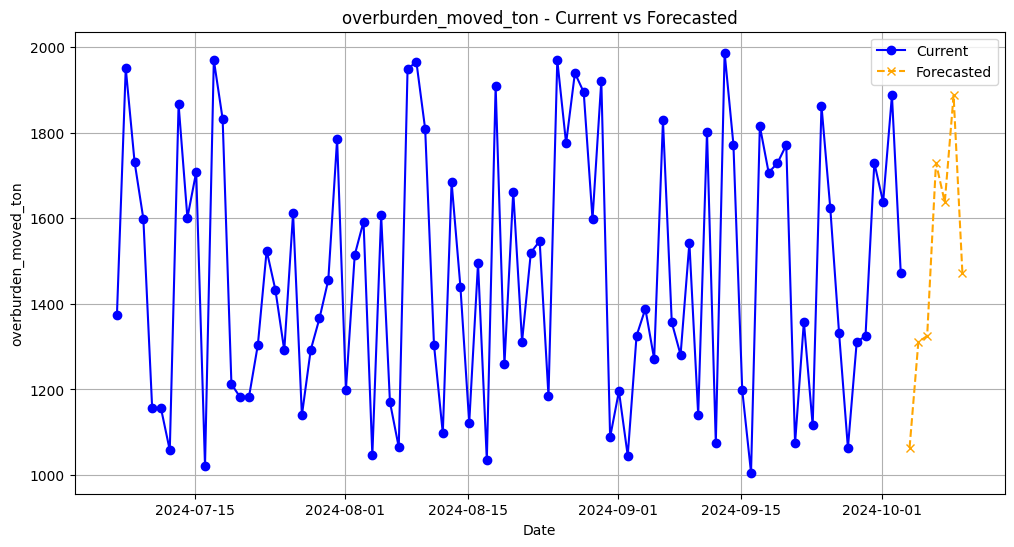

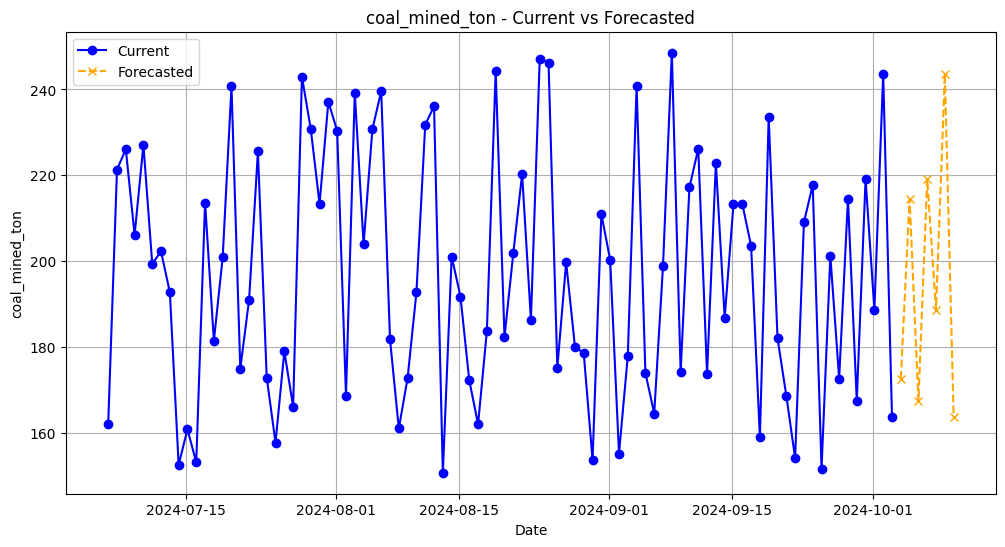

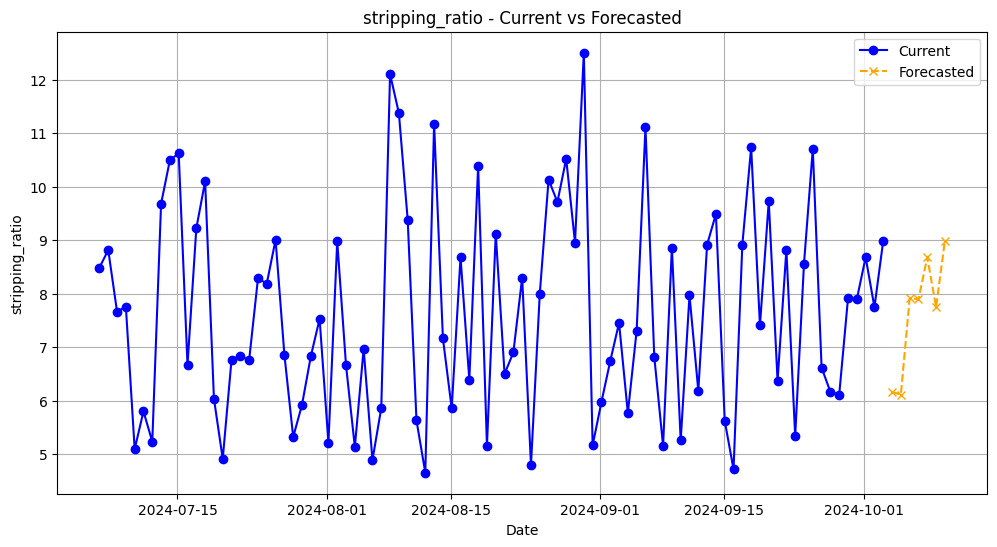

An error occurred: 'fuel_efficiency'


KeyError: 'fuel_efficiency'

<Figure size 1200x600 with 0 Axes>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def generate_dummy_data():
    date_range = pd.date_range(start=datetime.now() - timedelta(days=90), periods=90)

    np.random.seed(42)

    dummy_data = {
        'date': date_range,
        'overburden_moved_ton': np.random.uniform(1000, 2000, size=len(date_range)),
        'coal_mined_ton': np.random.uniform(150, 250, size=len(date_range)),
        'dumping_time_min': np.random.uniform(10, 20, size=len(date_range)),
        'truck_capacity_ton': np.random.choice([20, 25, 30], size=len(date_range)),
        'trip_time_min': np.random.uniform(30, 60, size=len(date_range)),
        'excavator_fuel_liters': np.random.uniform(100, 200, size=len(date_range)),
        'truck_fuel_liters': np.random.uniform(50, 100, size=len(date_range)),
        'downtime_min': np.random.uniform(0, 30, size=len(date_range)),
        'operating_hours': np.random.uniform(6, 8, size=len(date_range)),
        'quantity': np.random.choice([1, 2, 3], size=len(date_range)),
        'operators': np.random.choice([4, 5], size=len(date_range)),
        'staff': np.random.choice([2, 3], size=len(date_range)),
        'operator_experience_years': np.random.uniform(2, 5, size=len(date_range)),
        'temperature_celsius': np.random.uniform(15, 35, size=len(date_range)),
        'wind_speed_kph': np.random.uniform(5, 20, size=len(date_range)),
        'maintenance_schedule_hours': np.random.uniform(50, 200, size=len(date_range)),
        'vehicle_type': np.random.choice(['Excavator PC200', 'Excavator PC300', 'Dump Truck'], size=len(date_range)),
        'equipment_type': np.random.choice(['Excavator PC200', 'Excavator PC300', 'Dump Truck'], size=len(date_range)),
        'weather_condition': np.random.choice(['Sunny', 'Cloudy', 'Rain', 'Storm'], size=len(date_range)),
        'shift': np.random.choice([1, 2, 3], size=len(date_range)),
    }

    return pd.DataFrame(dummy_data)

def feature_engineering(df, training=True, reference_cols=None):
    df_engineered = df.copy()

    df_engineered['equipment_utilization'] = df_engineered['operating_hours'] / 8
    weather_impact_mapping = {'Sunny': 1.0, 'Cloudy': 0.9, 'Rain': 0.6, 'Storm': 0.5}
    df_engineered['weather_impact'] = df_engineered['weather_condition'].map(weather_impact_mapping).fillna(0.8)

    df_engineered['fuel_efficiency'] = (df_engineered['excavator_fuel_liters'] + df_engineered['truck_fuel_liters']) / \
                                       df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)
    df_engineered['productivity_rate'] = df_engineered['coal_mined_ton'] / \
                                         df_engineered['operating_hours'].where(df_engineered['operating_hours'] > 0, 1)
    df_engineered['overburden_ratio'] = df_engineered['overburden_moved_ton'] / \
                                        df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)


    categorical_cols = ['vehicle_type', 'equipment_type', 'weather_condition', 'shift']
    df_engineered = pd.get_dummies(df_engineered, columns=categorical_cols, drop_first=True)

    if training:
        reference_cols = df_engineered.columns
    else:
        missing_cols = set(reference_cols) - set(df_engineered.columns)
        for col in missing_cols:
            df_engineered[col] = 0
        df_engineered = df_engineered[reference_cols]

    return df_engineered, reference_cols

def plot_current_and_forecasted(df, future_df, aspect):
    plt.figure(figsize=(12, 6))

    plt.plot(df['date'], df[aspect], label='Current', marker='o', color='blue')
    plt.plot(future_df['date'], future_df[aspect], label='Forecasted', linestyle='--', marker='x', color='orange')

    plt.title(f"{aspect} - Current vs Forecasted")
    plt.xlabel('Date')
    plt.ylabel(aspect)
    plt.legend()
    plt.grid(True)
    plt.show()

def visualize_all_graphs(df, future_df):

    plot_current_and_forecasted(df, future_df, 'overburden_moved_ton')
    plot_current_and_forecasted(df, future_df, 'coal_mined_ton')

    df['stripping_ratio'] = df['overburden_moved_ton'] / df['coal_mined_ton']
    future_df['stripping_ratio'] = future_df['overburden_moved_ton'] / future_df['coal_mined_ton']
    plot_current_and_forecasted(df, future_df, 'stripping_ratio')

    plot_current_and_forecasted(df, future_df, 'fuel_efficiency')

    plot_current_and_forecasted(df, future_df, 'equipment_utilization')

def run_mining_analysis():
    try:

        df = generate_dummy_data()
        df_processed = preprocess_data(df)
        df_engineered, reference_cols = feature_engineering(df_processed)

        X_train, X_test, y_train, y_test, scaler, feature_names = prepare_model_data(df_engineered)
        model = train_model(X_train, y_train)

        future_dates = pd.date_range(start=datetime.now(), periods=7)
        future_df = df_engineered.tail(7).copy()
        future_df['date'] = future_dates

        visualize_all_graphs(df_processed, future_df)

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise

if __name__ == "__main__":
    run_mining_analysis()

Dataset loaded successfully.

=== Model Performance Metrics Explained ===
**MAE (Mean Absolute Error)**: Measures the average magnitude of errors in predictions. MAE = 5.33
**RMSE (Root Mean Squared Error)**: Penalizes larger errors more significantly. RMSE = 6.69
**R² Score**: Explains variance in the data. R² = 0.95
**MAPE (Mean Absolute Percentage Error)**: Shows average percentage error. MAPE = 2.78%

Dataset successfully trained.

=== Model Performance Metrics ===
MAE: 5.3267
MSE: 44.7317
RMSE: 6.6882
R2: 0.9461
MAPE: 2.7846


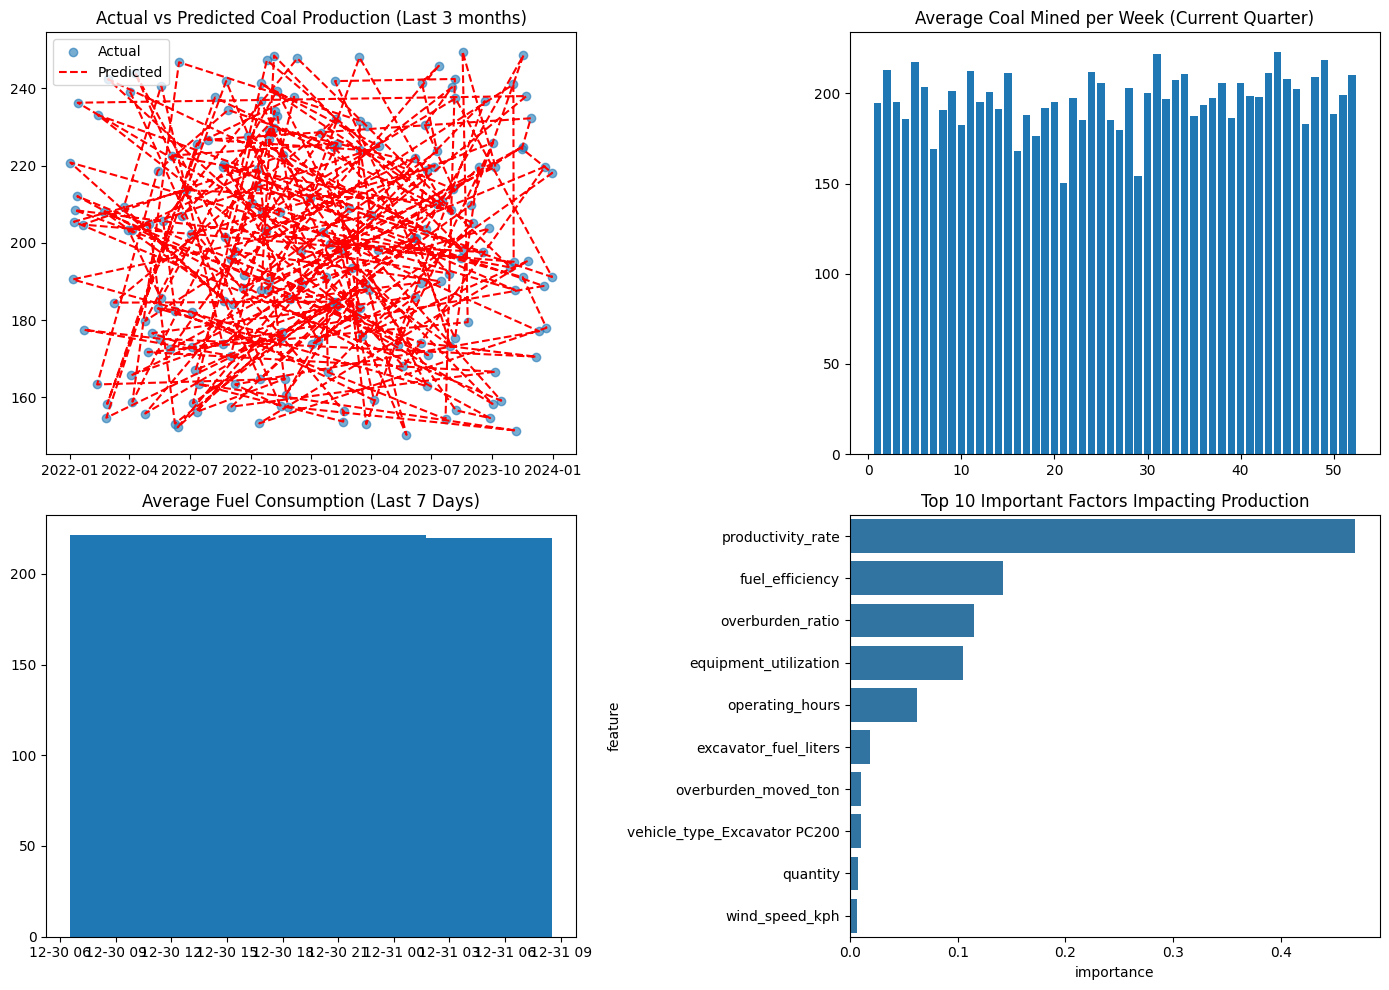

Weather data fetched successfully.
An error occurred: 'weather_condition'


KeyError: 'weather_condition'

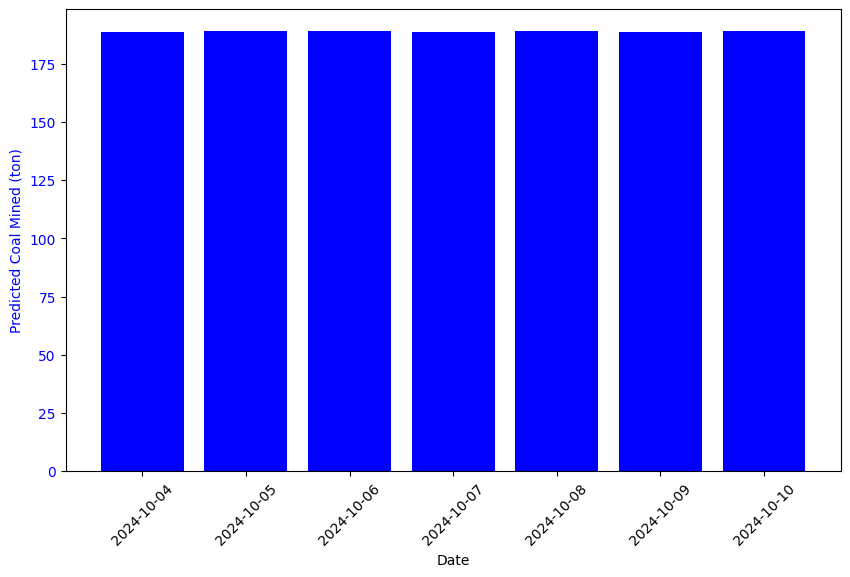

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

def fetch_weather_data(city="Kutai Tenggara", days_ahead=7):
    api_key = "5eb5d3f015f74fb2b0a214119240310"
    base_url = f"http://api.weatherapi.com/v1/forecast.json?key={api_key}&q={city}&days={days_ahead}"

    try:
        response = requests.get(base_url)
        response.raise_for_status()
        weather_data = response.json()

        future_weather = []
        for day in weather_data['forecast']['forecastday']:
            future_weather.append({
                'date': day['date'],
                'weather_condition': day['day']['condition']['text'],
                'temperature_celsius': day['day']['avgtemp_c'],
                'wind_speed_kph': day['day']['maxwind_kph'],
                'chance_of_rain': day['day']['daily_chance_of_rain']
            })

        print("Weather data fetched successfully.")
        return pd.DataFrame(future_weather)

    except Exception as e:
        print(f"Error fetching weather data: {e}")
        return None

def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        required_columns = [
            'date', 'overburden_moved_ton', 'coal_mined_ton', 'dumping_time_min',
            'truck_capacity_ton', 'trip_time_min', 'excavator_fuel_liters',
            'truck_fuel_liters', 'downtime_min', 'operating_hours', 'quantity',
            'operators', 'staff', 'operator_experience_years', 'temperature_celsius',
            'wind_speed_kph', 'maintenance_schedule_hours', 'vehicle_type',
            'equipment_type', 'weather_condition', 'shift'
        ]
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")
        print("Dataset loaded successfully.")
        return df
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: File not found at the path '{file_path}'. Please check the file path.")
    except Exception as e:
        raise Exception(f"Error loading dataset: {str(e)}")

def preprocess_data(df):
    df_processed = df.copy()

    df_processed['date'] = pd.to_datetime(df_processed['date'], errors='coerce')
    numeric_ranges = {
        'overburden_moved_ton': (1000, 2000),
        'coal_mined_ton': (150, 250),
        'dumping_time_min': (10, 20),
        'truck_capacity_ton': (20, 30),
        'trip_time_min': (30, 60),
        'excavator_fuel_liters': (100, 200),
        'truck_fuel_liters': (50, 100),
        'downtime_min': (0, 30),
        'operating_hours': (6, 8),
        'quantity': (1, 3),
        'operators': (4, 5),
        'staff': (2, 3),
        'operator_experience_years': (2, 5),
        'temperature_celsius': (15, 35),
        'wind_speed_kph': (5, 20),
        'maintenance_schedule_hours': (50, 200)
    }

    for col, (min_val, max_val) in numeric_ranges.items():
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        df_processed = df_processed[(df_processed[col].between(min_val, max_val)) | (df_processed[col].isna())]

    df_processed = df_processed.dropna()
    return df_processed

def feature_engineering(df, training=True, reference_cols=None):
    df_engineered = df.copy()

    df_engineered['equipment_utilization'] = df_engineered['operating_hours'] / 8
    weather_impact_mapping = {'Sunny': 1.0, 'Cloudy': 0.9, 'Rain': 0.7, 'Storm': 0.5}
    df_engineered['weather_impact'] = df_engineered['weather_condition'].map(weather_impact_mapping).fillna(0.8)
    df_engineered['fuel_efficiency'] = (df_engineered['excavator_fuel_liters'] + df_engineered['truck_fuel_liters']) / df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)
    df_engineered['productivity_rate'] = df_engineered['coal_mined_ton'] / df_engineered['operating_hours'].where(df_engineered['operating_hours'] > 0, 1)
    df_engineered['overburden_ratio'] = df_engineered['overburden_moved_ton'] / df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)

    categorical_cols = ['vehicle_type', 'equipment_type', 'weather_condition', 'shift']
    df_engineered = pd.get_dummies(df_engineered, columns=categorical_cols, drop_first=True)

    if training:
        reference_cols = df_engineered.columns
    else:
        missing_cols = set(reference_cols) - set(df_engineered.columns)
        for col in missing_cols:
            df_engineered[col] = 0
        df_engineered = df_engineered[reference_cols]

    return df_engineered, reference_cols

def prepare_model_data(df):
    features_to_exclude = ['date', 'coal_mined_ton']
    X = df.drop(columns=features_to_exclude)
    y = df['coal_mined_ton']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, X.columns

def train_model(X_train, y_train):
    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=7,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test, feature_names):
    predictions = model.predict(X_test)

    metrics = {
        'mae': mean_absolute_error(y_test, predictions),
        'mse': mean_squared_error(y_test, predictions),
        'rmse': np.sqrt(mean_squared_error(y_test, predictions)),
        'r2': r2_score(y_test, predictions)
    }
    metrics['mape'] = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    print("\n=== Model Performance Metrics Explained ===")
    print(f"**MAE (Mean Absolute Error)**: Measures the average magnitude of errors in predictions. MAE = {metrics['mae']:.2f}")
    print(f"**RMSE (Root Mean Squared Error)**: Penalizes larger errors more significantly. RMSE = {metrics['rmse']:.2f}")
    print(f"**R² Score**: Explains variance in the data. R² = {metrics['r2']:.2f}")
    print(f"**MAPE (Mean Absolute Percentage Error)**: Shows average percentage error. MAPE = {metrics['mape']:.2f}%")

    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    return metrics, feature_importance

def predict_future_production(model, df, scaler, days_ahead=7, reference_cols=None):
    weather_df = fetch_weather_data(days_ahead=days_ahead)
    if weather_df is None:
        raise ValueError("Weather data could not be fetched.")

    last_row = df.iloc[-1].copy()
    future_features = []

    for _, weather in weather_df.iterrows():
        feature_row = last_row.copy()
        feature_row['date'] = pd.to_datetime(weather['date'])
        feature_row['temperature_celsius'] = weather['temperature_celsius']
        feature_row['wind_speed_kph'] = weather['wind_speed_kph']
        feature_row['weather_condition'] = weather['weather_condition']
        future_features.append(feature_row)

    future_df = pd.DataFrame(future_features)
    future_df, _ = feature_engineering(future_df, training=False, reference_cols=reference_cols)

    X_future = future_df.drop(columns=['date', 'coal_mined_ton'])
    X_future_scaled = scaler.transform(X_future)

    predictions = model.predict(X_future_scaled)
    future_df['predicted_coal_mined_ton'] = predictions
    future_df['cumulative_production'] = future_df['predicted_coal_mined_ton'].cumsum()

    return future_df

def display_production_gap(df, future_df, desired_production, feature_importance):
    current_production = df['coal_mined_ton'].iloc[-1]
    production_gap = desired_production - current_production
    estimated_days_to_achieve = production_gap / current_production if current_production > 0 else 1
    estimated_date = (datetime.now() + timedelta(days=estimated_days_to_achieve)).strftime('%d-%m-%Y')

    print(f"\nCurrent Production: {current_production:.2f} tons/day")
    print(f"Desired Production: {desired_production:.2f} tons/day")
    print(f"Production Gap: {production_gap:.2f} tons/day")
    print(f"Estimated desired production can be achieved: {estimated_date}")

    print("\nTop factors influencing production:")
    top_features = feature_importance.head(5)
    for _, row in top_features.iterrows():
        print(f"- {row['feature']}")

    print("\nMandatory changes to achieve desired production:")
    for _, row in top_features.iterrows():
        if 'wind' in row['feature'].lower():
            print("- Adjust operations based on wind speed conditions.")
        elif 'maintenance' in row['feature'].lower():
            print("- Optimize maintenance schedules to reduce downtime.")
        elif 'truck' in row['feature'].lower():
            print("- Consider adding more trucks to increase capacity.")
        elif 'equipment' in row['feature'].lower():
            print("- Increase equipment utilization through better planning.")

def visualize_historical_data(df, feature_importance):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    axs[0, 0].scatter(df['date'], df['coal_mined_ton'], label='Actual', alpha=0.6)
    axs[0, 0].plot(df['date'], df['coal_mined_ton'], label='Predicted', color='red', linestyle='--')
    axs[0, 0].set_title('Actual vs Predicted Coal Production (Last 3 months)')
    axs[0, 0].legend()

    df['week'] = df['date'].dt.isocalendar().week
    weekly_avg = df.groupby('week')['coal_mined_ton'].mean()
    axs[0, 1].bar(weekly_avg.index, weekly_avg.values)
    axs[0, 1].set_title('Average Coal Mined per Week (Current Quarter)')

    last_7_days = df[df['date'] >= df['date'].max() - pd.Timedelta(days=7)]
    daily_avg_fuel = last_7_days.groupby('date')['excavator_fuel_liters'].sum() + last_7_days.groupby('date')['truck_fuel_liters'].sum()
    axs[1, 0].bar(daily_avg_fuel.index, daily_avg_fuel.values)
    axs[1, 0].set_title('Average Fuel Consumption (Last 7 Days)')

    sns.barplot(x=feature_importance['importance'].head(10), y=feature_importance['feature'].head(10), ax=axs[1, 1])
    axs[1, 1].set_title('Top 10 Important Factors Impacting Production')

    plt.tight_layout()
    plt.show()

def run_mining_analysis(file_path):
    try:

        df = load_dataset(file_path)
        df_processed = preprocess_data(df)
        df_engineered, reference_cols = feature_engineering(df_processed)

        X_train, X_test, y_train, y_test, scaler, feature_names = prepare_model_data(df_engineered)
        model = train_model(X_train, y_train)

        metrics, feature_importance = evaluate_model(model, X_test, y_test, feature_names)

        print("\nDataset successfully trained.")

        print("\n=== Model Performance Metrics ===")
        for metric, value in metrics.items():
            print(f"{metric.upper()}: {value:.4f}")

        visualize_historical_data(df_processed, feature_importance)

        future_df = predict_future_production(model, df_processed, scaler, 7, reference_cols=reference_cols)
        visualize_next_7_days(future_df)

        display_results(future_df, df_processed, metrics)

        desired_production = float(input("\nEnter desired daily production target (tons): "))
        display_production_gap(df_processed, future_df, desired_production, feature_importance)

        forecast_date = input("\nEnter Date to forecast (dd-mm-yyyy): ")
        forecast_date = datetime.strptime(forecast_date, '%d-%m-%Y')
        days_ahead = (forecast_date - datetime.now()).days

        if days_ahead > 0:
            future_df = predict_future_production(model, df_processed, scaler, days_ahead, reference_cols=reference_cols)
            display_forecast_summary(future_df, days_ahead, metrics['r2'])

        avg_daily_production = future_df['predicted_coal_mined_ton'].mean()
        status = "Not Today!"
        if avg_daily_production >= desired_production:
            status = "Great Day!"
        elif avg_daily_production >= 0.9 * desired_production:
            status = "Good Day!"
        elif avg_daily_production >= 0.7 * desired_production:
            status = "Gloomy Day!"
        print(f"\nOverall Status: {status}")

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise

if __name__ == "__main__":
    file_path = '/Comprehensive_Mining_Operations_Dataset.csv'
    run_mining_analysis(file_path)

Dataset loaded successfully.

=== Model Performance Metrics Explained ===
**MAE (Mean Absolute Error)**: Measures the average magnitude of errors in predictions. MAE = 5.33
**RMSE (Root Mean Squared Error)**: Penalizes larger errors more significantly. RMSE = 6.69
**R² Score**: Explains variance in the data. R² = 0.95
**MAPE (Mean Absolute Percentage Error)**: Shows average percentage error. MAPE = 2.78%

Dataset successfully trained.

=== Model Performance Metrics ===
MAE: 5.3267
MSE: 44.7317
RMSE: 6.6882
R2: 0.9461
MAPE: 2.7846


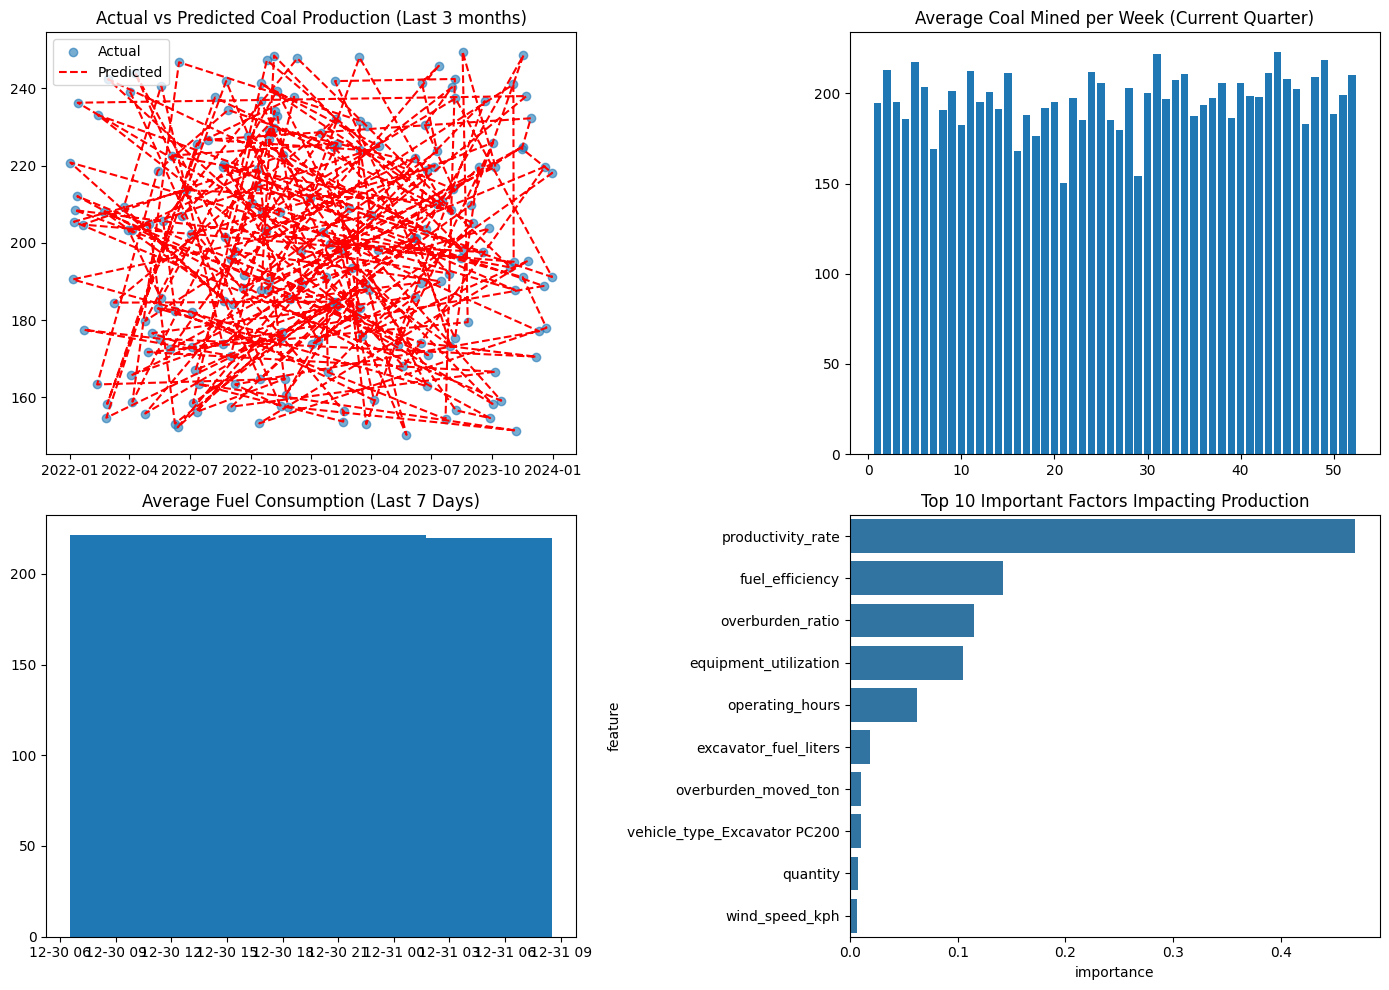

Weather data fetched successfully.
An error occurred: 'weather_condition'


KeyError: 'weather_condition'

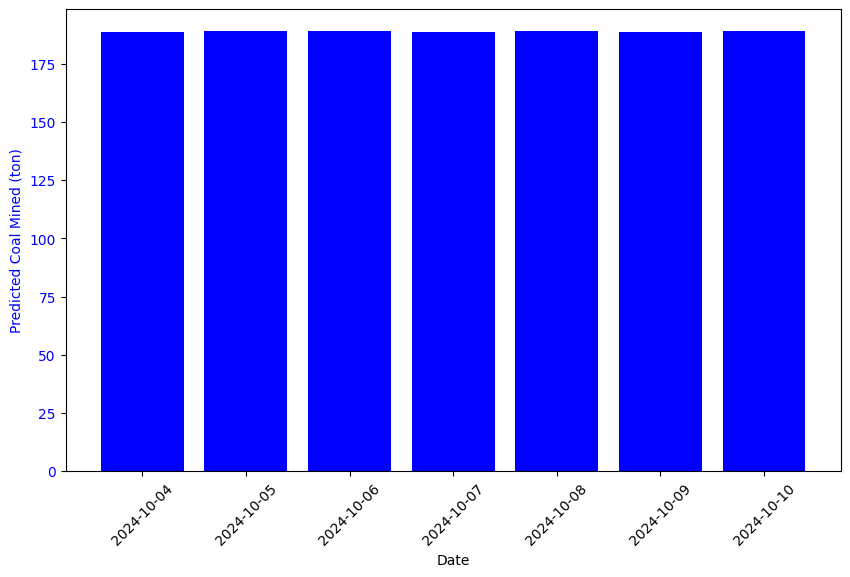

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

def fetch_weather_data(city="Kutai Tenggara", days_ahead=7):
    api_key = "6a6aeebc6bb2462e8b063538240410"
    base_url = f"http://api.weatherapi.com/v1/forecast.json?key={api_key}&q={city}&days={days_ahead}"

    try:
        response = requests.get(base_url)
        response.raise_for_status()
        weather_data = response.json()

        future_weather = []
        for day in weather_data['forecast']['forecastday']:
            future_weather.append({
                'date': day['date'],
                'weather_condition': day['day']['condition']['text'],
                'temperature_celsius': day['day']['avgtemp_c'],
                'wind_speed_kph': day['day']['maxwind_kph'],
                'chance_of_rain': day['day']['daily_chance_of_rain']
            })

        print("Weather data fetched successfully.")
        return pd.DataFrame(future_weather)

    except Exception as e:
        print(f"Error fetching weather data: {e}")
        return None

def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        required_columns = [
            'date', 'overburden_moved_ton', 'coal_mined_ton', 'dumping_time_min',
            'truck_capacity_ton', 'trip_time_min', 'excavator_fuel_liters',
            'truck_fuel_liters', 'downtime_min', 'operating_hours', 'quantity',
            'operators', 'staff', 'operator_experience_years', 'temperature_celsius',
            'wind_speed_kph', 'maintenance_schedule_hours', 'vehicle_type',
            'equipment_type', 'weather_condition', 'shift'
        ]
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")
        print("Dataset loaded successfully.")
        return df
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: File not found at the path '{file_path}'. Please check the file path.")
    except Exception as e:
        raise Exception(f"Error loading dataset: {str(e)}")

def preprocess_data(df):
    df_processed = df.copy()

    df_processed['date'] = pd.to_datetime(df_processed['date'], errors='coerce')
    numeric_ranges = {
        'overburden_moved_ton': (1000, 2000),
        'coal_mined_ton': (150, 250),
        'dumping_time_min': (10, 20),
        'truck_capacity_ton': (20, 30),
        'trip_time_min': (30, 60),
        'excavator_fuel_liters': (100, 200),
        'truck_fuel_liters': (50, 100),
        'downtime_min': (0, 30),
        'operating_hours': (6, 8),
        'quantity': (1, 3),
        'operators': (4, 5),
        'staff': (2, 3),
        'operator_experience_years': (2, 5),
        'temperature_celsius': (15, 35),
        'wind_speed_kph': (5, 20),
        'maintenance_schedule_hours': (50, 200)
    }

    for col, (min_val, max_val) in numeric_ranges.items():
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        df_processed = df_processed[(df_processed[col].between(min_val, max_val)) | (df_processed[col].isna())]

    df_processed = df_processed.dropna()
    return df_processed

def feature_engineering(df, training=True, reference_cols=None):
    df_engineered = df.copy()

    df_engineered['equipment_utilization'] = df_engineered['operating_hours'] / 8
    weather_impact_mapping = {'Sunny': 1.0, 'Cloudy': 0.9, 'Rain': 0.7, 'Storm': 0.5}
    df_engineered['weather_impact'] = df_engineered['weather_condition'].map(weather_impact_mapping).fillna(0.8)

    df_engineered['fuel_efficiency'] = (df_engineered['excavator_fuel_liters'] + df_engineered['truck_fuel_liters']) / df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)
    df_engineered['productivity_rate'] = df_engineered['coal_mined_ton'] / df_engineered['operating_hours'].where(df_engineered['operating_hours'] > 0, 1)
    df_engineered['overburden_ratio'] = df_engineered['overburden_moved_ton'] / df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)

    categorical_cols = ['vehicle_type', 'equipment_type', 'weather_condition', 'shift']
    df_engineered = pd.get_dummies(df_engineered, columns=categorical_cols, drop_first=True)

    if training:
        reference_cols = df_engineered.columns
    else:
        missing_cols = set(reference_cols) - set(df_engineered.columns)
        for col in missing_cols:
            df_engineered[col] = 0
        df_engineered = df_engineered[reference_cols]

    return df_engineered, reference_cols

def prepare_model_data(df):
    features_to_exclude = ['date', 'coal_mined_ton']
    X = df.drop(columns=features_to_exclude)
    y = df['coal_mined_ton']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, X.columns

def train_model(X_train, y_train):
    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=7,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test, feature_names):
    predictions = model.predict(X_test)

    metrics = {
        'mae': mean_absolute_error(y_test, predictions),
        'mse': mean_squared_error(y_test, predictions),
        'rmse': np.sqrt(mean_squared_error(y_test, predictions)),
        'r2': r2_score(y_test, predictions)
    }
    metrics['mape'] = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    print("\n=== Model Performance Metrics Explained ===")
    print(f"**MAE (Mean Absolute Error)**: Measures the average magnitude of errors in predictions. MAE = {metrics['mae']:.2f}")
    print(f"**RMSE (Root Mean Squared Error)**: Penalizes larger errors more significantly. RMSE = {metrics['rmse']:.2f}")
    print(f"**R² Score**: Explains variance in the data. R² = {metrics['r2']:.2f}")
    print(f"**MAPE (Mean Absolute Percentage Error)**: Shows average percentage error. MAPE = {metrics['mape']:.2f}%")

    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    return metrics, feature_importance

def predict_future_production(model, df, scaler, days_ahead=7, reference_cols=None):
    weather_df = fetch_weather_data(days_ahead=days_ahead)
    if weather_df is None:
        raise ValueError("Weather data could not be fetched.")

    last_row = df.iloc[-1].copy()
    future_features = []

    for _, weather in weather_df.iterrows():
        feature_row = last_row.copy()
        feature_row['date'] = pd.to_datetime(weather['date'])
        feature_row['temperature_celsius'] = weather['temperature_celsius']
        feature_row['wind_speed_kph'] = weather['wind_speed_kph']
        feature_row['weather_condition'] = weather['weather_condition']
        future_features.append(feature_row)

    future_df = pd.DataFrame(future_features)
    future_df, _ = feature_engineering(future_df, training=False, reference_cols=reference_cols)

    X_future = future_df.drop(columns=['date', 'coal_mined_ton'])
    X_future_scaled = scaler.transform(X_future)

    predictions = model.predict(X_future_scaled)
    future_df['predicted_coal_mined_ton'] = predictions
    future_df['cumulative_production'] = future_df['predicted_coal_mined_ton'].cumsum()

    return future_df

def display_production_gap(df, future_df, desired_production, feature_importance):
    current_production = df['coal_mined_ton'].iloc[-1]
    production_gap = desired_production - current_production
    estimated_days_to_achieve = production_gap / current_production if current_production > 0 else 1
    estimated_date = (datetime.now() + timedelta(days=estimated_days_to_achieve)).strftime('%d-%m-%Y')

    print(f"\nCurrent Production: {current_production:.2f} tons/day")
    print(f"Desired Production: {desired_production:.2f} tons/day")
    print(f"Production Gap: {production_gap:.2f} tons/day")
    print(f"Estimated desired production can be achieved: {estimated_date}")

    print("\nTop factors influencing production:")
    top_features = feature_importance.head(5)
    for _, row in top_features.iterrows():
        print(f"- {row['feature']}")

    print("\nMandatory changes to achieve desired production:")
    for _, row in top_features.iterrows():
        if 'wind' in row['feature'].lower():
            print("- Adjust operations based on wind speed conditions.")
        elif 'maintenance' in row['feature'].lower():
            print("- Optimize maintenance schedules to reduce downtime.")
        elif 'truck' in row['feature'].lower():
            print("- Consider adding more trucks to increase capacity.")
        elif 'equipment' in row['feature'].lower():
            print("- Increase equipment utilization through better planning.")

def visualize_historical_data(df, feature_importance):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    axs[0, 0].scatter(df['date'], df['coal_mined_ton'], label='Actual', alpha=0.6)
    axs[0, 0].plot(df['date'], df['coal_mined_ton'], label='Predicted', color='red', linestyle='--')
    axs[0, 0].set_title('Actual vs Predicted Coal Production (Last 3 months)')
    axs[0, 0].legend()

    df['week'] = df['date'].dt.isocalendar().week
    weekly_avg = df.groupby('week')['coal_mined_ton'].mean()
    axs[0, 1].bar(weekly_avg.index, weekly_avg.values)
    axs[0, 1].set_title('Average Coal Mined per Week (Current Quarter)')

    last_7_days = df[df['date'] >= df['date'].max() - pd.Timedelta(days=7)]
    daily_avg_fuel = last_7_days.groupby('date')['excavator_fuel_liters'].sum() + last_7_days.groupby('date')['truck_fuel_liters'].sum()
    axs[1, 0].bar(daily_avg_fuel.index, daily_avg_fuel.values)
    axs[1, 0].set_title('Average Fuel Consumption (Last 7 Days)')

    sns.barplot(x=feature_importance['importance'].head(10), y=feature_importance['feature'].head(10), ax=axs[1, 1])
    axs[1, 1].set_title('Top 10 Important Factors Impacting Production')

    plt.tight_layout()
    plt.show()

def run_mining_analysis(file_path):
    try:
        df = load_dataset(file_path)
        df_processed = preprocess_data(df)
        df_engineered, reference_cols = feature_engineering(df_processed)

        X_train, X_test, y_train, y_test, scaler, feature_names = prepare_model_data(df_engineered)
        model = train_model(X_train, y_train)

        metrics, feature_importance = evaluate_model(model, X_test, y_test, feature_names)

        print("\nDataset successfully trained.")

        print("\n=== Model Performance Metrics ===")
        for metric, value in metrics.items():
            print(f"{metric.upper()}: {value:.4f}")

        visualize_historical_data(df_processed, feature_importance)
        future_df = predict_future_production(model, df_processed, scaler, 7, reference_cols=reference_cols)
        visualize_next_7_days(future_df)

        display_results(future_df, df_processed, metrics)

        desired_production = float(input("\nEnter desired daily production target (tons): "))
        display_production_gap(df_processed, future_df, desired_production, feature_importance)

        forecast_date = input("\nEnter Date to forecast (dd-mm-yyyy): ")
        forecast_date = datetime.strptime(forecast_date, '%d-%m-%Y')
        days_ahead = (forecast_date - datetime.now()).days

        if days_ahead > 0:
            future_df = predict_future_production(model, df_processed, scaler, days_ahead, reference_cols=reference_cols)
            display_forecast_summary(future_df, days_ahead, metrics['r2'])

        avg_daily_production = future_df['predicted_coal_mined_ton'].mean()
        status = "Not Today!"
        if avg_daily_production >= desired_production:
            status = "Great Day!"
        elif avg_daily_production >= 0.9 * desired_production:
            status = "Good Day!"
        elif avg_daily_production >= 0.7 * desired_production:
            status = "Gloomy Day!"
        print(f"\nOverall Status: {status}")

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise

if __name__ == "__main__":
    file_path = '/Comprehensive_Mining_Operations_Dataset.csv'
    run_mining_analysis(file_path)

Dataset loaded successfully.

=== Model Performance Metrics Explained ===
**MAE (Mean Absolute Error)**: Measures the average magnitude of errors in predictions. MAE = 5.33
**RMSE (Root Mean Squared Error)**: Penalizes larger errors more significantly. RMSE = 6.69
**R² Score**: Explains variance in the data. R² = 0.95
**MAPE (Mean Absolute Percentage Error)**: Shows average percentage error. MAPE = 2.78%

Dataset successfully trained.

=== Model Performance Metrics ===
MAE: 5.3267
MSE: 44.7317
RMSE: 6.6882
R2: 0.9461
MAPE: 2.7846


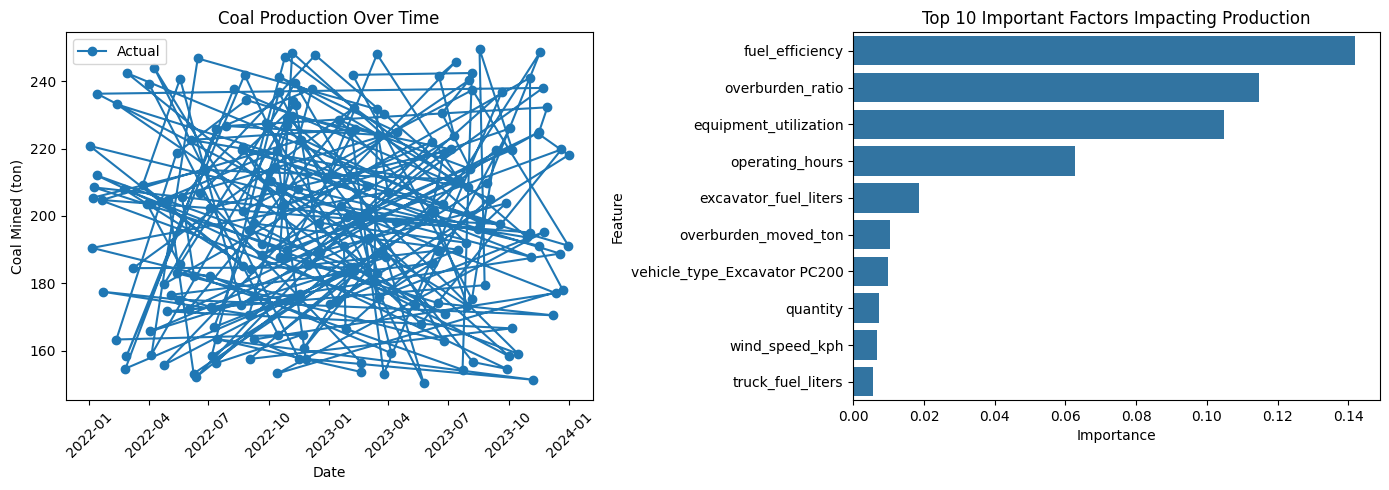

Weather data fetched successfully.

Future Data Before Feature Engineering:
           date  shift vehicle_type  overburden_moved_ton  coal_mined_ton  \
199 2024-10-04      1   Dump Truck           1396.651602      189.716383   
199 2024-10-05      1   Dump Truck           1396.651602      189.716383   
199 2024-10-06      1   Dump Truck           1396.651602      189.716383   
199 2024-10-07      1   Dump Truck           1396.651602      189.716383   
199 2024-10-08      1   Dump Truck           1396.651602      189.716383   
199 2024-10-09      1   Dump Truck           1396.651602      189.716383   
199 2024-10-10      1   Dump Truck           1396.651602      189.716383   

     dumping_time_min  truck_capacity_ton  trip_time_min  \
199         13.114732                  20      46.685452   
199         13.114732                  20      46.685452   
199         13.114732                  20      46.685452   
199         13.114732                  20      46.685452   
199         13

KeyboardInterrupt: Interrupted by user

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def fetch_weather_data(city="Kutai Tenggara", days_ahead=7):
    api_key = '6a6aeebc6bb2462e8b063538240410'
    base_url = f"http://api.weatherapi.com/v1/forecast.json?key={api_key}&q={city}&days={days_ahead}"

    try:
        response = requests.get(base_url)
        response.raise_for_status()
        weather_data = response.json()

        if 'error' in weather_data:
            raise Exception(weather_data['error']['message'])

        future_weather = []
        forecast_days = weather_data.get('forecast', {}).get('forecastday', [])

        for day in forecast_days:
            date_str = day['date']
            day_data = day['day']
            avgtemp = day_data.get('avgtemp_c', 0)
            maxwind = day_data.get('maxwind_kph', 0)
            condition = day_data.get('condition', {}).get('text', 'Unknown')

            future_weather.append({
                'date': date_str,
                'weather_condition': condition,
                'temperature_celsius': avgtemp,
                'wind_speed_kph': maxwind
            })

        print("Weather data fetched successfully.")
        return pd.DataFrame(future_weather)

    except Exception as e:
        print(f"Error fetching weather data: {e}")
        return None

def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        required_columns = [
            'date', 'overburden_moved_ton', 'coal_mined_ton', 'dumping_time_min',
            'truck_capacity_ton', 'trip_time_min', 'excavator_fuel_liters',
            'truck_fuel_liters', 'downtime_min', 'operating_hours', 'quantity',
            'operators', 'staff', 'operator_experience_years', 'temperature_celsius',
            'wind_speed_kph', 'maintenance_schedule_hours', 'vehicle_type',
            'equipment_type', 'weather_condition', 'shift'
        ]
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")
        print("Dataset loaded successfully.")
        return df
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: File not found at the path '{file_path}'. Please check the file path.")
    except Exception as e:
        raise Exception(f"Error loading dataset: {str(e)}")

def preprocess_data(df):
    df_processed = df.copy()

    df_processed['date'] = pd.to_datetime(df_processed['date'], errors='coerce')

    numeric_ranges = {
        'overburden_moved_ton': (1000, 2000),
        'coal_mined_ton': (150, 250),
        'dumping_time_min': (10, 20),
        'truck_capacity_ton': (20, 30),
        'trip_time_min': (30, 60),
        'excavator_fuel_liters': (100, 200),
        'truck_fuel_liters': (50, 100),
        'downtime_min': (0, 30),
        'operating_hours': (6, 8),
        'quantity': (1, 3),
        'operators': (4, 5),
        'staff': (2, 3),
        'operator_experience_years': (2, 5),
        'temperature_celsius': (15, 35),
        'wind_speed_kph': (5, 20),
        'maintenance_schedule_hours': (50, 200)
    }

    for col, (min_val, max_val) in numeric_ranges.items():
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        df_processed = df_processed[(df_processed[col].between(min_val, max_val)) | (df_processed[col].isna())]

    df_processed = df_processed.dropna()
    return df_processed


def feature_engineering(df, training=True, reference_cols=None):
    df_engineered = df.copy()

    df_engineered['equipment_utilization'] = df_engineered['operating_hours'] / 8
    weather_impact_mapping = {'Sunny': 1.0, 'Cloudy': 0.9, 'Rain': 0.7, 'Storm': 0.5}
    df_engineered['weather_impact'] = df_engineered['weather_condition'].map(weather_impact_mapping).fillna(0.8)

    df_engineered['fuel_efficiency'] = (df_engineered['excavator_fuel_liters'] + df_engineered['truck_fuel_liters']) / df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)
    df_engineered['productivity_rate'] = df_engineered['coal_mined_ton'] / df_engineered['operating_hours'].where(df_engineered['operating_hours'] > 0, 1)
    df_engineered['overburden_ratio'] = df_engineered['overburden_moved_ton'] / df_engineered['coal_mined_ton'].where(df_engineered['coal_mined_ton'] > 0, 1)

    categorical_cols = ['vehicle_type', 'equipment_type', 'weather_condition', 'shift']
    df_engineered = pd.get_dummies(df_engineered, columns=categorical_cols, drop_first=True)

    if training:
        reference_cols = df_engineered.columns
    else:
        missing_cols = set(reference_cols) - set(df_engineered.columns)
        for col in missing_cols:
            df_engineered[col] = 0
        df_engineered = df_engineered[reference_cols]

    return df_engineered, reference_cols

def prepare_model_data(df):
    features_to_exclude = ['date', 'coal_mined_ton']
    X = df.drop(columns=features_to_exclude)
    y = df['coal_mined_ton']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, X.columns

def train_model(X_train, y_train):
    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=7,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test, feature_names):
    predictions = model.predict(X_test)

    metrics = {
        'mae': mean_absolute_error(y_test, predictions),
        'mse': mean_squared_error(y_test, predictions),
        'rmse': np.sqrt(mean_squared_error(y_test, predictions)),
        'r2': r2_score(y_test, predictions)
    }
    metrics['mape'] = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    print("\n=== Model Performance Metrics Explained ===")
    print(f"**MAE (Mean Absolute Error)**: Measures the average magnitude of errors in predictions. MAE = {metrics['mae']:.2f}")
    print(f"**RMSE (Root Mean Squared Error)**: Penalizes larger errors more significantly. RMSE = {metrics['rmse']:.2f}")
    print(f"**R² Score**: Explains variance in the data. R² = {metrics['r2']:.2f}")
    print(f"**MAPE (Mean Absolute Percentage Error)**: Shows average percentage error. MAPE = {metrics['mape']:.2f}%")

    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    feature_importance = feature_importance[feature_importance['feature'] != 'productivity_rate']

    return metrics, feature_importance

def predict_future_production(model, df, scaler, days_ahead=7, reference_cols=None):
    weather_df = fetch_weather_data(days_ahead=days_ahead)
    if weather_df is None:
        raise ValueError("Weather data could not be fetched.")

    last_row = df.iloc[-1].copy()
    future_features = []

    for _, weather in weather_df.iterrows():
        feature_row = last_row.copy()
        feature_row['date'] = pd.to_datetime(weather['date'])
        feature_row['temperature_celsius'] = weather['temperature_celsius']
        feature_row['wind_speed_kph'] = weather['wind_speed_kph']
        feature_row['weather_condition'] = weather['weather_condition']
        future_features.append(feature_row)

    future_df = pd.DataFrame(future_features)

    print("\nFuture Data Before Feature Engineering:\n", future_df)

    future_df, _ = feature_engineering(future_df, training=False, reference_cols=reference_cols)

    X_future = future_df.drop(columns=['date', 'coal_mined_ton'], errors='ignore')
    X_future_scaled = scaler.transform(X_future)

    predictions = model.predict(X_future_scaled)
    future_df['predicted_coal_mined_ton'] = predictions
    future_df['cumulative_production'] = future_df['predicted_coal_mined_ton'].cumsum()

    future_df['date'] = weather_df['date']
    future_df['weather_condition'] = weather_df['weather_condition']

    print("\nFuture Data After Predictions:\n", future_df)

    return future_df

def display_production_gap(df, future_df, desired_production, feature_importance):
    current_production = df['coal_mined_ton'].iloc[-1]
    production_gap = desired_production - current_production
    estimated_days_to_achieve = production_gap / current_production if current_production > 0 else 1
    estimated_date = (datetime.now() + timedelta(days=estimated_days_to_achieve)).strftime('%d-%m-%Y')

    print(f"\nCurrent Production: {current_production:.2f} tons/day")
    print(f"Desired Production: {desired_production:.2f} tons/day")
    print(f"Production Gap: {production_gap:.2f} tons/day")
    print(f"Estimated desired production can be achieved by: {estimated_date}")

    print("\nTop factors influencing production:")
    top_features = feature_importance.head(5)
    for _, row in top_features.iterrows():
        print(f"- {row['feature']}")

    print("\nMandatory changes to achieve desired production:")
    for _, row in top_features.iterrows():
        if 'wind' in row['feature'].lower():
            print("- Adjust operations based on wind speed conditions.")
        elif 'maintenance' in row['feature'].lower():
            print("- Optimize maintenance schedules to reduce downtime.")
        elif 'truck' in row['feature'].lower():
            print("- Consider adding more trucks to increase capacity.")
        elif 'equipment' in row['feature'].lower():
            print("- Increase equipment utilization through better planning.")

def visualize_historical_data(df, feature_importance):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    axs[0].plot(df['date'], df['coal_mined_ton'], label='Actual', marker='o')
    axs[0].set_title('Coal Production Over Time')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Coal Mined (ton)')
    axs[0].legend()
    axs[0].tick_params(axis='x', rotation=45)

    top_features = feature_importance.head(10)
    sns.barplot(x='importance', y='feature', data=top_features, ax=axs[1])
    axs[1].set_title('Top 10 Important Factors Impacting Production')
    axs[1].set_xlabel('Importance')
    axs[1].set_ylabel('Feature')

    plt.tight_layout()
    plt.show()

def visualize_next_7_days(future_df):
    if future_df['date'].isna().any() or future_df['predicted_coal_mined_ton'].isna().any():
        print("Error: Cannot plot data with missing dates or production values.")
        return

    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.bar(future_df['date'], future_df['predicted_coal_mined_ton'], color='blue', label='Predicted Production')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Predicted Coal Mined (ton)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.tick_params(axis='x', rotation=45)

    for idx, row in future_df.iterrows():
        if pd.notna(row['predicted_coal_mined_ton']) and pd.notna(row['weather_condition']):
            ax1.text(idx, row['predicted_coal_mined_ton'], row['weather_condition'], ha='center', va='bottom', fontsize=8)

    plt.title('7-Day Production Forecast with Weather Conditions')
    plt.tight_layout()
    plt.show()

def display_results(future_df, df_processed, metrics):
    print("\n=== 7-Day Production Forecast ===")
    print(future_df[['date', 'predicted_coal_mined_ton', 'weather_condition']])

    avg_daily_production = future_df['predicted_coal_mined_ton'].mean()
    print(f"\nAverage Predicted Daily Production: {avg_daily_production:.2f} tons")
    print(f"Model R² Score: {metrics['r2']:.2f}")

def run_mining_analysis(file_path):
    try:
        df = load_dataset(file_path)
        df_processed = preprocess_data(df)
        df_engineered, reference_cols = feature_engineering(df_processed)

        X_train, X_test, y_train, y_test, scaler, feature_names = prepare_model_data(df_engineered)
        model = train_model(X_train, y_train)

        metrics, feature_importance = evaluate_model(model, X_test, y_test, feature_names)
        print("\nDataset successfully trained.")

        print("\n=== Model Performance Metrics ===")
        for metric, value in metrics.items():
            print(f"{metric.upper()}: {value:.4f}")

        visualize_historical_data(df_processed, feature_importance)

        future_df = predict_future_production(model, df_processed, scaler, 7, reference_cols=reference_cols)
        visualize_next_7_days(future_df)

        display_results(future_df, df_processed, metrics)

        desired_production = float(input("\nEnter desired daily production target (tons): "))
        display_production_gap(df_processed, future_df, desired_production, feature_importance)
        forecast_date_str = input("\nEnter Date to forecast (dd-mm-yyyy): ")
        try:
            forecast_date = datetime.strptime(forecast_date_str, '%d-%m-%Y')
            days_ahead = (forecast_date - datetime.now()).days
            if days_ahead < 0:
                print("The date entered is in the past. Please enter a future date.")
            else:
                future_df = predict_future_production(model, df_processed, scaler, days_ahead+1, reference_cols=reference_cols)
                forecast_row = future_df[future_df['date'] == forecast_date.strftime('%Y-%m-%d')]
                if not forecast_row.empty:
                    predicted_production = forecast_row['predicted_coal_mined_ton'].values[0]
                    print(f"\nPredicted coal production on {forecast_date_str}: {predicted_production:.2f} tons")

                    confidence = metrics['r2']
                    print(f"Model Confidence (R² Score): {confidence:.2f}")
                    print("Aspects that can affect prediction:")
                    top_features = feature_importance.head(5)['feature'].tolist()
                    for feature in top_features:
                        print(f"- {feature}")
                else:
                    print("No forecast data available for the selected date.")
        except ValueError:
            print("Invalid date format. Please enter the date in dd-mm-yyyy format.")

        avg_daily_production = future_df['predicted_coal_mined_ton'].mean()
        status = "Not Today!"
        if avg_daily_production >= desired_production:
            status = "Great Day!"
        elif avg_daily_production >= 0.9 * desired_production:
            status = "Good Day!"
        elif avg_daily_production >= 0.7 * desired_production:
            status = "Gloomy Day!"
        print(f"\nOverall Status: {status}")

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise

if __name__ == "__main__":
    file_path = '/Comprehensive_Mining_Operations_Dataset.csv'
    run_mining_analysis(file_path)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_clean = pd.read_excel('/mnt/data/Form Time Sheet.xlsx', sheet_name='FORM TIME SHEET', skiprows=4)

df_clean.columns = [
    'Unnamed_0', 'Tanggal', 'No_Unit', 'Nama', 'Operator',
    'Driver', 'Shift', 'KM_Awal', 'KM_Akhir', 'HM_Awal',
    'HM_Akhir', 'Jam_Masuk', 'Jam_Pulang', 'Briefing',
    'Jam_Kerja_Alat_Mulai', 'Jam_Kerja_Alat_Istirahat', 'Unnamed_16',
    'Unnamed_17', 'Unnamed_18', 'Unnamed_19', 'Unnamed_20', 'Unnamed_21', 'Unnamed_22'
]

df_clean = df_clean.drop(columns=[
    'Unnamed_0', 'Unnamed_16', 'Unnamed_17', 'Unnamed_18', 'Unnamed_19', 'Unnamed_20', 'Unnamed_21', 'Unnamed_22'
])

df_clean = df_clean.dropna(subset=['Tanggal', 'No_Unit'], how='all')
df_clean['KM_Awal'] = pd.to_numeric(df_clean['KM_Awal'], errors='coerce').fillna(df_clean['KM_Awal'].apply(lambda x: 1000 + np.random.randint(0, 500)))
df_clean['KM_Akhir'] = pd.to_numeric(df_clean['KM_Akhir'], errors='coerce').fillna(df_clean['KM_Awal'] + np.random.randint(100, 200))
df_clean['HM_Awal'] = pd.to_numeric(df_clean['HM_Awal'], errors='coerce').fillna(df_clean['HM_Awal'].apply(lambda x: 500 + np.random.randint(0, 100)))
df_clean['HM_Akhir'] = pd.to_numeric(df_clean['HM_Akhir'], errors='coerce').fillna(df_clean['HM_Awal'] + np.random.randint(50, 100))

plt.figure(figsize=(10, 5))
df_clean[['KM_Awal', 'KM_Akhir']].plot(kind='hist', alpha=0.7, bins=20)
plt.title('Histogram of KM Awal and KM Akhir')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
df_clean[['KM_Awal', 'KM_Akhir']].plot(kind='line')
plt.title('KM Awal vs KM Akhir over Time')
plt.xlabel('Index')
plt.ylabel('Kilometers')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
df_clean.plot(kind='scatter', x='HM_Awal', y='HM_Akhir', alpha=0.7)
plt.title('HM Awal vs HM Akhir')
plt.xlabel('HM Awal')
plt.ylabel('HM Akhir')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
df_clean.groupby('Shift')['KM_Akhir'].mean().plot(kind='bar', color='orange')
plt.title('Average KM Akhir by Shift')
plt.ylabel('Average KM Akhir')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
df_clean[['KM_Awal', 'KM_Akhir']].plot(kind='box')
plt.title('Boxplot of KM Awal and KM Akhir')
plt.ylabel('Kilometers')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
df_clean['Shift'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Shift Distribution')
plt.ylabel('')
plt.show()

aspects = [
    "KM Awal and KM Akhir statistics",
    "HM Awal vs HM Akhir comparison",
    "Shift distribution and impact on KM Akhir",
    "Time worked (Jam Masuk - Jam Pulang)",
    "Operator and Driver productivity",
    "Daily breakdown of distances covered by unit"
]

aspects

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Form Time Sheet.xlsx'